In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
import sys

from matplotlib.colors import Normalize, LightSource
from mpl_toolkits.mplot3d import Axes3D
from skimage.measure import marching_cubes
from mpl_toolkits.mplot3d.art3d import Poly3DCollection



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from tools.misc_tools import get_metric_from_params, get_h5_data
# %run -i 'merge_runs.py'

# from mpi4py import MPI

# Transition Scenario

In [7]:

def get_metric_at_Lz_Nz_W(Lz, Nz, W, metric_plot, Lz_plot, suffix_end='localised'):
    material_params = {'W': W, 'beta': 0.9, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
    solver_params = {'Nx': 64, 'Ny': 64, 'Nz': Nz}
    system_params = {'Lx': 3*np.pi, 'ndim': 3, 'n': 1, 'Lz': Lz}

    t_all, metric_all = get_metric_from_params(material_params, system_params, solver_params, suffix=f'recent-{suffix_end}', subdir='arrowhead_3D', metric='trace', deviation=True, merge=True)
    metric_plot.append(metric_all[-1])
    Lz_plot.append(Lz)
    return metric_plot, Lz_plot

########################################
##############  W = 14    ##############
########################################

###########################
########## 2D AH ##########
###########################

metric_plot = []
Lz_plot = []

metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(0.05*np.pi, 32, 14, metric_plot, Lz_plot, suffix_end='m=1')

Lz_instab = 0.14*3.1415
plt.hlines(metric_plot[0], 0, Lz_instab, color='tab:green', linewidth=5)
plt.hlines(metric_plot[0], Lz_instab, 100, color='tab:green', linestyles='--', linewidth=5)

############################
###### Localised down ######
############################

metric_plot = []
Lz_plot = []

Lz_list = np.array([0.5, 0.54, 0.56, 0.6, 0.64, 0.68, 0.72, 0.76, 0.8, 0.85, 0.9, 0.95, 1]) * np.pi

for Lz in Lz_list:
    print(Lz)
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 32, 14, metric_plot, Lz_plot)

plt.plot(Lz_plot, metric_plot, color='tab:green', linewidth=5)
# plt.scatter(Lz_plot, metric_plot, color='tab:green', s=6, marker='x')

plt.scatter(Lz_plot[-1], metric_plot[-1], s=120, marker='o', color='tab:green')

# plt.scatter(Lz_plot[0], metric_plot[0], s=400, marker='x', linewidths=5, color='tab:green')

############################
######## m=1 branch ########
############################

metric_plot = []
Lz_plot = []

Lz_list = np.array([0.145, 0.15, 0.155, 0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.3,0.32,0.34,0.36,0.38,0.4,0.45, 0.5, 0.6, 0.7,0.8, 0.9, 1]) * np.pi

for Lz in Lz_list:
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 32, 14, metric_plot, Lz_plot, suffix_end='m=1')

plt.plot(Lz_plot, metric_plot, color='tab:green', linewidth=5)
# plt.scatter(Lz_plot, metric_plot, color='tab:green', s=6, marker='x')
plt.scatter(Lz_plot[-1], metric_plot[-1], s=120, marker='o', color='tab:green')

plt.plot(2* np.array(Lz_plot)[:10], metric_plot[:10], color='tab:green', linestyle=(1, (3.7, 1.6)), linewidth=5)
plt.scatter(2*Lz_plot[-1], metric_plot[-1], s=120, marker='o', color='tab:green')
# plt.scatter(2*np.array(Lz_plot), metric_plot, color='tab:green', s=6, marker='x')

plt.scatter(Lz_plot[0], metric_plot[0], s=700, marker='x', linewidths=5, color='tab:green')
# plt.scatter(2*Lz_plot[0], metric_plot[0], s=400, marker='x', linewidths=5, color='tab:green')

###### Scatter points
metric_plot = []
Lz_plot = []

Lz_list = np.array([0.1,0.18,0.28]) * np.pi

for Lz in Lz_list:
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 32, 14, metric_plot, Lz_plot, suffix_end='m=1')

Lz_plot = list(np.array(Lz_plot) * 2)

# plt.scatter(Lz_plot[::2],metric_plot[::2], s=400, marker='o', color='tab:red', zorder=2)
# plt.scatter(Lz_plot[1::2], metric_plot[1::2], s=400, marker='o', color='black', zorder=2)

# plt.text(0.03*np.pi, 0.775, r'$BP_1$', fontsize=40)

plt.text(0.1*np.pi, 0.69, r'$m=1$', fontsize=40)
plt.text(0.5*np.pi, 0.69, r'$m=2$', fontsize=40)

#######
ax = plt.gca()
ax.set_facecolor((44/256, 160/256, 44/256, 0.2))

plt.xticks([0, 0.2*np.pi, 0.4*np.pi, 0.6*np.pi, 0.8*np.pi, np.pi], [0, r'$0.2\pi$', r'$0.4\pi$', r'$0.6\pi$', r'$0.8\pi$', r'$\pi$'], fontsize=30)
plt.yticks([0.68, 0.72,0.76,0.8],[0.68, 0.72,0.76,0.8], fontsize=30)
plt.xlabel(r'$L_z$', fontsize=40)
plt.ylabel(r'$(\bar\Sigma-\bar\Sigma_0)/\bar\Sigma_0$', fontsize=40)

plt.xlim(np.array([0, 0.85])*np.pi)
plt.ylim(np.array([0.675, 0.8]))



2025-09-14 16:41:03,286 post 0/1 INFO :: Merging files from /home/tal43/../../nfs/st01/hpc-fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_14_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_0,15708_ndim_3_N_64-64-32_recent-m=1/


IndexError: index -1 is out of bounds for axis 0 with size 0

In [5]:
from tools.misc_tools import get_metric_from_params

def get_metric_at_Lz_Nz_W(Lz, Nz, W, metric_plot, Lz_plot, suffix_end='localised'):
    material_params = {'W': W, 'beta': 0.9, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
    solver_params = {'Nx': 64, 'Ny': 64, 'Nz': Nz}
    system_params = {'Lx': 3*np.pi, 'ndim': 3, 'n': 1, 'Lz': Lz}

    t_all, metric_all = get_metric_from_params(material_params, system_params, solver_params, suffix=f'recent-{suffix_end}', subdir='arrowhead_3D', metric='trace', deviation=True, merge=True)
    metric_plot.append(metric_all[-1])
    Lz_plot.append(Lz)
    return metric_plot, Lz_plot

########################################
##############  W = 14    ##############
########################################

############################
###### Localised down ######
############################

metric_plot = []
Lz_plot = []

Lz_list = np.array([1.8, 2]) * np.pi

for Lz in Lz_list:
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 32, 14, metric_plot, Lz_plot)

Lz_list = np.array([2.2, 2.22, 2.25, 2.27, 2.3, 2.4, 2.5, 2.6,2.7,2.8,2.9]) * np.pi

for Lz in Lz_list:
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 48, 14, metric_plot, Lz_plot)

plt.plot(Lz_plot, metric_plot, color='tab:green', linewidth=4)
# plt.scatter(Lz_plot, metric_plot, color='tab:green', s=6, marker='x')


plt.scatter(Lz_plot[2], metric_plot[2], s=600, marker='x', linewidths=7, color='tab:green')
plt.scatter(Lz_plot[-1], metric_plot[-1], s=600, marker='o', linewidth=3, facecolors='none', edgecolors='tab:green')

###### Scatter points
metric_plot = []
Lz_plot = []

Lz_list = np.array([2, 2.4, 2.8]) * np.pi

for Lz in Lz_list:
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 48, 14, metric_plot, Lz_plot)

plt.scatter(Lz_plot[0],metric_plot[0], s=400, marker='o', color='tab:green', zorder=2)
plt.scatter(Lz_plot[1], metric_plot[1], s=400, marker='o', color='tab:green', zorder=2)
plt.scatter(Lz_plot[2],metric_plot[2], s=400, marker='o', color='black', zorder=2)


############################
######## m=1 branch ########
############################

metric_plot = []
Lz_plot = []

Lz_list = np.array([1.1, 1.2, 1.3, 1.32, 1.33,1.35, 1.37, 1.4, 1.42, 1.44, 1.45]) * np.pi

for Lz in Lz_list:
    print(Lz)
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 32, 14, metric_plot, Lz_plot, suffix_end='m=1')

plt.plot(2* np.array(Lz_plot), metric_plot, color='tab:green', linestyle='--', linewidth=5)

plt.scatter(2*Lz_plot[-1], metric_plot[-1], s=600, marker='o', linewidth=3, facecolors='none', edgecolors='tab:green')
# plt.scatter(2*Lz_plot[-1], metric_plot[-1], s=60, marker='o', color='tab:green')
# plt.scatter(2*np.array(Lz_plot), metric_plot, color='tab:green', s=6, marker='x')

# plt.text(2*np.pi, 0.20, r'$BP_2$', fontsize=40)

ax = plt.gca()
ax.set_facecolor((44/256, 160/256, 44/256, 0.2))

plt.xticks([1.8*np.pi, 2.2*np.pi, 2.6*np.pi, 3*np.pi, ], [r'$1.8\pi$', r'$2.2\pi$', r'$2.6\pi$', r'$3\pi$'], fontsize=30)
plt.yticks([0.1,0.15,0.2,0.25],[0.1,0.15,0.2,0.25], fontsize=30)
plt.xlabel(r'$L_z$', fontsize=40)
plt.ylabel(r'$(\bar\Sigma-\bar\Sigma_0)/\bar\Sigma_0$', fontsize=40)

plt.xlim(np.array([1.8, 3])*np.pi)
plt.ylim(np.array([0.08, 0.285]))



2025-09-14 16:40:36,474 post 0/1 INFO :: Merging files from /home/tal43/../../nfs/st01/hpc-fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_14_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_5,6549_ndim_3_N_64-64-32_recent-localised/


IndexError: index -1 is out of bounds for axis 0 with size 0

2025-05-23 12:29:53,428 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_14_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_0,15708_ndim_3_N_64-64-32_recent-m=1/
2025-05-23 12:29:53,463 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_14_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_1,5708_ndim_3_N_64-64-32_recent-localised/
2025-05-23 12:29:53,482 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_14_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_1,6965_ndim_3_N_64-64-32_recent-localised/
2025-05-23 12:29:53,499 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_14_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_1,7593_ndim_

Text(11.623892818282235, 20, 'Localised')

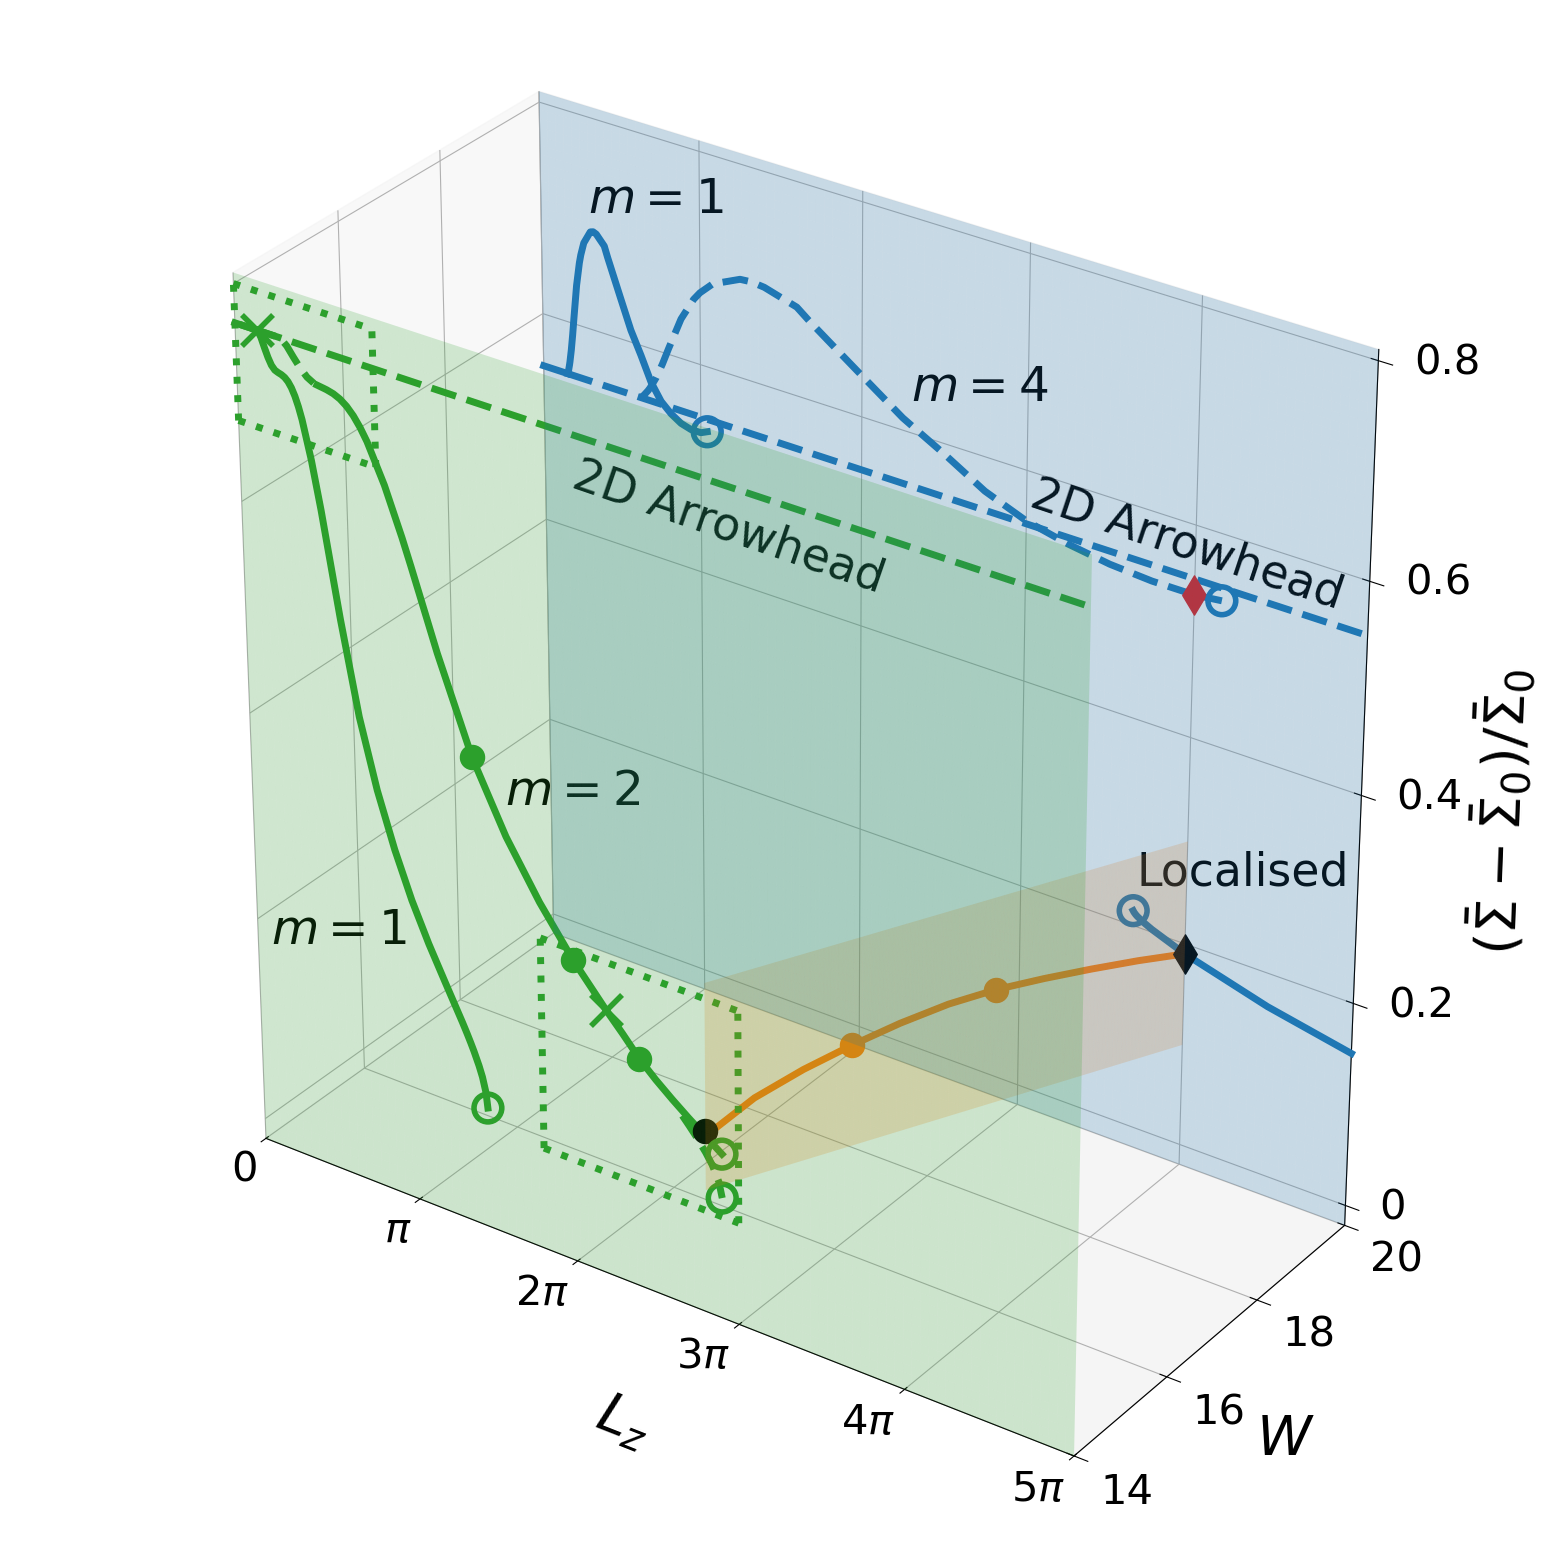

In [ ]:
from tools.misc_tools import get_metric_from_params

def get_metric_at_Lz_Nz_W(Lz, Nz, W, metric_plot, Lz_plot, suffix_end='localised', type='trace'):
    material_params = {'W': W, 'beta': 0.9, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
    solver_params = {'Nx': 64, 'Ny': 64, 'Nz': Nz}
    system_params = {'Lx': 3*np.pi, 'ndim': 3, 'n': 1, 'Lz': Lz}

    t_all, metric_all = get_metric_from_params(material_params, system_params, solver_params, suffix=f'recent-{suffix_end}', subdir='arrowhead_3D', metric=type, deviation=True, merge=True)
    metric_plot.append(metric_all[-1])
    Lz_plot.append(Lz)
    return metric_plot, Lz_plot

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(r"$L_z$", labelpad=50, fontsize=40)
ax.set_ylabel(r"$W$", labelpad=30, fontsize=40)
ax.set_zlabel(r'$(\bar\Sigma-\bar\Sigma_0)/\bar\Sigma_0$',labelpad=50, fontsize=40)


ax.view_init(elev=30, azim=-55, roll=0)

ax.set_box_aspect((2, 1, 2), zoom=0.95)
ax.set_xlim(0, 5*np.pi)  
ax.set_ylim(14, 20)  
ax.set_zlim(-0.02, 0.81)  

ax.set_xticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi, 5*np.pi], ['0', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$', r'$5\pi$'], fontsize=20, va='center', ha='right')
ax.set_yticks([14,16,18,20],[14,16,18,20], fontsize=20, va='center', ha='left')
ax.set_zticks([0,0.2,0.4,0.6,0.8], [0,0.2,0.4,0.6,0.8], fontsize=20, va='center', ha='left')
ax.tick_params(axis='x', pad=10)
ax.tick_params(axis='y', pad=10)
ax.tick_params(axis='z', pad=10)

plt.tick_params(axis='both', which='major', labelsize=30)
# ax.set_yticklabels(labels, rotation=-15, va='center', ha='left')



#################
## Draw planes ##
#################

W = np.linspace(14, 20, 100)
Lz = np.linspace(0, 5*np.pi, 100)
amp = np.linspace(-0.02, 0.81, 100)

xgrid, ygrid = np.meshgrid(Lz, amp, sparse=False, indexing='ij')

ax.plot_surface(xgrid, np.ones_like(xgrid) * 14, ygrid, rstride=1, cstride=1,
                            color='tab:green', shade=False, zorder=0.25, alpha=0.2)

ax.plot_surface(xgrid, np.ones_like(xgrid) * 20, ygrid, rstride=1, cstride=1,
                            color='tab:blue', shade=False, zorder=0.25, alpha=0.2)

i = np.linspace(0,1,100)
W = 14 + 6 * i
Lz = (2.8 + 1.2 * i) * np.pi
amp = np.linspace(0.1, 0.3, 100)

xgrid, ygrid = np.meshgrid(i, amp, sparse=False, indexing='ij')
Wgrid = 14 + 6 * xgrid
Lzgrid = (2.8 + 1.2 * xgrid) * np.pi
ax.plot_surface(Lzgrid, Wgrid, ygrid, rstride=1, cstride=1,
                            color='tab:orange', shade=False, zorder=0.25, alpha=0.2)


########################################
##############  W = 14    ##############
########################################

###########################
########## 2D AH ##########
###########################

metric_plot = []
Lz_plot = []

metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(0.05*np.pi, 32, 14, metric_plot, Lz_plot, suffix_end='m=1')

Lz_instab = 0.43

Lz_cont1 = np.linspace(0, Lz_instab, 100) 
Lz_cont2 = np.linspace(Lz_instab, 5*np.pi, 100)
ax.plot(Lz_cont1, np.ones_like(Lz_cont1) * metric_plot[0], zs=14, zdir='y', color='tab:green', linestyle='-', zorder=0.01, linewidth=5)
ax.plot(Lz_cont2, np.ones_like(Lz_cont2) * metric_plot[0], zs=14, zdir='y', color='tab:green', linestyle='--', zorder=0.01, linewidth=5)

############################
###### Localised down ######
############################

metric_plot = []
Lz_plot = []

Lz_list = np.array([0.5, 0.54, 0.56, 0.6,0.64, 0.68, 0.72, 0.76, 0.8, 0.9, 1,1.05, 1.1, 1.2, 1.4, 1.6, 1.8, 2]) * np.pi

for Lz in Lz_list:
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 32, 14, metric_plot, Lz_plot)

Lz_list = np.array([2.2, 2.3, 2.4, 2.5, 2.6,2.7,2.8,2.9]) * np.pi

for Lz in Lz_list:
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 48, 14, metric_plot, Lz_plot)

ax.plot(Lz_plot, metric_plot, zs=14, zdir='y', color='tab:green', linestyle='-', zorder=0.01, linewidth=5)

# ax.scatter(Lz_plot,  14*np.ones_like(metric_plot), metric_plot, color='tab:green', s=80, marker='x')
ax.scatter(Lz_plot[-1],  14, metric_plot[-1], s=400, marker='o', linewidth=4, facecolors='none', edgecolors='tab:green')

###############################
### Markers on Drawn States ###
###############################

# plot_state_Lz_Nz_W(base_flow_14, Lz=0.1*np.pi, Nz=32, W=14, suffix_end='m=1', tile=True, color='tab:red')
# plot_state_Lz_Nz_W(base_flow_14, Lz=0.16*np.pi, Nz=32, W=14, suffix_end='m=1', tile=True, color='black')
# plot_state_Lz_Nz_W(base_flow_14, Lz=0.26*np.pi, Nz=32, W=14, suffix_end='m=1', tile=True,color='tab:red')


metric_plot = []
Lz_plot = []

    # metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 32, 14, metric_plot, Lz_plot, suffix_end='m=1')


# Lz_list = np.array([0.1,0.18,0.28]) * np.pi

# for Lz in Lz_list:
#     metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 32, 14, metric_plot, Lz_plot, suffix_end='m=1')

Lz_plot = list(np.array(Lz_plot) * 2)

Lz_list = np.array([1.4, 2]) * np.pi

for Lz in Lz_list:
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 32, 14, metric_plot, Lz_plot)

Lz_list = np.array([2.4, 2.8]) * np.pi

for Lz in Lz_list:
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 48, 14, metric_plot, Lz_plot)

Lz_plot = np.array(Lz_plot)
metric_plot = np.array(metric_plot)
ax.scatter(Lz_plot[:-1],  14, metric_plot[:-1], s=300, marker='o', color='tab:green', zorder=2, depthshade=False)
ax.scatter(Lz_plot[-1:]-0.01,  14, metric_plot[-1:]+0.005, s=300, marker='o', color='black', zorder=50, depthshade=False)

############################
######## m=1 branch ########
############################

metric_plot = []
Lz_plot = []

Lz_list = np.array([0.05, 0.1,0.12,0.14, 0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.3,0.32,0.34,0.36,0.38,0.4,0.45, 0.5, 0.6, 0.7,0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.32, 1.33,1.35, 1.37, 1.4, 1.42, 1.44, 1.45]) * np.pi

for Lz in Lz_list:
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 32, 14, metric_plot, Lz_plot, suffix_end='m=1')

ax.plot(Lz_plot, metric_plot, zs=14, zdir='y', color='tab:green', linestyle='-', zorder=0.01, linewidth=5)
# ax.scatter(Lz_plot,  14*np.ones_like(metric_plot), metric_plot, color='tab:green', s=80, marker='x')
ax.scatter(Lz_plot[-1],  14, metric_plot[-1], s=400, marker='o', linewidth=4, facecolors='none', edgecolors='tab:green')

# crosses
ax.scatter(Lz_plot[3],  14, metric_plot[3], s=500, marker='x', linewidth=4, color='tab:green')
ax.scatter(Lz_plot[24]*2,  14, metric_plot[24], s=500, marker='x', linewidth=4, color='tab:green')

Lz_plot = np.array(Lz_plot)
ax.plot(Lz_plot[:9]*2, metric_plot[:9], zs=14, zdir='y', color='tab:green', linestyle='--', zorder=0.01, linewidth=5)
ax.plot(Lz_plot[-7:]*2, metric_plot[-7:], zs=14, zdir='y', color='tab:green', linestyle='--', zorder=0.01, linewidth=5)
# ax.scatter(Lz_plot*2,  14*np.ones_like(metric_plot), metric_plot, color='tab:green', s=80, marker='x')
ax.scatter(Lz_plot[-1]*2,  14, metric_plot[-1], s=400, marker='o', linewidth=4, facecolors='none', edgecolors='tab:green')



########################################
##############  W = 20    ##############
########################################


###########################
########## 2D AH ##########
###########################

metric_plot = []
Lz_plot = []

metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(0.125*np.pi, 16, 20, metric_plot, Lz_plot, suffix_end='periodic')


Lz_instab = 0.155*np.pi

Lz_cont1 = np.linspace(0, Lz_instab, 100) 
Lz_cont2 = np.linspace(Lz_instab, 5*np.pi, 100)
ax.plot(Lz_cont1, np.ones_like(Lz_cont1) * metric_plot[0], zs=20, zdir='y', color='tab:blue', linestyle='-', zorder=0.01, linewidth=5)
ax.plot(Lz_cont2, np.ones_like(Lz_cont2) * metric_plot[0], zs=20, zdir='y', color='tab:blue', linestyle='--', zorder=0.01, linewidth=5)

############################
###### Localised down ######
############################

metric_plot = []
Lz_plot = []

Lz_list = np.array([3.685, 3.69, 3.7, 3.71, 3.75,3.8, 4]) * np.pi

for Lz in Lz_list:
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 64, 20, metric_plot, Lz_plot, suffix_end='localised-yz')

metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(4.5*np.pi, 72, 20, metric_plot, Lz_plot)
metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(5*np.pi, 80, 20, metric_plot, Lz_plot)
# metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(5.5*np.pi, 88, 20, metric_plot, Lz_plot)
# metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(6*np.pi, 96, 20, metric_plot, Lz_plot)
# metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(6.5*np.pi, 104, 20, metric_plot, Lz_plot)
# metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(7*np.pi, 112, 20, metric_plot, Lz_plot)
# metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(7.5*np.pi, 120, 20, metric_plot, Lz_plot)
# metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(8*np.pi, 128, 20, metric_plot, Lz_plot)
# metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(10*np.pi, 160, 20, metric_plot, Lz_plot)
# metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(12*np.pi, 192, 20, metric_plot, Lz_plot)
# metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(14*np.pi, 224, 20, metric_plot, Lz_plot)
# metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(16*np.pi, 256, 20, metric_plot, Lz_plot)

ax.plot(Lz_plot, metric_plot, zs=20, zdir='y', color='tab:blue', linestyle='-', zorder=0.01, linewidth=5)

# ax.scatter(Lz_plot,  20*np.ones_like(metric_plot), metric_plot, color='tab:blue', s=80, marker='x')

ax.scatter(Lz_plot[0],  20, metric_plot[0], s=400, marker='o', linewidth=4, facecolors='none', edgecolors='tab:blue')

if Lz_plot[6] != 4*np.pi: raise Exception
ax.scatter(Lz_plot[6],  20, metric_plot[6], s=400, marker='d', color='black')


############################
###### m=1 ######
############################

metric_plot = []
Lz_plot = []


Lz_list = np.array([ 0.155*np.pi, 0.16*np.pi, np.pi/6, 0.17*np.pi, 0.18*np.pi, 0.19*np.pi, 0.2*np.pi, 0.22*np.pi, 0.24*np.pi, 0.25*np.pi, 0.27*np.pi, 0.3125*np.pi, 0.33*np.pi, 0.35*np.pi, 0.375*np.pi, 0.4*np.pi, 0.42*np.pi, 0.46*np.pi, np.pi/2,  9*np.pi/16,10*np.pi/16,11*np.pi/16, 12*np.pi/16,13*np.pi/16,14*np.pi/16, 15*np.pi/16])

for Lz in Lz_list:
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 16, 20, metric_plot, Lz_plot, suffix_end='periodic-yz')

Lz_list = np.array([ np.pi, 1.04*np.pi])

for Lz in Lz_list:
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 32, 20, metric_plot, Lz_plot, suffix_end='periodic-yz')

ax.plot(Lz_plot, metric_plot, zs=20, zdir='y', color='tab:blue', linestyle='-', zorder=0.01, linewidth=5)

# ax.scatter(Lz_plot,  20*np.ones_like(metric_plot), metric_plot, color='tab:blue', s=80, marker='x')
ax.scatter(Lz_plot[-1],  20, metric_plot[-1], s=400, marker='o', linewidth=4, facecolors='none', edgecolors='tab:blue')

Lz_plot = np.array(Lz_plot)

ax.plot(Lz_plot*4, metric_plot, zs=20, zdir='y', color='tab:blue', linestyle='--', zorder=0.01, linewidth=5)

# ax.scatter(Lz_plot*4,  20*np.ones_like(metric_plot), metric_plot, color='tab:blue', s=80, marker='x')
ax.scatter(Lz_plot[-1] * 4,  20, metric_plot[-1], s=400, marker='o', linewidth=4, facecolors='none', edgecolors='tab:blue')

if Lz_plot[-2] != np.pi: raise Exception
ax.scatter(4*Lz_plot[-2],  20, metric_plot[-2], s=400, marker='d', color='tab:red')

########################################
#####  W = 14 connected to W=20    #####
########################################


metric_plot = []
Lz_plot = []

for i in [0, 0.1]:
    W = i * 6 + 14
    Lz  = i * 1.2 * np.pi + 2.8*np.pi
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 48, W, metric_plot, Lz_plot, suffix_end='localised')


for i in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    W = i * 6 + 14
    Lz  = i * 1.2 * np.pi + 2.8*np.pi
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, 64, W, metric_plot, Lz_plot, suffix_end='localised')

W_plot = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]) * 6 + 14

ax.plot(Lz_plot, W_plot, metric_plot, color='tab:orange', linestyle='-', zorder=0.01, linewidth=5)

# ax.scatter(Lz_plot, W_plot, metric_plot, color='tab:orange', s=80, marker='x')

###############################
### Markers on Drawn States ###
###############################
Lz_plot = np.array(Lz_plot)
metric_plot = np.array(metric_plot)
W_plot = np.array(W_plot)
ax.scatter(Lz_plot[[3, 6]],  W_plot[[3, 6]], metric_plot[[3, 6]], s=300, marker='o', color='tab:orange', zorder=2, depthshade=False)

#####################
####### Boxes ########
#####################

Lz_cont = np.linspace(1.8*np.pi, 3*np.pi, 100)
amp_cont = np.linspace(0.08, 0.285, 100)

ax.plot(Lz_cont, np.ones_like(Lz_cont) * amp_cont[0], zs=14, zdir='y', color='tab:green', linestyle=':', zorder=0.01, linewidth=5)
ax.plot(Lz_cont, np.ones_like(Lz_cont) * amp_cont[-1], zs=14, zdir='y', color='tab:green', linestyle=':', zorder=0.01, linewidth=5)
ax.plot(np.ones_like(amp_cont) * Lz_cont[0], amp_cont, zs=14, zdir='y', color='tab:green', linestyle=':', zorder=0.01, linewidth=5)
ax.plot(np.ones_like(amp_cont)* Lz_cont[-1], amp_cont, zs=14, zdir='y', color='tab:green', linestyle=':', zorder=0.01, linewidth=5)

Lz_cont = np.linspace(0, 0.85*np.pi, 100)
amp_cont = np.linspace(0.675, 0.8, 100)

ax.plot(Lz_cont, np.ones_like(Lz_cont) * amp_cont[0], zs=14, zdir='y', color='tab:green', linestyle=':', zorder=0.01, linewidth=5)
ax.plot(Lz_cont, np.ones_like(Lz_cont) * amp_cont[-1], zs=14, zdir='y', color='tab:green', linestyle=':', zorder=0.01, linewidth=5)
ax.plot(np.ones_like(amp_cont) * Lz_cont[0], amp_cont, zs=14, zdir='y', color='tab:green', linestyle=':', zorder=0.01, linewidth=5)
ax.plot(np.ones_like(amp_cont)* Lz_cont[-1], amp_cont, zs=14, zdir='y', color='tab:green', linestyle=':', zorder=0.01, linewidth=5)


#####################
####### Text ########
#####################

ax.text(0.08*np.pi, 14, 0.18, r'$m=1$', fontsize=35, color='black')
ax.text(1.6*np.pi, 14, 0.4, r'$m=2$', fontsize=35, color='black')
ax.text(2*np.pi, 14, 0.62, r'2D Arrowhead', fontsize=33, color='black', zdir='x')


ax.text(0.3*np.pi, 20, 0.71, r'$m=1$', fontsize=35, color='black')
ax.text(2.3*np.pi, 20, 0.63, r'$m=4$', fontsize=35, color='black')
ax.text(3*np.pi, 20, 0.47, r'2D Arrowhead', fontsize=33, color='black', zdir='x')
ax.text(3.7*np.pi, 20, 0.24, r'Localised', fontsize=33, color='black')


In [ ]:

import copy
from tools.kolmogorov import TimeStepper3D
from tools.misc_tools import get_h5_data, get_fpath_sim
from dedalus.tools import post

def plot_state_Lz_Nz_W(base_flow, Lz, Nz, W, suffix_end='localised', tile=False, log_scale=False, **kwargs):
    material_params = {'W': W, 'beta': 0.9, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
    solver_params = {'Nx': 64, 'Ny': 64, 'Nz': Nz}
    system_params = {'Lx': 3*np.pi, 'ndim': 3, 'n': 1, 'Lz': Lz}

    fpath = get_fpath_sim(material_params, system_params, solver_params, suffix=f'recent-{suffix_end}', subdir='arrowhead_3D')
    post.merge_process_files(fpath, cleanup=True)
    data_fields, _ = get_h5_data(material_params, system_params, solver_params, suffix=f'recent-{suffix_end}', subdir='arrowhead_3D', s=-1)

    x, y, z = data_fields['x'], data_fields['y'], data_fields['z']
    c11 = data_fields['c11'][-1,:,:,:] - base_flow['c11'][[0], None, :]
    c22 = data_fields['c22'][-1,:,:,:] - base_flow['c22'][[0], None, :]
    c33 = data_fields['c33'][-1,:,:,:] - base_flow['c33'][[0], None, :]
    trace_dev = c11 + c22 + c33
    activity = get_activity(trace_dev, x, y)

    if tile:
        z, activity = tile_activity(z, activity, Lz, tile_num=tile)
        z = np.concatenate((z, [z[0] + tile*Lz]))

        activity = np.concatenate((activity, [activity[0]]))
    else:
        z = np.concatenate((z, [z[0] + Lz]))
        activity = np.concatenate((activity, [activity[0]]))

    plt.plot(z, activity, **kwargs)

    if log_scale: plt.yscale('log')

def get_activity_x(field, z, y):
    field_2  = np.array(field) ** 2 
    field_2_z = trapezoid(field_2, z, axis=1) / (6*np.pi)
    field_2_zy = trapezoid(field_2_z, y, axis=-1) / (2*np.pi)
    field_zy = field_2_zy ** 0.5
    return field_zy

def plot_streamwise_activity_state_Lz_Nz_W(base_flow, Lz, Nz, W, suffix_end='localised', tile=False, log_scale=False, **kwargs):
    material_params = {'W': W, 'beta': 0.9, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
    solver_params = {'Nx': 64, 'Ny': 64, 'Nz': Nz}
    system_params = {'Lx': 3*np.pi, 'ndim': 3, 'n': 1, 'Lz': Lz}

    fpath = get_fpath_sim(material_params, system_params, solver_params, suffix=f'recent-{suffix_end}', subdir='arrowhead_3D')
    post.merge_process_files(fpath, cleanup=True)
    data_fields, _ = get_h5_data(material_params, system_params, solver_params, suffix=f'recent-{suffix_end}', subdir='arrowhead_3D', s=-1)

    x, y, z = data_fields['x'], data_fields['y'], data_fields['z']
    c11 = data_fields['c11'][-1,:,:,:] - base_flow['c11'][[0], None, :]
    c22 = data_fields['c22'][-1,:,:,:] - base_flow['c22'][[0], None, :]
    c33 = data_fields['c33'][-1,:,:,:] - base_flow['c33'][[0], None, :]
    trace_dev = c11 + c22 + c33
    activity = get_activity_x(trace_dev, z, x)

    shift = - np.argmax(activity) + len(activity)//2
    activity = np.roll(activity, shift=shift)

    x = np.concatenate((x, [x[0] + 3*np.pi]))
    activity = np.concatenate((activity, [activity[0]]))

    plt.plot(x, activity, **kwargs)

    if log_scale: plt.yscale('log')


def get_activity(field, x, y):
    field_2  = np.array(field) ** 2 
    field_2_x = trapezoid(field_2, x, axis=-3) / (3*np.pi)
    field_2_xy = trapezoid(field_2_x, y, axis=-1) / (2*np.pi)
    field_xy = field_2_xy ** 0.5
    return field_xy

def get_base_flow(W):
    material_params = {'W': W, 'beta': 0.9, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
    solver_params = {'Nx': 64, 'Ny': 64}
    system_params = {'Lx': 3*np.pi, 'ndim': 2, 'n': 1}

    timestepper = TimeStepper3D(material_params=material_params, solver_params=solver_params, system_params=system_params)
    base_flow = timestepper.base_flow_full
    return base_flow

def tile_activity(z, activity, Lz, tile_num=2):
    Nz = z.shape[0]

    if tile_num == 2:
        z_tiled = np.concatenate((z - Lz, z, z + Lz))[Nz//2: -Nz//2]
    elif tile_num == 4:
        z_tiled = np.concatenate((z - 2 * Lz, z - Lz , z, z + Lz, z+2*Lz))[Nz//2: -Nz//2]
    else:
        raise Exception
    
    activity_tiled = np.concatenate([activity]*tile_num)
    
    activity_tiled = np.roll(activity_tiled, shift=Nz//2)
    return z_tiled, activity_tiled

In [ ]:
base_flow_14 = get_base_flow(14)
base_flow_16 = get_base_flow(16)
base_flow_20 = get_base_flow(20)
base_flow_15_8 = get_base_flow(15.8)
base_flow_18_2 = get_base_flow(18.2)
base_flow_17_6 = get_base_flow(17.6)

2025-05-25 09:37:50,903 cfd_tools.cartesian_systems.cartesian_system_base 0/1 INFO :: Baseflow converged!...
2025-05-25 09:37:54,309 cfd_tools.cartesian_systems.cartesian_system_base 0/1 INFO :: Baseflow converged!...
2025-05-25 09:37:57,594 cfd_tools.cartesian_systems.cartesian_system_base 0/1 INFO :: Baseflow converged!...
2025-05-25 09:38:01,011 cfd_tools.cartesian_systems.cartesian_system_base 0/1 INFO :: Baseflow converged!...
2025-05-25 09:38:04,463 cfd_tools.cartesian_systems.cartesian_system_base 0/1 INFO :: Baseflow converged!...


: 

2025-05-23 12:30:48,718 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_14_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_4,3982_ndim_3_N_64-64-32_recent-localised/
2025-05-23 12:30:48,790 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_14_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_6,2832_ndim_3_N_64-64-32_recent-localised/
2025-05-23 12:30:48,805 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_14_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_7,5398_ndim_3_N_64-64-48_recent-localised/
2025-05-23 12:30:48,842 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_14_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_8,7965_

(0.0, 6.283185307179586)

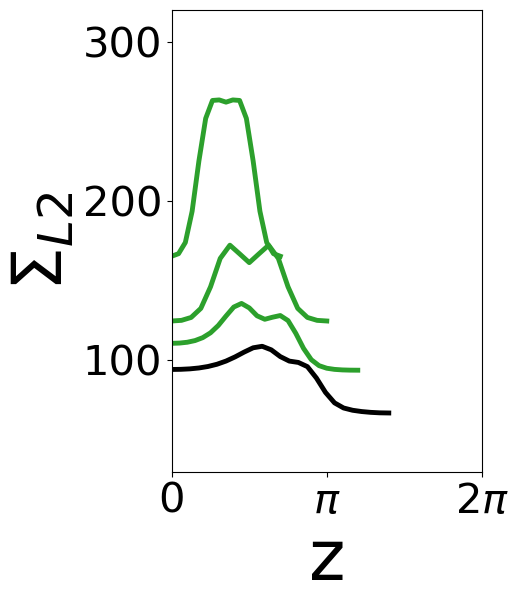

In [ ]:
plt.figure(figsize=(4,6))
width = 3.5

# plot_state_Lz_Nz_W(base_flow_20, Lz=4*np.pi, Nz=64, W=20, suffix_end='localised', color='black', linewidth=3.5)


# plot_state_Lz_Nz_W(base_flow_14, Lz=0.1*np.pi, Nz=32, W=14, suffix_end='m=1', tile=True, color='tab:red', linewidth=width)
# plot_state_Lz_Nz_W(base_flow_14, Lz=0.18*np.pi, Nz=32, W=14, suffix_end='m=1', tile=True, color='black', linewidth=width)
# plot_state_Lz_Nz_W(base_flow_14, Lz=0.28*np.pi, Nz=32, W=14, suffix_end='m=1', tile=True,color='tab:red', linewidth=width)
# plot_state_Lz_Nz_W(base_flow_14, Lz=np.pi, Nz=32, W=14, suffix_end='localised', color='tab:green', linewidth=width)
plot_state_Lz_Nz_W(base_flow_14, Lz=1.4*np.pi, Nz=32, W=14, suffix_end='localised',color='tab:green', linewidth=width)
plot_state_Lz_Nz_W(base_flow_14, Lz=2*np.pi, Nz=32, W=14, suffix_end='localised', color='tab:green', linewidth=width)
plot_state_Lz_Nz_W(base_flow_14, Lz=2.4*np.pi, Nz=48, W=14, suffix_end='localised',color='tab:green', linewidth=width)
plot_state_Lz_Nz_W(base_flow_14, Lz=2.8*np.pi, Nz=48, W=14, suffix_end='localised', color='black', linewidth=width)


# plot_state_Lz_Nz_W(base_flow_20, Lz=1*np.pi, Nz=32, W=20, suffix_end='periodic-yz', tile=4, color='black', linewidth=width)

# plot_state_Lz_Nz_W(base_flow_15_8, Lz=3.16*np.pi, Nz=64, W=15.8, suffix_end='localised', color='tab:orange', linewidth=width)
# plot_state_Lz_Nz_W(base_flow_17_6, Lz=3.52*np.pi, Nz=64, W=17.6, suffix_end='localised', color='tab:orange', linewidth=width)
# plot_state_Lz_Nz_W(base_flow_18_2, Lz=3.64*np.pi, Nz=64, W=18.2, suffix_end='localised', color='tab:orange', linewidth=width)


# suffix_end = f'recent-a-{np.pi/2:.4g}-b-{np.pi/4:.4g}-Lz-orig-3,14'


# plt.yscale('log')
plt.ylim(30, 320)
plt.xlabel('z', fontsize=50)
plt.ylabel(r'$ \Sigma_{L2}$', fontsize=50)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.xticks([0, np.pi ,2*np.pi, -np.pi, -2*np.pi], ['0', r'$\pi$', r'$2\pi$', r'$-\pi$', r'$-2\pi$'], fontsize=30)
# plt.yticks([60, 100,200, 400],[60, 100,200, 400] , fontsize=30)
plt.xlim(0, 2*np.pi)


2025-05-23 12:30:49,225 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_12,566_ndim_3_N_64-64-64_recent-localised/
2025-05-23 12:30:49,292 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_14_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_8,7965_ndim_3_N_64-64-48_recent-localised/
2025-05-23 12:30:49,323 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_15,8_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_9,9274_ndim_3_N_64-64-64_recent-localised/
2025-05-23 12:30:49,356 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_17,6_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_11,

(0.0, 6.283185307179586)

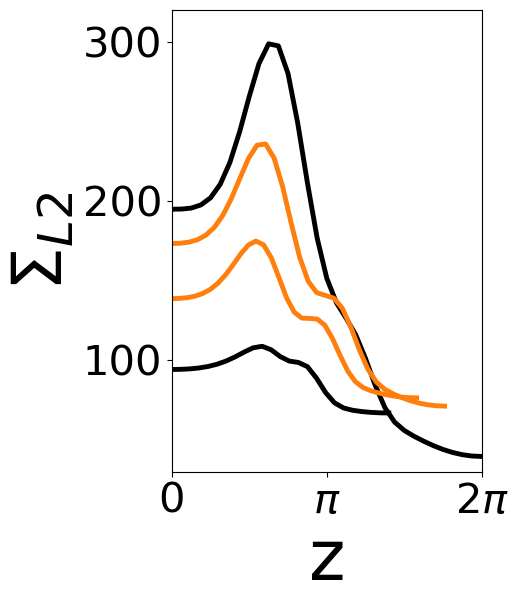

In [ ]:
plt.figure(figsize=(4,6))
width = 3.5

plot_state_Lz_Nz_W(base_flow_20, Lz=4*np.pi, Nz=64, W=20, suffix_end='localised', color='black', linewidth=width)


# plot_state_Lz_Nz_W(base_flow_14, Lz=0.1*np.pi, Nz=32, W=14, suffix_end='m=1', tile=True, color='tab:red', linewidth=width)
# plot_state_Lz_Nz_W(base_flow_14, Lz=0.18*np.pi, Nz=32, W=14, suffix_end='m=1', tile=True, color='black', linewidth=width)
# plot_state_Lz_Nz_W(base_flow_14, Lz=0.28*np.pi, Nz=32, W=14, suffix_end='m=1', tile=True,color='tab:red', linewidth=width)
# plot_state_Lz_Nz_W(base_flow_14, Lz=np.pi, Nz=32, W=14, suffix_end='localised', color='black', linewidth=width)
# plot_state_Lz_Nz_W(base_flow_14, Lz=1.4*np.pi, Nz=32, W=14, suffix_end='localised',color='tab:red', linewidth=width)
# plot_state_Lz_Nz_W(base_flow_14, Lz=2*np.pi, Nz=32, W=14, suffix_end='localised', color='tab:green', linewidth=width)
# plot_state_Lz_Nz_W(base_flow_14, Lz=2.4*np.pi, Nz=48, W=14, suffix_end='localised',color='tab:green', linewidth=width)
plot_state_Lz_Nz_W(base_flow_14, Lz=2.8*np.pi, Nz=48, W=14, suffix_end='localised', color='black', linewidth=width)


# plot_state_Lz_Nz_W(base_flow_20, Lz=1*np.pi, Nz=32, W=20, suffix_end='periodic-yz', tile=4, color='black', linewidth=width)

plot_state_Lz_Nz_W(base_flow_15_8, Lz=3.16*np.pi, Nz=64, W=15.8, suffix_end='localised', color='tab:orange', linewidth=width)
plot_state_Lz_Nz_W(base_flow_17_6, Lz=3.52*np.pi, Nz=64, W=17.6, suffix_end='localised', color='tab:orange', linewidth=width)
# plot_state_Lz_Nz_W(base_flow_18_2, Lz=3.64*np.pi, Nz=64, W=18.2, suffix_end='localised', color='tab:orange', linewidth=width)


# suffix_end = f'recent-a-{np.pi/2:.4g}-b-{np.pi/4:.4g}-Lz-orig-3,14'


# plt.yscale('log')
plt.ylim(30, 320)
plt.xlabel('z', fontsize=50)
plt.ylabel(r'$ \Sigma_{L2}$', fontsize=50)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.xticks([0, np.pi ,2*np.pi, -np.pi, -2*np.pi], ['0', r'$\pi$', r'$2\pi$', r'$-\pi$', r'$-2\pi$'], fontsize=30)
# plt.yticks([60, 100,200, 400],[60, 100,200, 400] , fontsize=30)
plt.xlim(0, 2*np.pi)


2025-05-23 12:30:49,567 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_50,265_ndim_3_N_64-64-512_recent-localised/


2025-05-23 12:30:50,088 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_37,699_ndim_3_N_64-64-192_recent-localised/
2025-05-23 12:30:50,188 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_25,133_ndim_3_N_64-64-128_recent-localised/
2025-05-23 12:30:50,256 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_12,566_ndim_3_N_64-64-64_recent-localised/


(0.0, 25.446900494077322)

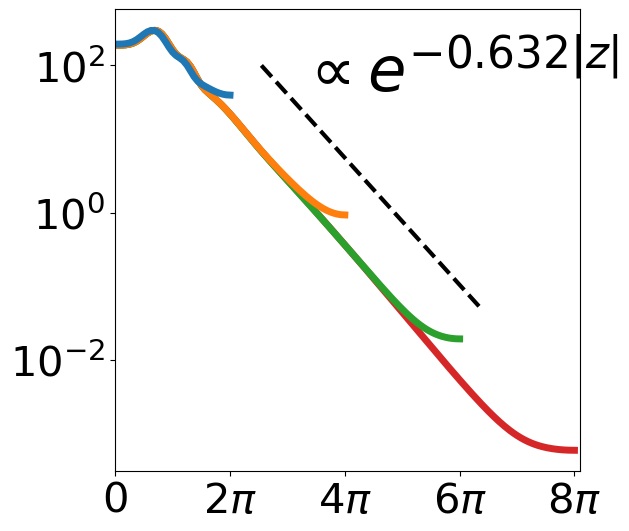

In [ ]:
plt.figure(figsize=(6,6))
# plot_state_Lz_Nz_W(base_flow_20, Lz=16*np.pi, Nz=384, W=20, suffix_end='localised', log_scale=True, color='black', linewidth=3)
plot_state_Lz_Nz_W(base_flow_20, Lz=16*np.pi, Nz=512, W=20, suffix_end='localised', log_scale=True, color='tab:red', linewidth=5)
plot_state_Lz_Nz_W(base_flow_20, Lz=12*np.pi, Nz=192, W=20, suffix_end='localised', log_scale=True, color='tab:green', linewidth=5)
plot_state_Lz_Nz_W(base_flow_20, Lz=8*np.pi, Nz=128, W=20, suffix_end='localised', log_scale=True, color='tab:orange', linewidth=5)
plot_state_Lz_Nz_W(base_flow_20, Lz=4*np.pi, Nz=64, W=20, suffix_end='localised', log_scale=True, color='tab:blue', linewidth=5)
# plot_state_Lz_Nz_W(base_flow_20, Lz=6*np.pi, Nz=96, W=20, suffix_end='localised', log_scale=True)
# plot_state_Lz_Nz_W(base_flow_20, Lz=10*np.pi, Nz=160, W=20, suffix_end='localised', log_scale=True)
# plot_state_Lz_Nz_W(base_flow_20, Lz=14*np.pi, Nz=224, W=20, suffix_end='localised', log_scale=True)

gradient = -0.632
z_line = np.linspace(8, 20, 100)
activity_line = np.exp(gradient * (z_line - 8)) * 100
plt.plot(z_line, activity_line, color='black', linestyle='--', zorder=0.01, linewidth=3)
plt.text(10,30, r"$\propto e^{-0.632 |z|}$", fontsize=45, color='black', rotation=0, ha='left', va='bottom')
plt.yscale('log')
# plt.ylim(60, 1000)
# plt.xlabel('z', fontsize=60)
# plt.ylabel(r'$ \Sigma_{L2}$', fontsize=60)
plt.xticks([0, 2*np.pi, 4*np.pi, 6*np.pi, 8*np.pi, -2*np.pi, -4*np.pi, -6*np.pi, -8*np.pi,], ['0', r'$2\pi$', r'$4\pi$', r'$6\pi$', r'$8\pi$', r'$-2\pi$', r'$-4\pi$', r'$-6\pi$', r'$-8\pi$'], fontsize=15)

plt.tick_params(axis='both', which='major', labelsize=30)
plt.xlim(0, 8.1*np.pi)


2025-05-23 12:30:50,495 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_50,265_ndim_3_N_64-64-512_recent-localised/
2025-05-23 12:30:50,744 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_37,699_ndim_3_N_64-64-192_recent-localised/
2025-05-23 12:30:50,859 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_25,133_ndim_3_N_64-64-128_recent-localised/
2025-05-23 12:30:50,939 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_12,5

(0.0, 25.446900494077322)

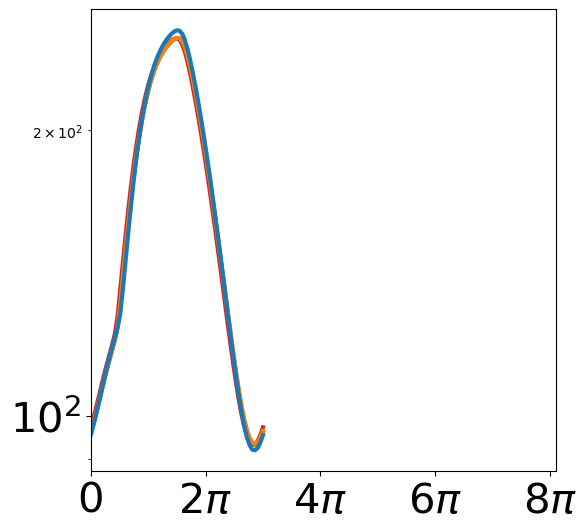

: 

: 

: 

In [ ]:
# plt.figure(figsize=(6,6))
# # plot_state_Lz_Nz_W(base_flow_20, Lz=16*np.pi, Nz=384, W=20, suffix_end='localised', log_scale=True, color='black', linewidth=3)
# plot_streamwise_activity_state_Lz_Nz_W(base_flow_20, Lz=16*np.pi, Nz=512, W=20, suffix_end='localised', log_scale=True, color='tab:red', linewidth=3)
# plot_streamwise_activity_state_Lz_Nz_W(base_flow_20, Lz=12*np.pi, Nz=192, W=20, suffix_end='localised', log_scale=True, color='tab:green', linewidth=3)
# plot_streamwise_activity_state_Lz_Nz_W(base_flow_20, Lz=8*np.pi, Nz=128, W=20, suffix_end='localised', log_scale=True, color='tab:orange', linewidth=3)
# plot_streamwise_activity_state_Lz_Nz_W(base_flow_20, Lz=4*np.pi, Nz=64, W=20, suffix_end='localised', log_scale=True, color='tab:blue', linewidth=3)
# # plot_state_Lz_Nz_W(base_flow_20, Lz=6*np.pi, Nz=96, W=20, suffix_end='localised', log_scale=True)
# # plot_state_Lz_Nz_W(base_flow_20, Lz=10*np.pi, Nz=160, W=20, suffix_end='localised', log_scale=True)
# # plot_state_Lz_Nz_W(base_flow_20, Lz=14*np.pi, Nz=224, W=20, suffix_end='localised', log_scale=True)

# # plt.ylim(60, 1000)
# # plt.xlabel('z', fontsize=60)
# # plt.ylabel(r'$ \Sigma_{L2}$', fontsize=60)
# plt.xticks([0, 2*np.pi, 4*np.pi, 6*np.pi, 8*np.pi, -2*np.pi, -4*np.pi, -6*np.pi, -8*np.pi,], ['0', r'$2\pi$', r'$4\pi$', r'$6\pi$', r'$8\pi$', r'$-2\pi$', r'$-4\pi$', r'$-6\pi$', r'$-8\pi$'], fontsize=15)

# plt.tick_params(axis='both', which='major', labelsize=30)
# plt.xlim(0, 8.1*np.pi)


2025-05-23 12:30:51,265 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_11,577_ndim_3_N_64-64-64_recent-localised-yz/
2025-05-23 12:30:51,305 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_11,624_ndim_3_N_64-64-64_recent-localised-yz/
2025-05-23 12:30:51,326 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_11,781_ndim_3_N_64-64-64_recent-localised-yz/
2025-05-23 12:30:51,348 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_L

Text(0, 0.5, '$(\\bar\\Sigma-\\bar\\Sigma_0)/\\bar\\Sigma_0$')

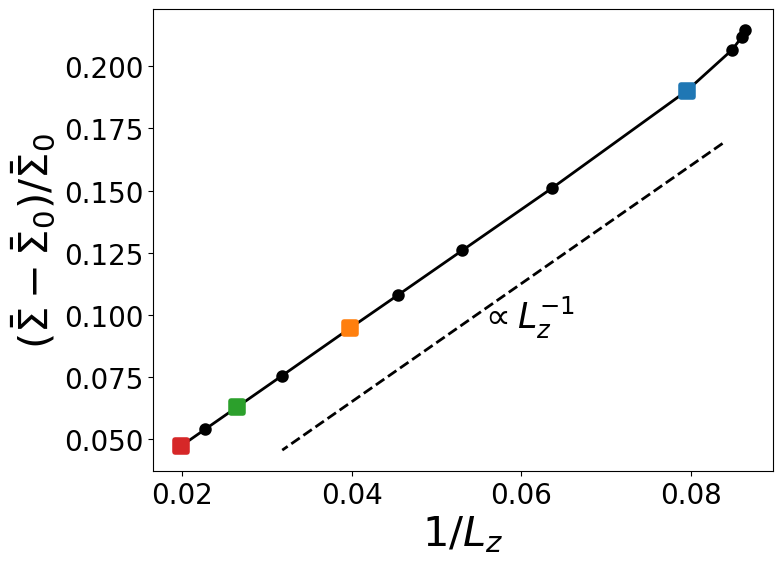

In [ ]:
import scipy.interpolate


def get_metric_at_Lz_Nz_W(Lz, Nz, W, metric_plot, Lz_plot, suffix_end='localised', type='trace'):
    material_params = {'W': W, 'beta': 0.9, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
    solver_params = {'Nx': 64, 'Ny': 64, 'Nz': Nz}
    system_params = {'Lx': 3*np.pi, 'ndim': 3, 'n': 1, 'Lz': Lz}

    t_all, metric_all = get_metric_from_params(material_params, system_params, solver_params, suffix=f'recent-{suffix_end}', subdir='arrowhead_3D', metric=type, deviation=True, merge=True)
    metric_plot.append(metric_all[-1])
    Lz_plot.append(Lz)
    return metric_plot, Lz_plot

plt.figure(figsize=(8,6))
metric_plot, Lz_plot = [], []

Lz_list = np.array([3.685, 3.7, 3.75]) * np.pi
Nz_list = np.array([64, 64, 64, 64])

for Lz, Nz in zip(Lz_list, Nz_list):
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, Nz, 20, metric_plot, Lz_plot, suffix_end='localised-yz')

Lz_list = np.array([4,5,6,7,8,10,12,14, 16]) * np.pi
Nz_list = np.array([64, 80, 96, 112, 128,160, 192, 224, 256])
for Lz, Nz in zip(Lz_list, Nz_list):
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, Nz, 20, metric_plot, Lz_plot)


plt.plot(1/np.array(Lz_plot), metric_plot, color='black', linestyle='-', zorder=0.01, linewidth=2)

Lz_scatter = [Lz for Lz in Lz_plot if not Lz in [4*np.pi,8*np.pi,12*np.pi,16*np.pi]]
metric_scatter = [metric for Lz, metric in zip(Lz_plot, metric_plot) if not Lz in [4*np.pi,8*np.pi,12*np.pi,16*np.pi]]
plt.scatter(1/np.array(Lz_scatter), metric_scatter, color='black', linestyle='-', zorder=0.01, linewidth=3)

#### Curve Estimation ####
Lz_list = np.linspace(3.8, 10, 100) * np.pi
metric_guess = metric_plot[-1] * 16*np.pi / Lz_list - 0.03
plt.plot(1/Lz_list, metric_guess, color='black', linestyle='--', zorder=0.01, linewidth=2, alpha=1)
plt.text(0.055,0.09, r"$\propto L_z^{-1}$", fontsize=25, color='black', rotation=0, ha='left', va='bottom')

# ##### Markers ######


Lz_list = np.array([4,8,12,16]) * np.pi
Nz_list = np.array([64, 128, 192, 256])
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
for Lz, Nz, color in zip(Lz_list, Nz_list,colors):
    metric_plot, Lz_plot = [], []
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(Lz, Nz, 20, metric_plot, Lz_plot)
    plt.scatter(1/np.array(Lz_plot), metric_plot, color=color, marker='s', linestyle='-',s=80, zorder=0.01, linewidth=4)


# plt.xticks([0 ,4*np.pi, 8*np.pi, 12*np.pi, 16*np.pi], [0, r'$4\pi$', r'$8\pi$', r'$12\pi$', r'$16\pi$', ], fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel(r'$1/L_z$', fontsize=30)
plt.ylabel(r'$(\bar\Sigma-\bar\Sigma_0)/\bar\Sigma_0$', fontsize=30)
# plt.yscale('log')
# plt.xscale('log')

# plt.xlim(0, 0.1)
# plt.ylim(0, 0.225)


# ET

In [1]:
%load_ext autoreload
%autoreload 2

%load_ext autoreload
%autoreload 2

import numpy as np
import scipy
import sys
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid

from tools.misc_tools import get_h5_data, get_fpath_sim, get_metric_from_params
from matplotlib.colors import Normalize, LightSource
from mpl_toolkits.mplot3d import Axes3D
from skimage.measure import marching_cubes
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from dedalus.tools import post
from cfd_tools.cartesian_systems.misc_tools import shift_reflect

from tools.plotter import plot_from_array
from tools.kolmogorov import TimeStepper3D
import copy 


def get_metric_at_Lx_Nz_W(Lx, Nx, W, metric_plot, Lx_plot, suffix_end='localised'):
    material_params = {'W': W, 'beta': 0.9, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
    solver_params = {'Nx': Nx, 'Ny': 64, 'Nz': 96}
    system_params = {'Lz': 6*np.pi, 'ndim': 3, 'n': 1, 'Lx': Lx}

    t_all, metric_all = get_metric_from_params(material_params, system_params, solver_params, suffix=f'recent-{suffix_end}', subdir='arrowhead_3D', metric='trace', deviation=True, merge=True)
    metric_plot.append(metric_all[-1])

    Lx_plot.append(Lx)
    return metric_plot, Lx_plot

def get_metric_timeseries_ET(beta, W, merge=True):
    material_params = {'W': W, 'beta': beta, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
    solver_params = {'Nx': 64, 'Ny': 64, 'Nz': 128}
    system_params = {'Lz': 8*np.pi, 'ndim': 3, 'n': 1, 'Lx': 3*np.pi}

    t_all, metric_all = get_metric_from_params(material_params, system_params, solver_params, suffix=f'long-', subdir='ET', metric='trace', deviation=True, merge=merge)
    return metric_all, t_all


def get_u_timeseries_ET(beta, W, merge=True):
    material_params = {'W': W, 'beta': beta, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
    solver_params = {'Nx': 64, 'Ny': 64, 'Nz': 128}
    system_params = {'Lz': 8*np.pi, 'ndim': 3, 'n': 1, 'Lx': 3*np.pi}

    t_all, u = get_metric_from_params(material_params, system_params, solver_params, suffix=f'full-', subdir='large_data', metric='u', deviation=True, merge=merge)
    t_all, v = get_metric_from_params(material_params, system_params, solver_params, suffix=f'full-', subdir='large_data', metric='v', deviation=True, merge=False)
    t_all, w = get_metric_from_params(material_params, system_params, solver_params, suffix=f'full-', subdir='large_data', metric='w', deviation=True, merge=False)

    return u,v,w, t_all


def get_u_rms_timeseries_ET(beta, W, merge=True):
    material_params = {'W': W, 'beta': beta, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
    solver_params = {'Nx': 64, 'Ny': 64, 'Nz': 128}
    system_params = {'Lz': 8*np.pi, 'ndim': 3, 'n': 1, 'Lx': 3*np.pi}

    t_all, u = get_metric_from_params(material_params, system_params, solver_params, suffix=f'full-', subdir='large_data', metric='u_rms', deviation=True, merge=merge)
    t_all, v = get_metric_from_params(material_params, system_params, solver_params, suffix=f'full-', subdir='large_data', metric='v_rms', deviation=True, merge=False)
    t_all, w = get_metric_from_params(material_params, system_params, solver_params, suffix=f'full-', subdir='large_data', metric='w_rms', deviation=True, merge=False)

    return u,v,w, t_all

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
plt.rcParams.update({
    "mathtext.fontset": "cm",     # Computer Modern
    "font.family": "serif",
})

In [3]:
def scatter_at_t(t_all, metric_all, scatter_t_rough, markers='s'):

    for t, marker in zip(scatter_t_rough, markers):
        idx = np.argmin(np.abs(t_all - t))
        # plt.scatter(t_all[idx], metric_all[idx], s=120, marker=marker, zorder=2, color='red')
        plt.scatter(t_all[idx], metric_all[idx], s=40, marker='o', zorder=2, color='red')


In [4]:
material_params = {'W': 30, 'beta': 0.95, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
system_params = {'Lx': 3*np.pi,  'Lz': 8*np.pi, 'ndim': 3, 'n':1}
solver_params = {'Nx': 64, 'Ny': 64, 'Nz': 128}

system_params_temp = copy.deepcopy(system_params)
system_params_temp['ndim'] = 2
timestepper = TimeStepper3D(material_params=material_params, solver_params=solver_params, system_params=system_params_temp)
base_flow = timestepper.base_flow_full


fpath = get_fpath_sim(material_params, system_params, solver_params, suffix='full-', subdir='large_data')
post.merge_process_files(fpath, cleanup=True)


fpath = get_fpath_sim(material_params, system_params, solver_params, suffix='full-splitting', subdir='large_data')
post.merge_process_files(fpath, cleanup=True)



2025-09-14 16:23:57,483 cfd_tools.cartesian_systems.cartesian_system_base 0/1 INFO :: Baseflow converged!...
2025-09-14 16:23:58,316 post 0/1 INFO :: Merging files from /home/tal43/../../nfs/st01/hpc-fluids-rrk26/tal43/vKolmogorov3D/simulations/large_data/sim_W_30_Re_0,5_beta_0,95_eps_0,001_L_inf_Lx_9,4248_Lz_25,133_ndim_3_N_64-64-128_full-/
2025-09-14 16:23:58,324 post 0/1 INFO :: Merging files from /home/tal43/../../nfs/st01/hpc-fluids-rrk26/tal43/vKolmogorov3D/simulations/large_data/sim_W_30_Re_0,5_beta_0,95_eps_0,001_L_inf_Lx_9,4248_Lz_25,133_ndim_3_N_64-64-128_full-splitting/


In [5]:
def plot_midplane(s, idx, roll_x=0, roll_z=0, c_lim=[None,None], cbar=None, suffix_end=''):

    data_fields, data_metric = get_h5_data(material_params, system_params, solver_params, suffix=f'full-{suffix_end}', subdir='large_data', s=s)


    t = data_metric['t']

    print(f"Snapshot is from t={t[idx]}")
    x, y, z = data_fields['x'], data_fields['y'], data_fields['z']
    Nx, Ny, Nz = solver_params['Nx'], solver_params['Ny'], solver_params['Nz']
    Lz = system_params['Lz']
    Lx = system_params['Lx']

    # p = data_fields['p'][idx,:,:,:]
    c22 = data_fields['c22'][idx,:,:,:]
    c11 = data_fields['c11'][idx,:,:,:]
    u = data_fields['u'][idx,:,:,:]
    v = data_fields['v'][idx,:,:,:]
    w = data_fields['w'][idx,:,:,:]
    c33 = data_fields['c33'][idx,:,:,:]
    # tr = c11 + c22 + c33

    # Tr = base_flow['c11'] + base_flow['c22'] + base_flow['c33']
    # U = base_flow['u']

    mean_c22_y = np.mean(c22, axis=(0,1))

    Ny = mean_c22_y.shape[0]
    if mean_c22_y[0] > mean_c22_y[Ny//2]:
        u = shift_reflect(u, parity='odd')
        v = shift_reflect(v, parity='even')
        w = shift_reflect(w, parity='even')
        # p = shift_reflect(p, parity='even')
        c22 = shift_reflect(c22, parity='even')
        c33 = shift_reflect(c33, parity='even')
        c11 = shift_reflect(c11, parity='even')


    u = np.roll(u, axis=0, shift=roll_x)
    v = np.roll(v, axis=0, shift=roll_x)
    w = np.roll(w, axis=0, shift=roll_x)
    # p = np.roll(p, axis=0, shift=roll_x)
    c22 = np.roll(c22, axis=0, shift=roll_x)
    c33 = np.roll(c33, axis=0, shift=roll_x)
    c11 = np.roll(c11, axis=0, shift=roll_x)


    u = np.roll(u, axis=1, shift=roll_z)
    v = np.roll(v, axis=1, shift=roll_z)
    w = np.roll(w, axis=1, shift=roll_z)
    # p = np.roll(p, axis=1, shift=roll_z)
    c22 = np.roll(c22, axis=1, shift=roll_z)
    c33 = np.roll(c33, axis=1, shift=roll_z)
    c11 = np.roll(c11, axis=1, shift=roll_z)

    # p = p - base_flow['p'][:, None, :]
    u = u - base_flow['u'][:, None, :]
    v = v - base_flow['v'][:, None, :]
    w = w - base_flow['w'][:, None, :]
    c22 = c22  - base_flow['c22'][:, None, :]
    c11 = c11  - base_flow['c11'][:, None, :]
    c33 = c33  - base_flow['c33'][:, None, :]
    trace = c11 + c22 + c33

    trace_midplane = np.concatenate((trace[:,:, Ny//2].T, trace[:,[0], Ny//2].T), axis=0)
    trace_midplane = np.concatenate((trace_midplane[:,:], trace_midplane[:,[0]]), axis=1)
    z_augmented = np.concatenate((z, [z[0] + Lz]))
    x_augmented = np.concatenate((x, [x[0] + Lx]))
        
    plot_from_array(trace_midplane, z_augmented, x_augmented, save=False, cmin=c_lim[0], cmax=c_lim[1])

    return trace_midplane

In [6]:
def plot_midplane_slice(s, idx, roll_x=0, roll_z=0, c_lim=[None,None], cbar=None, slice_frac=0.5, field='trace'):

    data_fields, data_metric = get_h5_data(material_params, system_params, solver_params, suffix='full-', subdir='large_data', s=s)


    t = data_metric['t']

    print(f"Snapshot is from t={t[idx]}")
    x, y, z = data_fields['x'], data_fields['y'], data_fields['z']
    Nx, Ny, Nz = solver_params['Nx'], solver_params['Ny'], solver_params['Nz']
    Lz = system_params['Lz']
    Lx = system_params['Lx']

    # p = data_fields['p'][idx,:,:,:]
    c22 = data_fields['c22'][idx,:,:,:]
    c11 = data_fields['c11'][idx,:,:,:]
    u = data_fields['u'][idx,:,:,:]
    v = data_fields['v'][idx,:,:,:]
    w = data_fields['w'][idx,:,:,:]
    c33 = data_fields['c33'][idx,:,:,:]
    # tr = c11 + c22 + c33

    # Tr = base_flow['c11'] + base_flow['c22'] + base_flow['c33']
    # U = base_flow['u']

    mean_c22_y = np.mean(c22, axis=(0,1))
    
    Ny = mean_c22_y.shape[0]
    if mean_c22_y[0] > mean_c22_y[Ny//2]:
        u = shift_reflect(u, parity='odd')
        v = shift_reflect(v, parity='even')
        w = shift_reflect(w, parity='even')
        # p = shift_reflect(p, parity='even')
        c22 = shift_reflect(c22, parity='even')
        c33 = shift_reflect(c33, parity='even')
        c11 = shift_reflect(c11, parity='even')

    u = np.roll(u, axis=0, shift=roll_x)
    v = np.roll(v, axis=0, shift=roll_x)
    w = np.roll(w, axis=0, shift=roll_x)
    # p = np.roll(p, axis=0, shift=roll_x)
    c22 = np.roll(c22, axis=0, shift=roll_x)
    c33 = np.roll(c33, axis=0, shift=roll_x)
    c11 = np.roll(c11, axis=0, shift=roll_x)

    u = np.roll(u, axis=1, shift=roll_z)
    v = np.roll(v, axis=1, shift=roll_z)
    w = np.roll(w, axis=1, shift=roll_z)
    # p = np.roll(p, axis=1, shift=roll_z)
    c22 = np.roll(c22, axis=1, shift=roll_z)
    c33 = np.roll(c33, axis=1, shift=roll_z)
    c11 = np.roll(c11, axis=1, shift=roll_z)

    trace = c11 + c22 + c33

    y_idx = int(Ny * slice_frac)
    trace_midplane = np.concatenate((trace[:,:, y_idx].T, trace[:,[0], y_idx].T), axis=0)
    trace_midplane = np.concatenate((trace_midplane[:,:], trace_midplane[:,[0]]), axis=1)
    u_midplane = np.concatenate((u[:,:, y_idx].T, u[:,[0], y_idx].T), axis=0)
    u_midplane = np.concatenate((u_midplane[:,:], u_midplane[:,[0]]), axis=1)
    v_midplane = np.concatenate((v[:,:, y_idx].T, v[:,[0], y_idx].T), axis=0)
    v_midplane = np.concatenate((v_midplane[:,:], v_midplane[:,[0]]), axis=1)
    w_midplane = np.concatenate((w[:,:, y_idx].T, w[:,[0], y_idx].T), axis=0)
    w_midplane = np.concatenate((w_midplane[:,:], w_midplane[:,[0]]), axis=1)
    z_augmented = np.concatenate((z, [z[0] + Lz]))
    x_augmented = np.concatenate((x, [x[0] + Lx]))

    if field == 'trace':        
        plot_from_array(trace_midplane, z_augmented, x_augmented, save=False, cmin=c_lim[0], cmax=c_lim[1])
    elif field == 'u':
        plot_from_array(u_midplane, z_augmented, x_augmented, save=False, cmin=c_lim[0], cmax=c_lim[1])
    elif field == 'v':
        plot_from_array(v_midplane, z_augmented, x_augmented, save=False, cmin=c_lim[0], cmax=c_lim[1])
    elif field == 'w':
        plot_from_array(w_midplane, z_augmented, x_augmented, save=False, cmin=c_lim[0], cmax=c_lim[1])


In [7]:
def plot_midchannel_slice(s, idx, roll_x=0, roll_z=0, c_lim=[None,None], cbar=None, slice_frac=0.5, field='trace'):

    data_fields, data_metric = get_h5_data(material_params, system_params, solver_params, suffix='full-', subdir='large_data', s=s)


    t = data_metric['t']

    print(f"Snapshot is from t={t[idx]}")
    x, y, z = data_fields['x'], data_fields['y'], data_fields['z']
    Nx, Ny, Nz = solver_params['Nx'], solver_params['Ny'], solver_params['Nz']
    Lz = system_params['Lz']
    Lx = system_params['Lx']

    # p = data_fields['p'][idx,:,:,:]
    c22 = data_fields['c22'][idx,:,:,:]
    c11 = data_fields['c11'][idx,:,:,:]
    u = data_fields['u'][idx,:,:,:]
    v = data_fields['v'][idx,:,:,:]
    w = data_fields['w'][idx,:,:,:]
    c33 = data_fields['c33'][idx,:,:,:]
    # tr = c11 + c22 + c33

    # Tr = base_flow['c11'] + base_flow['c22'] + base_flow['c33']
    # U = base_flow['u']

    mean_c22_y = np.mean(c22, axis=(0,1))
    
    Ny = mean_c22_y.shape[0]
    if mean_c22_y[0] > mean_c22_y[Ny//2]:
        u = shift_reflect(u, parity='odd')
        v = shift_reflect(v, parity='even')
        w = shift_reflect(w, parity='even')
        # p = shift_reflect(p, parity='even')
        c22 = shift_reflect(c22, parity='even')
        c33 = shift_reflect(c33, parity='even')
        c11 = shift_reflect(c11, parity='even')

    u = np.roll(u, axis=0, shift=roll_x)
    v = np.roll(v, axis=0, shift=roll_x)
    w = np.roll(w, axis=0, shift=roll_x)
    # p = np.roll(p, axis=0, shift=roll_x)
    c22 = np.roll(c22, axis=0, shift=roll_x)
    c33 = np.roll(c33, axis=0, shift=roll_x)
    c11 = np.roll(c11, axis=0, shift=roll_x)

    u = np.roll(u, axis=1, shift=roll_z)
    v = np.roll(v, axis=1, shift=roll_z)
    w = np.roll(w, axis=1, shift=roll_z)
    # p = np.roll(p, axis=1, shift=roll_z)
    c22 = np.roll(c22, axis=1, shift=roll_z)
    c33 = np.roll(c33, axis=1, shift=roll_z)
    c11 = np.roll(c11, axis=1, shift=roll_z)

    trace = c11 + c22 + c33

    z_idx = int(Nz * slice_frac)

    trace_midplane = np.concatenate((trace[:,z_idx,:].T, trace[:, z_idx, [0]].T), axis=0)
    trace_midplane = np.concatenate((trace_midplane[:,:], trace_midplane[:,[0]]), axis=1)
    u_midplane = np.concatenate((u[:,z_idx,:].T, u[:,z_idx,[0]].T), axis=0)
    u_midplane = np.concatenate((u_midplane[:,:], u_midplane[:,[0]]), axis=1)
    v_midplane = np.concatenate((v[:, z_idx,:].T, v[:,z_idx,[0]].T), axis=0)
    v_midplane = np.concatenate((v_midplane[:,:], v_midplane[:,[0]]), axis=1)
    w_midplane = np.concatenate((w[:,z_idx,:].T, w[:,z_idx,[0]].T), axis=0)
    w_midplane = np.concatenate((w_midplane[:,:], w_midplane[:,[0]]), axis=1)
    x_augmented = np.concatenate((x, [x[0] + Lx]))
    y_augmented = np.concatenate((y, [y[0] + 2*np.pi]))
    z_augmented = np.concatenate((z, [z[0] + Lz]))

    if field == 'trace':        
        plot_from_array(trace_midplane.T, x_augmented, y_augmented, save=False, cmin=c_lim[0], cmax=c_lim[1])
    elif field == 'u':
        plot_from_array(u_midplane.T, x_augmented, y_augmented, save=False, cmin=c_lim[0], cmax=c_lim[1])
    elif field == 'v':
        plot_from_array(v_midplane.T, x_augmented, y_augmented, save=False, cmin=c_lim[0], cmax=c_lim[1])
    elif field == 'w':
        plot_from_array(w_midplane.T, x_augmented, y_augmented, save=False, cmin=c_lim[0], cmax=c_lim[1])

    return x, y, z, trace


In [8]:
def get_vel_rms_y(s, idx):

    data_fields, data_metric = get_h5_data(material_params, system_params, solver_params, suffix='full-', subdir='large_data', s=s)


    t = data_metric['t']

    print(f"Snapshot is from t={t[idx]}")
    x, y, z = data_fields['x'], data_fields['y'], data_fields['z']
    Nx, Ny, Nz = solver_params['Nx'], solver_params['Ny'], solver_params['Nz']
    Lz = system_params['Lz']
    Lx = system_params['Lx']

    # p = data_fields['p'][idx,:,:,:]
    c22 = data_fields['c22'][idx,:,:,:]
    c11 = data_fields['c11'][idx,:,:,:]
    u = data_fields['u'][idx,:,:,:]
    v = data_fields['v'][idx,:,:,:]
    w = data_fields['w'][idx,:,:,:]
    c33 = data_fields['c33'][idx,:,:,:]
    # tr = c11 + c22 + c33

    # Tr = base_flow['c11'] + base_flow['c22'] + base_flow['c33']
    # U = base_flow['u']

    mean_c22_y = np.mean(c22, axis=(0,1))

    Ny = mean_c22_y.shape[0]
    if mean_c22_y[0] > mean_c22_y[Ny//2]:
        u = shift_reflect(u, parity='odd')
        v = shift_reflect(v, parity='even')
        w = shift_reflect(w, parity='even')
        # p = shift_reflect(p, parity='even')
        c22 = shift_reflect(c22, parity='even')
        c33 = shift_reflect(c33, parity='even')
        c11 = shift_reflect(c11, parity='even')


    u_mean_y = np.mean(u - np.mean(u), axis=(0,1))
    v_mean_y = np.mean(v - np.mean(v), axis=(0,1))
    w_mean_y = np.mean(w - np.mean(w), axis=(0,1))

    # u_prime_rms_y = np.sqrt(np.mean((u-u_mean_y[None, None, :])**2, axis=(0,1)))
    # v_prime_rms_y = np.sqrt(np.mean((v-v_mean_y[None, None, :])**2, axis=(0,1)))
    # w_prime_rms_y = np.sqrt(np.mean((w-w_mean_y[None, None, :])**2, axis=(0,1)))

    u_prime_std_y = np.std(u, axis=(0,1))
    v_prime_std_y = np.std(v, axis=(0,1))
    w_prime_std_y = np.std(w, axis=(0,1))

    return u_prime_std_y, v_prime_std_y, w_prime_std_y, u_mean_y, v_mean_y, w_mean_y, y

Snapshot is from t=21400.00199977281
Snapshot is from t=21400.00199977281
Snapshot is from t=21400.00199977281
Snapshot is from t=21400.00199977281


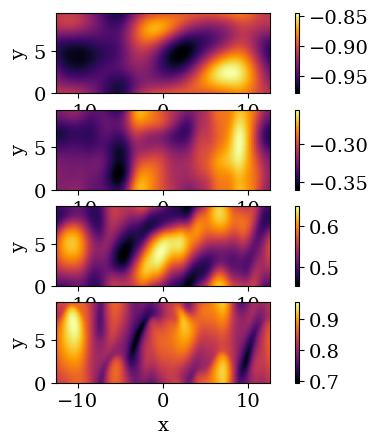

In [9]:
field = 'u'
plt.subplots(4,1)
plt.subplot(4,1,1)
t = plot_midplane_slice(32, 1, slice_frac=0, field=field)
plt.colorbar()
plt.subplot(4,1,2)
t = plot_midplane_slice(32, 1, slice_frac=0.2, field=field)
plt.colorbar()
plt.subplot(4,1,3)
t = plot_midplane_slice(32, 1, slice_frac=0.35, field=field)
plt.colorbar()
plt.subplot(4,1,4)
t = plot_midplane_slice(32, 1, slice_frac=0.5, field=field)
plt.colorbar()

In [10]:
# x,y,z, trace = plot_midchannel_slice(s=32, idx=1, slice_frac=0.5)

# trace = np.roll(trace, axis=1, shift=10)


In [11]:
# fig = plt.figure(figsize=(20, 20))
# ax = fig.add_subplot(111, projection='3d')
# ax.computed_zorder = False

# ax.set_xlabel("x", labelpad=50, fontsize=50)
# ax.set_ylabel("z", labelpad=80, fontsize=50)
# ax.set_zlabel("y",labelpad=50, fontsize=50)

# ax.view_init(elev=20, azim=-70, roll=0)

# ax.set_xlim(0, 3.1*np.pi)  
# ax.set_ylim(-4*np.pi, 4*np.pi)  
# ax.set_zlim((-1.2*np.pi, np.pi))


# ax.set_box_aspect((3*np.pi, 6*np.pi, 2*np.pi), zoom=0.6)

# ax.set_xticks([0, np.pi, 2*np.pi, 3*np.pi], ['0', r'$\pi$', r'$2\pi$', r'$3\pi$'], fontsize=40, va='center', ha='left')
# ax.set_zticks([-np.pi, 0, np.pi, ], [r'$-\pi$', '0', r'$\pi$'], fontsize=40, va='center', ha='right')
# ax.set_yticks([0, 2*np.pi, -2*np.pi], ['0', r'$2\pi$',r'$-2\pi$'], fontsize=40)

# cmap_kind_tr = 'inferno'
# cmap_tr = plt.get_cmap(cmap_kind_tr)

# yy, zz = np.meshgrid(y,z, indexing='ij')

# # p_plane, zgrid_p, ygrid_p = p_plane, zgrid, ygrid
# # facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))

# trace_midchannel = trace[0,:,:].T

# facecolors_tr = cmap_tr((trace_midchannel - np.min(trace)) / (np.max(trace) - np.min(trace)))

# ax.plot_surface(0 * np.ones_like(zz), zz, yy, rstride=1, cstride=1,
#                             facecolors=facecolors_tr, shade=False, zorder=1)


# xx, yy = np.meshgrid(x, y, indexing='ij')

# # p_plane, zgrid_p, ygrid_p = p_plane, zgrid, ygrid
# # facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))
# idx = 65
# trace_midchannel = trace[:,idx,:]

# facecolors_tr = cmap_tr((trace_midchannel - np.min(trace)) / (np.max(trace) - np.min(trace)))

# ax.plot_surface(xx, z[idx] * np.ones_like(xx), yy, rstride=1, cstride=1,
#                             facecolors=facecolors_tr, shade=False, zorder=2)

# rescale = 3,
# shift = 3*np.pi/2

# ax.plot(shift+u_mean_y*rescale ,y, zs=z[idx], zdir='y', color='yellow', zorder=3, linewidth=3)
# ax.plot(shift+10*v_mean_y*rescale ,y, zs=z[idx], zdir='y', color='red', zorder=3, linewidth=3)
# ax.plot(shift+10*w_mean_y*rescale ,y, zs=z[idx], zdir='y', color='red', zorder=3, linewidth=3)

# ax.fill_betweenx(y, shift+(u_mean_y-u_rms_y)*rescale,shift+(u_mean_y+u_rms_y)*rescale,  zs=z[idx], zdir='y', color='yellow', zorder=3, linewidth=3)


# ax.plot(shift*np.ones_like(y) ,y, zs=z[idx], zdir='y', color='black', linestyle='--', zorder=3, linewidth=3)

# # plt.plot(u_mean_y, y)
# # plt.plot(10*v_mean_y, y)
# # plt.plot(10*w_mean_y, y)

# # plt.fill_betweenx(y, u_mean_y - u_rms_y, u_mean_y + u_rms_y, alpha=0.3)
# # plt.fill_betweenx(y, 10*(v_mean_y - v_rms_y), 10*(v_mean_y + v_rms_y), alpha=0.3)
# # plt.fill_betweenx(y, 10*(w_mean_y - w_rms_y), 10*(w_mean_y + w_rms_y), alpha=0.3)




Snapshot is from t=21400.00199977281


([<matplotlib.axis.XTick at 0x7f28588c0750>,
 [Text(-1.0, 0, '-1'),
  Text(-0.5, 0, '-0.5'),
  Text(0.0, 0, '0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1')])

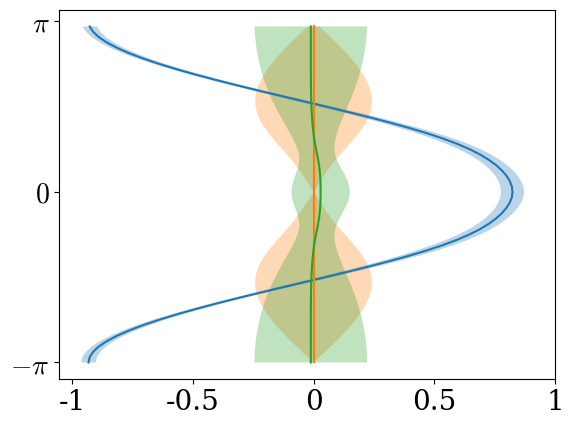

In [12]:

u_std_y, v_std_y, w_std_y, u_mean_y, v_mean_y, w_mean_y, y = get_vel_rms_y(s=32, idx=1)

plt.plot(u_mean_y, y)
plt.plot(10*v_mean_y, y)
plt.plot(10*w_mean_y, y)

plt.fill_betweenx(y, u_mean_y - u_std_y, u_mean_y + u_std_y, alpha=0.3)
plt.fill_betweenx(y, 10*(v_mean_y - v_std_y), 10*(v_mean_y + v_std_y), alpha=0.3)
plt.fill_betweenx(y, 10*(w_mean_y - w_std_y), 10*(w_mean_y + w_std_y), alpha=0.3)

plt.yticks([-np.pi, 0 , np.pi], [r'$-\pi$', r'$0$', r'$\pi$'], fontsize=20)
plt.xticks([-1,-0.5, 0,0.5,1], [-1,-0.5,0,0.5,1], fontsize=20)

Snapshot is from t=31000.002001728586


([<matplotlib.axis.XTick at 0x7f2858806bd0>,
 [Text(-1.0, 0, '-1'),
  Text(-0.5, 0, '-0.5'),
  Text(0.0, 0, '0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1')])

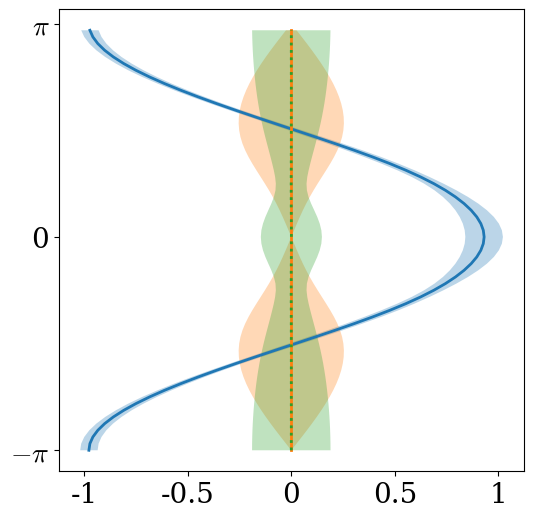

In [13]:
u_rms_y, v_rms_y, w_rms_y, u_mean_y, v_mean_y, w_mean_y, y = get_vel_rms_y(s=51, idx=3)
plt.figure(figsize=(6,6))
plt.plot(u_mean_y, y, linewidth=2)
plt.plot(10*v_mean_y, y, linewidth=2)
plt.plot(10*w_mean_y, y, linestyle=':', linewidth=2)

plt.fill_betweenx(y, u_mean_y - u_rms_y, u_mean_y + u_rms_y, alpha=0.3)
plt.fill_betweenx(y, 10*(v_mean_y - v_rms_y), 10*(v_mean_y + v_rms_y), alpha=0.3)
plt.fill_betweenx(y, 10*(w_mean_y - w_rms_y), 10*(w_mean_y + w_rms_y), alpha=0.3)


plt.yticks([-np.pi, 0 , np.pi], [r'$-\pi$', 0, r'$\pi$'], fontsize=20)
plt.xticks([-1,-0.5, 0,0.5,1], [-1,-0.5,0,0.5,1], fontsize=20)


Snapshot is from t=31000.002001728586


(array([0.        , 0.14726216, 0.29452431, 0.44178647, 0.58904862,
        0.73631078, 0.88357293, 1.03083509, 1.17809725, 1.3253594 ,
        1.47262156, 1.61988371, 1.76714587, 1.91440802, 2.06167018,
        2.20893233, 2.35619449, 2.50345665, 2.6507188 , 2.79798096,
        2.94524311, 3.09250527, 3.23976742, 3.38702958, 3.53429174,
        3.68155389, 3.82881605, 3.9760782 , 4.12334036, 4.27060251,
        4.41786467, 4.56512682, 4.71238898, 4.85965114, 5.00691329,
        5.15417545, 5.3014376 , 5.44869976, 5.59596191, 5.74322407,
        5.89048623, 6.03774838, 6.18501054, 6.33227269, 6.47953485,
        6.626797  , 6.77405916, 6.92132131, 7.06858347, 7.21584563,
        7.36310778, 7.51036994, 7.65763209, 7.80489425, 7.9521564 ,
        8.09941856, 8.24668072, 8.39394287, 8.54120503, 8.68846718,
        8.83572934, 8.98299149, 9.13025365, 9.27751581]),
 array([-3.14159265, -3.04341788, -2.94524311, -2.84706834, -2.74889357,
        -2.6507188 , -2.55254403, -2.45436926, -2.356

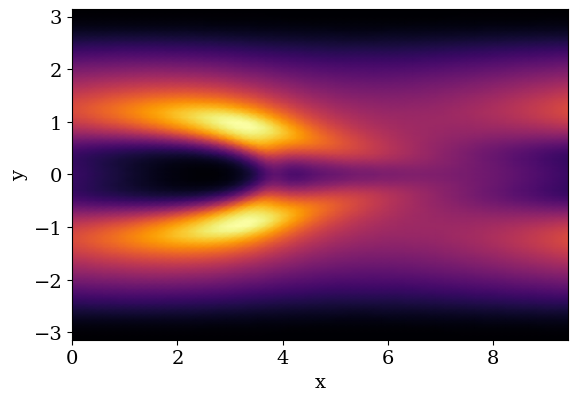

In [14]:
plot_midchannel_slice(s=51, idx=3, slice_frac=0.5)

In [15]:
# Get timeseries for next plot

metric_all, t_all = get_metric_timeseries_ET(beta=0.95, W=30)
u_rms, v_rms, w_rms, t_all2 = get_u_rms_timeseries_ET(beta=0.95, W=30, merge=False)

keep_idx = np.where(t_all2[1:] - t_all2[:-1] != 0)

t_all2 = t_all2[keep_idx]
u_rms, v_rms, w_rms = u_rms[keep_idx], v_rms[keep_idx], w_rms[keep_idx]


2025-09-14 16:24:05,823 post 0/1 INFO :: Merging files from /home/tal43/../../nfs/st01/hpc-fluids-rrk26/tal43/vKolmogorov3D/simulations/ET/sim_W_30_Re_0,5_beta_0,95_eps_0,001_L_inf_Lx_9,4248_Lz_25,133_ndim_3_N_64-64-128_long-/


In [16]:

cubic_interp_u_rms = scipy.interpolate.interp1d(t_all2, u_rms, kind='cubic', axis=0, bounds_error=False, fill_value=np.nan)
cubic_interp_v_rms = scipy.interpolate.interp1d(t_all2, v_rms, kind='cubic', axis=0, bounds_error=False, fill_value=np.nan)
cubic_interp_w_rms = scipy.interpolate.interp1d(t_all2, w_rms, kind='cubic', axis=0, bounds_error=False, fill_value=np.nan)

u_rms, v_rms, w_rms = cubic_interp_u_rms(t_all), cubic_interp_v_rms(t_all), cubic_interp_w_rms(t_all)

In [17]:
u, v, w, t_all2 = get_u_timeseries_ET(beta=0.95, W=30, merge=False)


0.6707919682057021
0.01560825610708761
0.012695005132857744
Snapshot is from t=10200.001999740793
Snapshot is from t=17200.001998917156
Snapshot is from t=21400.00199977281
Snapshot is from t=27700.002001056288
Snapshot is from t=31000.002001728586
Snapshot is from t=31900.00200191194


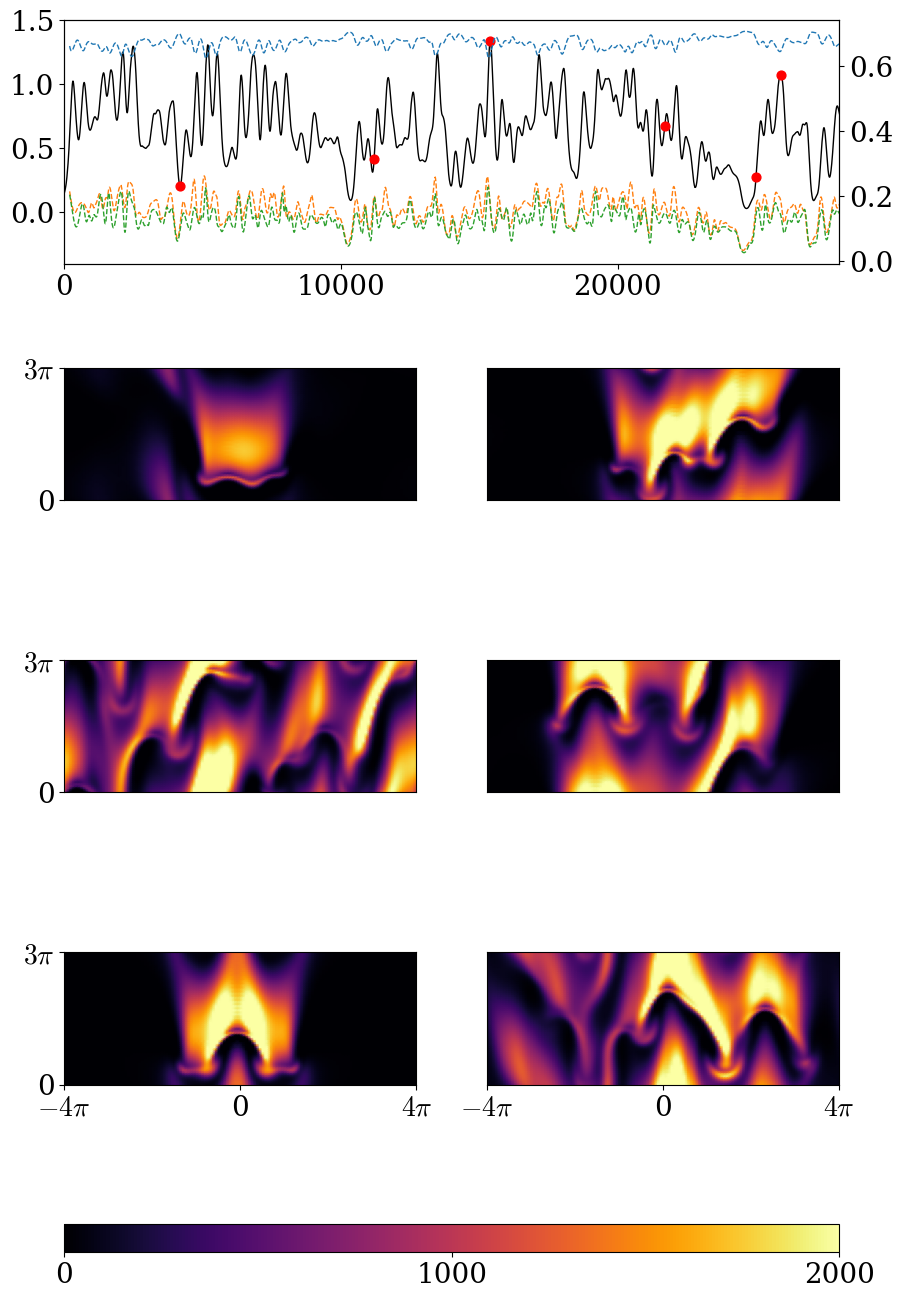

In [18]:
fig, axs = plt.subplots(4,2, figsize=(10,14))



gs = axs[0, 0].get_gridspec()
# remove the underlying Axes
for ax in axs[0, :]:
    ax.remove()


axbig = fig.add_subplot(gs[0, :])

color = 'red'
fontsize = 20
s = 350

shift = 6000
# metric_all, t_all = get_metric_timeseries_ET(beta=0.95, W=30)
axbig.plot(t_all-shift, metric_all, linewidth=1, color='black')
scatter_at_t(t_all-shift, metric_all, scatter_t_rough=np.array([10200, 17200, 21400,27700, 31000, 31900])-shift, markers=['<','d','o', '^', 's', '>'])

plt.yticks(fontsize=fontsize)
plt.ylim([-0.4,1.5])
plt.xticks([0,10000,20000], fontsize=fontsize)

axbig2 = plt.twinx()

# u, v, w, t_all2 = get_u_timeseries_ET(beta=0.95, W=30, merge=False)
axbig2.plot(t_all-shift, u_rms, linewidth=1, color='tab:blue', linestyle='--')
axbig2.plot(t_all-shift, 10*v_rms, linewidth=1, color='tab:orange', linestyle='--')
axbig2.plot(t_all-shift, 10*w_rms, linewidth=1, color='tab:green', linestyle='--')


print(np.nanmean(u_rms[np.logical_and(0<(t_all-shift), (t_all-shift)<28000)]))
print(np.nanmean(v_rms[np.logical_and(0<(t_all-shift), (t_all-shift)<28000)]))
print(np.nanmean(w_rms[np.logical_and(0<(t_all-shift), (t_all-shift)<28000)]))

plt.yticks(fontsize=fontsize)
plt.xticks([0,10000,20000], fontsize=fontsize)
plt.xlim([0,28000])
# plt.ylim([0, 2.5])


ax = plt.subplot(4,2,3)


plot_midplane(s=9, idx=2, c_lim=[0,2000], cbar=None, roll_x=15, roll_z=-14)
# plt.scatter(-3.6*np.pi, 2.6*np.pi, marker='<', color=color, s=s, clip_on=False)
# plt.xlabel('z', fontsize=20)
plt.ylabel('', fontsize=20)
plt.xlabel('')
# plt.ylabel('')
# plt.xticks([0, 4*np.pi, -4*np.pi], ['0', r'$4\pi$', r'$-4\pi$'], fontsize=fontsize)
plt.xticks([], fontsize=20)

# plt.xticks([], fontsize=20)
plt.yticks([0, 3*np.pi], ['0', r'$3\pi$'], fontsize=fontsize)
ax.set_aspect(1)


ax = plt.subplot(4,2,4)

# plt.xticks([], fontsize=20)
plot_midplane(s=23, idx=-3, c_lim=[0,2000], cbar=None,roll_x=25, roll_z=30)
# plt.scatter(-3.6*np.pi, 2.5*np.pi, marker='d', color=color, s=s, clip_on=False)
plt.xlabel('')
plt.ylabel('', fontsize=20)
plt.xlabel('', fontsize=20)
# plt.yticks([0, 3*np.pi], ['0', r'$3\pi$'], fontsize=fontsize)
# plt.xticks([0, 4*np.pi, -4*np.pi], ['0', r'$4\pi$', r'$-4\pi$'], fontsize=fontsize)
plt.xticks([], fontsize=20)
plt.yticks([], fontsize=20)

plt.subplot(4,2,5)
plot_midplane(s=32, idx=1, c_lim=[0,2000], cbar=None, roll_x=6, roll_z=-5)
# plt.scatter(-3.6*np.pi, 2.6*np.pi, marker='o', color=color, s=s, clip_on=False)
# plt.xticks([0, 4*np.pi, -4*np.pi], ['0', r'$4\pi$', r'$-4\pi$'], fontsize=fontsize)
plt.xticks([], fontsize=20)

plt.yticks([0, 3*np.pi], ['0', r'$3\pi$'], fontsize=fontsize)
plt.xlabel('')
plt.ylabel('')
plt.subplot(4,2,6)
plot_midplane(s=44, idx=5, c_lim=[0,2000], cbar=None,roll_x=25, roll_z=80)
# plt.scatter(-3.6*np.pi, 2.6*np.pi, marker='^', color=color, s=s, clip_on=False)
plt.yticks([])
plt.xlabel('')
plt.ylabel('', fontsize=20)
plt.xlabel('', fontsize=20)
plt.xticks([], fontsize=20)
plt.yticks([], fontsize=20)
# plt.xticks([0, 4*np.pi, -4*np.pi], ['0', r'$4\pi$', r'$-4\pi$'], fontsize=fontsize)
plt.subplot(4,2,7)
plot_midplane(s=51, idx=3, c_lim=[0,2000], cbar=None,roll_x=45, roll_z=-14)
# plt.scatter(-3.6*np.pi, 2.6*np.pi, marker='s', color=color, s=s, clip_on=False)
plt.yticks([])
plt.xlabel('')
plt.ylabel('', fontsize=20)
plt.xlabel('', fontsize=20)
plt.yticks([0, 3*np.pi], ['0', r'$3\pi$'], fontsize=fontsize)

plt.xticks([0, 4*np.pi, -4*np.pi], ['0', r'$4\pi$', r'$-4\pi$'], fontsize=fontsize)
plt.subplot(4,2,8)
plot_midplane(s=53, idx=1, c_lim=[0,2000], cbar=None, roll_x=10, roll_z=45)
# plt.xlabel('z', fontsize=20)

plt.yticks([])
plt.ylabel('')
plt.xlabel('', fontsize=20)
# plt.scatter(-3.6*np.pi, 2.6*np.pi, marker='>', color=color, s=s, clip_on=False)

plt.xticks([0, 4*np.pi, -4*np.pi], ['0', r'$4\pi$', r'$-4\pi$'], fontsize=fontsize)

ax = plt.gca()

fig.subplots_adjust(bottom=0.08)
cbar_ax = fig.add_axes([0.125, 0, 0.775, 0.02])

cbar = plt.colorbar(ax.collections[0], cax=cbar_ax, shrink=0.8, aspect=20, location='bottom', pad=0.05, ticks=[0, 1000, 2000])
# cbar.set_label(label=r'$\Sigma - \Sigma_0$', size=20)
cbar.ax.tick_params(labelsize=fontsize)
# plt.tight_layout() 

Snapshot is from t=21400.00199977281
Snapshot is from t=30700.002001667468
Snapshot is from t=30702.002001667875
Snapshot is from t=30704.002001668283
Snapshot is from t=30706.00200166869
Snapshot is from t=30708.002001669098
Snapshot is from t=30710.002001669505


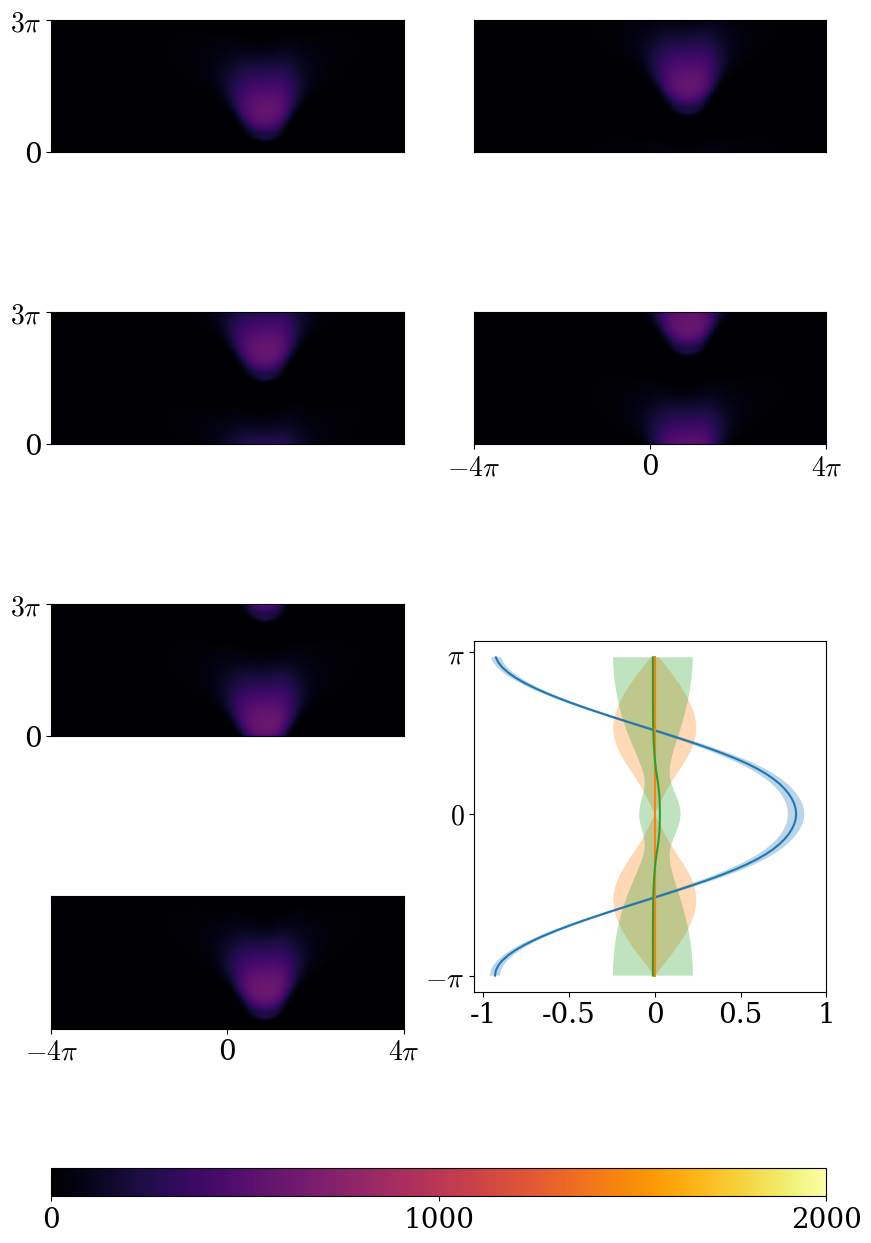

In [31]:
fig, axs = plt.subplots(4,2, figsize=(10,14))


roll_x = 0
roll_z = 0

gs = axs[0, 0].get_gridspec()
# remove the underlying Axes
for ax in axs[2:, 1]:
    ax.remove()

axbig = fig.add_subplot(gs[2:, 1])

u_std_y, v_std_y, w_std_y, u_mean_y, v_mean_y, w_mean_y, y = get_vel_rms_y(s=32, idx=1)

axbig.plot(u_mean_y, y)
axbig.plot(10*v_mean_y, y)
axbig.plot(10*w_mean_y, y)

axbig.fill_betweenx(y, u_mean_y - u_std_y, u_mean_y + u_std_y, alpha=0.3)
axbig.fill_betweenx(y, 10*(v_mean_y - v_std_y), 10*(v_mean_y + v_std_y), alpha=0.3)
axbig.fill_betweenx(y, 10*(w_mean_y - w_std_y), 10*(w_mean_y + w_std_y), alpha=0.3)

plt.yticks([-np.pi, 0 , np.pi], [r'$-\pi$', r'$0$', r'$\pi$'], fontsize=20)
plt.xticks([-1,-0.5, 0,0.5,1], [-1,-0.5,0,0.5,1], fontsize=20)
plt.gca().set_aspect(0.3)

# plt.yticks(fontsize=fontsize)
# plt.ylim([-0.4,1.5])
# plt.xticks([0,10000,20000], fontsize=fontsize)

# plt.ylim([0, 2.5])


ax = plt.subplot(4,2,1)


plot_midplane(s=1, idx=0, c_lim=[0,2000], cbar=None, roll_x=roll_x, roll_z=roll_z, suffix_end='splitting')
# plt.scatter(-3.6*np.pi, 2.6*np.pi, marker='<', color=color, s=s, clip_on=False)
# plt.xlabel('z', fontsize=20)
plt.ylabel('', fontsize=20)
plt.xlabel('')
# plt.ylabel('')
# plt.xticks([0, 4*np.pi, -4*np.pi], ['0', r'$4\pi$', r'$-4\pi$'], fontsize=fontsize)
plt.xticks([], fontsize=20)

# plt.xticks([], fontsize=20)
plt.yticks([0, 3*np.pi], ['0', r'$3\pi$'], fontsize=fontsize)
ax.set_aspect(1)


ax = plt.subplot(4,2,2)

# plt.xticks([], fontsize=20)
plot_midplane(s=1, idx=1, c_lim=[0,2000], cbar=None,roll_x=roll_x, roll_z=roll_z, suffix_end='splitting')
# plt.scatter(-3.6*np.pi, 2.5*np.pi, marker='d', color=color, s=s, clip_on=False)
plt.xlabel('')
plt.ylabel('', fontsize=20)
plt.xlabel('', fontsize=20)
# plt.yticks([0, 3*np.pi], ['0', r'$3\pi$'], fontsize=fontsize)
# plt.xticks([0, 4*np.pi, -4*np.pi], ['0', r'$4\pi$', r'$-4\pi$'], fontsize=fontsize)
plt.xticks([], fontsize=20)
plt.yticks([], fontsize=20)

plt.subplot(4,2,3)
plot_midplane(s=1, idx=2, c_lim=[0,2000], cbar=None, roll_x=roll_x, roll_z=roll_z, suffix_end='splitting')
# plt.scatter(-3.6*np.pi, 2.6*np.pi, marker='o', color=color, s=s, clip_on=False)
# plt.xticks([0, 4*np.pi, -4*np.pi], ['0', r'$4\pi$', r'$-4\pi$'], fontsize=fontsize)
plt.xticks([], fontsize=20)

plt.yticks([0, 3*np.pi], ['0', r'$3\pi$'], fontsize=fontsize)
plt.xlabel('')
plt.ylabel('')
plt.subplot(4,2,4)
plot_midplane(s=1, idx=3, c_lim=[0,2000], cbar=None,roll_x=roll_x, roll_z=roll_z, suffix_end='splitting')
# plt.scatter(-3.6*np.pi, 2.6*np.pi, marker='^', color=color, s=s, clip_on=False)
plt.yticks([])
plt.xlabel('')
plt.ylabel('', fontsize=20)
plt.xlabel('', fontsize=20)
plt.xticks([], fontsize=20)
plt.yticks([], fontsize=20)
plt.xticks([0, 4*np.pi, -4*np.pi], ['0', r'$4\pi$', r'$-4\pi$'], fontsize=fontsize)
plt.subplot(4,2,5)
plot_midplane(s=1, idx=4, c_lim=[0,2000], cbar=None,roll_x=roll_x, roll_z=roll_z, suffix_end='splitting')
# plt.scatter(-3.6*np.pi, 2.6*np.pi, marker='s', color=color, s=s, clip_on=False)
plt.yticks([])
plt.xlabel('')
plt.ylabel('', fontsize=20)
plt.xlabel('', fontsize=20)
plt.yticks([0, 3*np.pi], ['0', r'$3\pi$'], fontsize=fontsize)
plt.xticks([])

plt.subplot(4,2,7)
plot_midplane(s=1, idx=5, c_lim=[0,2000], cbar=None, roll_x=roll_x, roll_z=roll_z, suffix_end='splitting')
# plt.xlabel('z', fontsize=20)
plt.yticks([0, 3*np.pi], ['0', r'$3\pi$'], fontsize=fontsize)

plt.yticks([])
plt.ylabel('')
plt.xlabel('', fontsize=20)
# plt.scatter(-3.6*np.pi, 2.6*np.pi, marker='>', color=color, s=s, clip_on=False)

plt.xticks([0, 4*np.pi, -4*np.pi], ['0', r'$4\pi$', r'$-4\pi$'], fontsize=fontsize)

ax = plt.gca()

fig.subplots_adjust(bottom=0.08)
cbar_ax = fig.add_axes([0.125, 0, 0.775, 0.02])

cbar = plt.colorbar(ax.collections[0], cax=cbar_ax, shrink=0.8, aspect=20, location='bottom', pad=0.05, ticks=[0, 1000, 2000])
# cbar.set_label(label=r'$\Sigma - \Sigma_0$', size=20)
cbar.ax.tick_params(labelsize=fontsize)
# plt.tight_layout() 

In [ ]:
# plt.rcParams['font.size'] = 40

# ax, verts, level_val = plot_3D_surface(trace, x, y, z, ax=None, level_mult=0.41, zorder=0.2, level_val=None)
# # ax, verts, level_val = plot_3D_surface(p, x, y, z, ax=ax, level_mult=[0.9,0.1], zorder=0.2)

# ax.view_init(elev=25, azim=30, roll=0)

# ax.computed_zorder = False

# ax.set_xlim(0, 3.1*np.pi)  
# ax.set_ylim(-3*np.pi, 3*np.pi)  

# ax.set_zlim((-1.2*np.pi, np.pi))


# ax.set_box_aspect((3*np.pi, 6*np.pi, 2*np.pi), zoom=0.6)

# ax.set_xticks([0, np.pi, 2*np.pi, 3*np.pi], ['0', r'$\pi$', r'$2\pi$', r'$3\pi$'], fontsize=40, va='center', ha='left')
# ax.set_zticks([-np.pi, 0, np.pi, ], [r'$-\pi$', '0', r'$\pi$'], fontsize=40, va='center', ha='right')
# ax.set_yticks([0, 2*np.pi, 4*np.pi, -2*np.pi, -4*np.pi], ['0', r'$2\pi$', r'$4\pi$',r'$-2\pi$', r'$-4\pi$'], fontsize=40)
    
# # ax.tick_params(axis='x', pad=5)
# # ax.tick_params(axis='y', pad=5)
# # ax.tick_params(axis='z', pad=5)

# ### Get key p, trace terms
# min_p, max_p = np.min(p), np.max(p) * 0.6
# min_tr, max_tr = np.min(trace), np.max(trace)

# cmap_kind_p = 'viridis'
# cmap_p = plt.get_cmap(cmap_kind_p)
# cmap_kind_tr = 'inferno'
# cmap_tr = plt.get_cmap(cmap_kind_tr)

# norm_p = Normalize(vmin=min_p, vmax=max_p)
# sm_p = plt.cm.ScalarMappable(cmap=cmap_kind_p, norm=norm_p)
# norm_tr = Normalize(vmin=min_tr, vmax=max_tr)
# sm_tr = plt.cm.ScalarMappable(cmap=cmap_kind_tr, norm=norm_tr)

# ### Get x-z plane

# xgrid, zgrid = np.meshgrid(x, z, sparse=False, indexing='ij')

# p_plane = p[:,:,Ny//2]
# tr_plane = trace[:,:,Ny//2]

# p_plane, xgrid_p, zgrid_p = p_plane, xgrid, zgrid
# facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))
# tr_plane, xgrid_tr, zgrid_tr = tr_plane, xgrid, zgrid
# facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

# # ax.plot_surface(xgrid_p, zgrid_p, -1.2*np.pi * np.ones_like(xgrid_p), rstride=1, cstride=1,
#                             # facecolors=facecolors_p, shade=False, zorder=0.1)
# ax.plot_surface(xgrid_tr, zgrid_tr, -1.2*np.pi * np.ones_like(xgrid_tr), rstride=1, cstride=1,
#                             facecolors=facecolors_tr, shade=False, zorder=0.1)

# ### Get x-y plane

# xgrid, ygrid = np.meshgrid(x, y, sparse=False, indexing='ij')

# p_plane = p[:,Nz//2,:]
# tr_plane = trace[:,Nz//2,:]

# p_plane, xgrid_p, ygrid_p = p_plane, xgrid, ygrid
# facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))
# tr_plane, xgrid_tr, ygrid_tr = tr_plane, xgrid, ygrid
# facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

# # ax.plot_surface(xgrid_p, -3*np.pi * np.ones_like(xgrid_p), ygrid_p, rstride=1, cstride=1,
#                             # facecolors=facecolors_p, shade=False, zorder=0.1)
# ax.plot_surface(xgrid_tr, -4*np.pi * np.ones_like(xgrid_tr), ygrid_tr, rstride=1, cstride=1,
#                             facecolors=facecolors_tr, shade=False, zorder=0.1)


# ### Get y-z plane

# zgrid, ygrid = np.meshgrid(z, y, sparse=False, indexing='ij')

# # p_plane = p[Nx//2,:,:]
# tr_plane = trace[Nx//2,:,:]

# # p_plane, zgrid_p, ygrid_p = p_plane, zgrid, ygrid
# # facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))

# tr_plane, zgrid_tr, ygrid_tr = tr_plane, zgrid, ygrid
# facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

# # ax.plot_surface(np.zeros_like(zgrid_p), zgrid_p, ygrid_p+8, rstride=1, cstride=1,
#                             # facecolors=facecolors_p, shade=False, zorder=0.01)
# ax.plot_surface(np.zeros_like(zgrid_tr), zgrid_tr, ygrid_tr + 8, rstride=1, cstride=1,
#                             facecolors=facecolors_tr, shade=False, zorder=0.01)


# # sm_p.set_array([])  # Necessary for ScalarMappable to work with colorbar
# # cbar = plt.colorbar(sm_p, ax=ax, shrink=0.2, aspect=4, location='left', pad=-0.08, ticks=[-1, -0.5, 0, 0.5])
# # cbar.set_label(label='p', size=50)
# # cbar.ax.tick_params(labelsize=40)

# sm_tr.set_array([])  # Necessary for ScalarMappable to work with colorbar
# # cbar = plt.colorbar(sm_tr, ax=ax, shrink=0.2, aspect=4, location='left', pad=-0.08, ticks=[-300, 0, 300, 600, 900])
# cbar = plt.colorbar(sm_tr, ax=ax, shrink=0.2, aspect=4, location='left', pad=-0.08)

# cbar.set_label(label=r'$\Sigma - \Sigma_0$', size=50)
# cbar.ax.tick_params(labelsize=40)

# ### Showing max trace, u over z
# # color = 'red'


# # y_0 = 0
# # y_1 = np.pi * 1.4
# # v_metric = get_activity(v, x, y)
# # v_metric = v_metric / np.max(v_metric)
# # ax.plot(z, v_metric*(y_1-y_0) + y_0, zs=0, zdir='x', color='blue', zorder=0.01, linewidth=3)
# # trace_metric = get_activity(trace, x, y)
# # trace_metric = trace_metric / np.max(trace_metric)
# # ax.plot(z, trace_metric*(y_1-y_0) + y_0, zs=0, zdir='x', color='red', zorder=0.01, linewidth=3)
# # ax.plot(z, y_0 * np.ones_like(z), zs=0, zdir='x', color='black', linestyle='--', zorder=0.01, linewidth=3)
# # ax.plot(z, (y_1+y_0)/2 * np.ones_like(z), zs=0, zdir='x', color='black', linestyle=':', zorder=0.01, linewidth=3)
# # ax.plot(z, y_1 * np.ones_like(z), zs=0, zdir='x', color='black', linestyle='--', zorder=0.01, linewidth=3)

# # ax.text(0,1.05*np.pi, 2.5, r'$\hat v_{L2}$', 'y', color='blue', fontsize=38)
# # ax.text(0, -0.8*np.pi, 0, r'$\hat \Sigma_{L2}$', 'y', color='red', fontsize=38)
# # ax.text(0,-2.4*np.pi, -0.2 *np.pi, r'$0$','y',  color='black', fontsize=40)
# # ax.text(0,-2.4*np.pi, 1.2*np.pi, r'$1$', 'y', color='black', fontsize=40)
# # ax.text(0,-2.8*np.pi, 0.4*np.pi, r'$0.5$', 'y', color='black', fontsize=40)


# Lx Curve

In [ ]:

import copy
from tools.kolmogorov import TimeStepper3D
from tools.misc_tools import get_h5_data, get_fpath_sim
from dedalus.tools import post

def get_metric_at_Lx_Nz_W(Lx, Nx, W, metric_plot, Lx_plot, suffix_end='localised'):
    material_params = {'W': W, 'beta': 0.9, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
    solver_params = {'Nx': Nx, 'Ny': 64, 'Nz': 96}
    system_params = {'Lz': 6*np.pi, 'ndim': 3, 'n': 1, 'Lx': Lx}

    t_all, metric_all = get_metric_from_params(material_params, system_params, solver_params, suffix=f'recent-{suffix_end}', subdir='arrowhead_3D', metric='trace', deviation=True, merge=True)
    metric_plot.append(metric_all[-1])

    Lx_plot.append(Lx)
    return metric_plot, Lx_plot

def get_metric_timeseries(Lx, Nx, W, suffix_end='localised', merge=True):
    material_params = {'W': W, 'beta': 0.9, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
    solver_params = {'Nx': Nx, 'Ny': 64, 'Nz': 96}
    system_params = {'Lz': 6*np.pi, 'ndim': 3, 'n': 1, 'Lx': Lx}

    t_all, metric_all = get_metric_from_params(material_params, system_params, solver_params, suffix=f'long-{suffix_end}', subdir='arrowhead_3D', metric='trace', deviation=True, merge=merge)
    plt.plot(t_all, metric_all)
    return metric_all

In [ ]:
def get_activity_x(field, z, y):
    field_2  = np.array(field) ** 2 
    field_2_z = trapezoid(field_2, z, axis=1) / (6*np.pi)
    field_2_zy = trapezoid(field_2_z, y, axis=-1) / (2*np.pi)
    field_zy = field_2_zy ** 0.5
    return field_zy

def plot_state_Lx_Nz_W(base_flow, Lx, Nx, W, suffix_end='localised', log_scale=False, shift=0, **kwargs):
    material_params = {'W': W, 'beta': 0.9, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
    solver_params = {'Nx': Nx, 'Ny': 64, 'Nz': 96}
    system_params = {'Lx': Lx, 'ndim': 3, 'n': 1, 'Lz': 6*np.pi}

    fpath = get_fpath_sim(material_params, system_params, solver_params, suffix=f'recent-{suffix_end}', subdir='arrowhead_3D')
    post.merge_process_files(fpath, cleanup=True)
    data_fields, _ = get_h5_data(material_params, system_params, solver_params, suffix=f'recent-{suffix_end}', subdir='arrowhead_3D', s=-1)

    x, y, z = data_fields['x'], data_fields['y'], data_fields['z']
    c11 = data_fields['c11'][-1,:,:,:] - base_flow['c11'][[0], None, :]
    c22 = data_fields['c22'][-1,:,:,:] - base_flow['c22'][[0], None, :]
    c33 = data_fields['c33'][-1,:,:,:] - base_flow['c33'][[0], None, :]
    trace_dev = c11 + c22 + c33
    activity = get_activity_x(trace_dev, z, y)

    if shift == 'auto':
        shift = - np.argmax(activity) + len(activity)//2
        
    activity = np.roll(activity, shift=shift)

    x = np.concatenate((x, [x[0] + Lx]))
    activity = np.concatenate((activity, [activity[0]]))

    plt.plot(x, activity, linewidth=4, **kwargs)

    if log_scale: plt.yscale('log')


def plot_span_activity_state_Lx_Nz_W(base_flow, Lx, Nx, W, suffix_end='localised', log_scale=False, shift=0, **kwargs):
    material_params = {'W': W, 'beta': 0.9, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
    solver_params = {'Nx': Nx, 'Ny': 64, 'Nz': 96}
    system_params = {'Lx': Lx, 'ndim': 3, 'n': 1, 'Lz': 6*np.pi}

    fpath = get_fpath_sim(material_params, system_params, solver_params, suffix=f'recent-{suffix_end}', subdir='arrowhead_3D')
    post.merge_process_files(fpath, cleanup=True)
    data_fields, _ = get_h5_data(material_params, system_params, solver_params, suffix=f'recent-{suffix_end}', subdir='arrowhead_3D', s=-1)

    x, y, z = data_fields['x'], data_fields['y'], data_fields['z']
    c11 = data_fields['c11'][-1,:,:,:] - base_flow['c11'][[0], None, :]
    c22 = data_fields['c22'][-1,:,:,:] - base_flow['c22'][[0], None, :]
    c33 = data_fields['c33'][-1,:,:,:] - base_flow['c33'][[0], None, :]
    trace_dev = c11 + c22 + c33
    activity = get_activity(trace_dev, x, y)

    # if shift == 'auto':
    #     shift = - np.argmax(activity) + len(activity)//2
        
    # activity = np.roll(activity, shift=shift)

    z = np.concatenate((z, [z[0] + 6*np.pi]))
    activity = np.concatenate((activity, [activity[0]]))

    plt.plot(z, activity, linewidth=4, **kwargs)

    if log_scale: plt.yscale('log')

def get_base_flow(W, Nx):
    material_params = {'W': W, 'beta': 0.9, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
    solver_params = {'Nx': Nx, 'Ny': 64}
    system_params = {'Lx': 3*np.pi, 'ndim': 2, 'n': 1}

    timestepper = TimeStepper3D(material_params=material_params, solver_params=solver_params, system_params=system_params)
    base_flow = timestepper.base_flow_full
    return base_flow


2025-06-02 17:16:26,517 post 0/1 INFO :: Merging files from /home/tal43/../../nfs/st01/hpc-fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_8,1053_Lz_18,85_ndim_3_N_64-64-96_long-localised/


Big change at s=40...
Big change at s=41...
Big change at s=80...
Big change at s=90...
Big change at s=108...
Big change at s=132...
2025-06-02 17:16:27,143 post 0/1 INFO :: Merging files from /home/tal43/../../nfs/st01/hpc-fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_8,1367_Lz_18,85_ndim_3_N_64-64-96_long-localised/
Big change at s=63...
Big change at s=91...
Big change at s=156...
Big change at s=174...
Big change at s=187...
Big change at s=188...
Big change at s=204...
Big change at s=217...
0.04496643358367897
2025-06-02 17:16:27,760 post 0/1 INFO :: Merging files from /home/tal43/../../nfs/st01/hpc-fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_8,1524_Lz_18,85_ndim_3_N_64-64-96_long-localised/
Big change at s=78...
Big change at s=90...
Big change at s=102...
0.04558554975974643
2025-06-02 17:16:28,247 post 0/1 INFO :: Merging files from /home/tal43/../../nfs/st01/hpc-

array([0.04638312, 0.04638408, 0.04638512, ..., 0.04816213, 0.04821551,
       0.04821723])

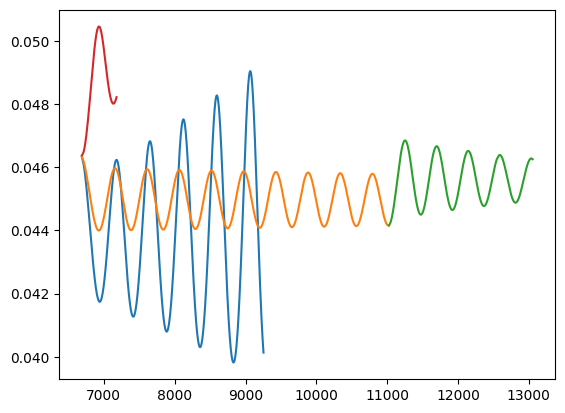

In [ ]:

metric_all = get_metric_timeseries(Lx=2.58*np.pi, Nx=64, W=20, suffix_end='localised')

metric_all = get_metric_timeseries(Lx=2.59*np.pi, Nx=64, W=20, suffix_end='localised')
print(np.mean(metric_all))
metric_all = get_metric_timeseries(Lx=2.595*np.pi, Nx=64, W=20, suffix_end='localised')
print(np.mean(metric_all))

# get_metric_timeseries(Lx=2.6*np.pi, Nx=64, W=20, suffix_end='localised')
get_metric_timeseries(Lx=2.62*np.pi, Nx=64, W=20, suffix_end='localised')


2025-06-02 17:14:48,223 post 0/1 INFO :: Merging files from /home/tal43/../../nfs/st01/hpc-fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_10,996_Lz_18,85_ndim_3_N_96-64-96_long-localised/
2025-06-02 17:14:48,238 post 0/1 INFO :: Merging files from /home/tal43/../../nfs/st01/hpc-fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_11,153_Lz_18,85_ndim_3_N_96-64-96_long-localised/
Big change at s=40...
Big change at s=66...
Big change at s=72...
Big change at s=73...
Big change at s=75...
Big change at s=96...
Big change at s=107...
Big change at s=120...
Big change at s=138...
Big change at s=142...
Big change at s=163...
Big change at s=168...
Big change at s=181...
Big change at s=212...
Big change at s=213...
Big change at s=224...
Big change at s=230...
Big change at s=236...
Big change at s=245...
Big change at s=252...
Big change at s=255...
Big change at s=276...
Big change at 

array([0.23559768, 0.23562769, 0.23566702, ..., 0.40158324, 0.4016634 ,
       0.40174609])

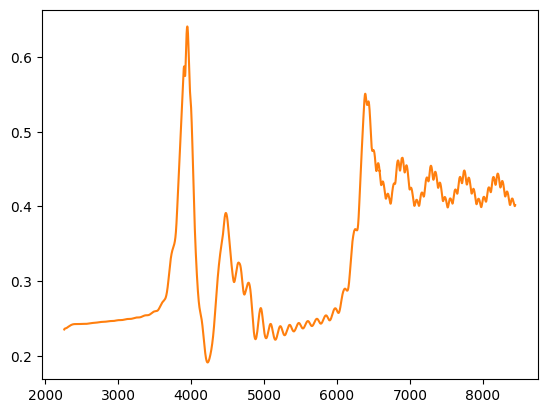

In [ ]:
get_metric_timeseries(Lx=3.5*np.pi, Nx=96, W=20, suffix_end='localised')
get_metric_timeseries(Lx=3.55*np.pi, Nx=96, W=20, suffix_end='localised')

In [ ]:
import matplotlib
def get_colours_list(cmap, n, reverse=False, min_col=0.3, max_col=0.9):
    # Define a colormap
    cmap = matplotlib.cm.get_cmap(cmap)

    # Get individual colors from the colormap
    if n == 1:
        colors = [cmap((min_col + max_col) / 2)]
    else:
        colors = [cmap(min_col + (max_col - min_col) * i / (n - 1)) for i in range(n)]

    if reverse:
        colors = reversed(colors)
    return tuple(colors)

2025-06-02 17:19:15,635 post 0/1 INFO :: Merging files from /home/tal43/../../nfs/st01/hpc-fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_8,1681_Lz_18,85_ndim_3_N_64-64-96_recent-localised/


2025-06-02 17:19:15,691 post 0/1 INFO :: Merging files from /home/tal43/../../nfs/st01/hpc-fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_8,3252_Lz_18,85_ndim_3_N_64-64-96_recent-localised/
2025-06-02 17:19:15,759 post 0/1 INFO :: Merging files from /home/tal43/../../nfs/st01/hpc-fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_8,4823_Lz_18,85_ndim_3_N_64-64-96_recent-localised/
2025-06-02 17:19:15,817 post 0/1 INFO :: Merging files from /home/tal43/../../nfs/st01/hpc-fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_8,7965_Lz_18,85_ndim_3_N_64-64-96_recent-localised/
2025-06-02 17:19:15,873 post 0/1 INFO :: Merging files from /home/tal43/../../nfs/st01/hpc-fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,1106_Lz_18,85_ndim_3_N_64-64-96_recent-localised/
2025-06-02 17:19:15,

/tmp/ipykernel_9336/2682053415.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap(cmap)


2025-06-02 17:19:16,552 post 0/1 INFO :: Merging files from /home/tal43/../../nfs/st01/hpc-fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_10,681_Lz_18,85_ndim_3_N_96-64-96_recent-localised/


(0.01, 0.28)

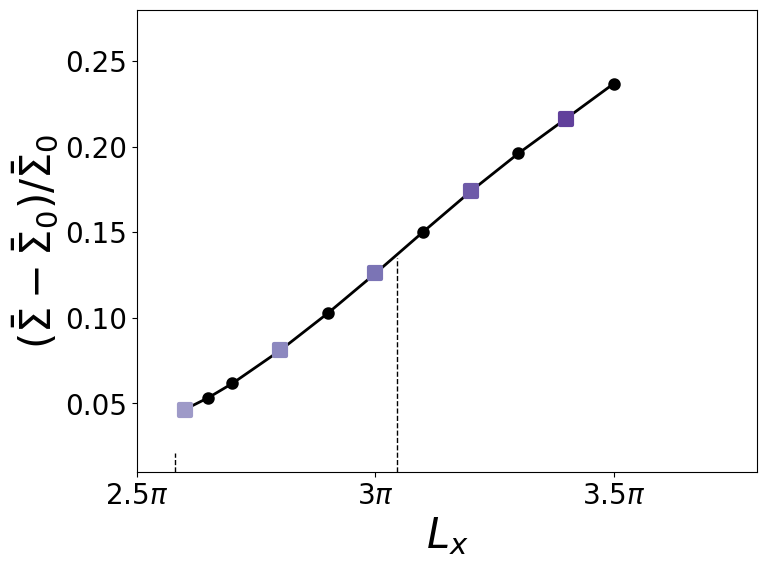

In [ ]:
plt.figure(figsize=(8,6))
metric_plot, Lx_plot = [], []

Lx_list = np.array([2.6, 2.65,2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5]) * np.pi

for Lx in Lx_list:
    Nx = 64 if Lx <=3*np.pi else 96
    metric_plot, Lx_plot = get_metric_at_Lx_Nz_W(Lx, Nx, 20, metric_plot, Lx_plot)

# metric_plot[0]  = 0.04496643358367897
# metric_plot[1]  = 0.04496643358367897
# metric_plot[1]  = 0.0455743147754338
# metric_plot[2]  = 0.045
# metric_plot[3]  = 0.045

plt.plot(Lx_plot, metric_plot, color='black', linestyle='-', zorder=0.01, linewidth=2)

Lx_scatter = [Lx for Lx in Lx_plot if not Lx in [2.6*np.pi, 2.8*np.pi,3*np.pi,3.2*np.pi,3.4*np.pi]]
metric_scatter = [metric for Lx, metric in zip(Lx_plot, metric_plot) if not Lx in [2.6*np.pi, 2.8*np.pi,3*np.pi,3.2*np.pi,3.4*np.pi]]
plt.scatter(Lx_scatter, metric_scatter, color='black', linestyle='-', zorder=0.01, linewidth=3)

print(metric_plot)


##### Markers ######


Lx_list = np.array([2.6,2.8,3,3.2,3.4]) * np.pi
colors = ['tab:blue', 'tab:orange', 'tab:red', 'tab:green', 'tab:purple']
colors = get_colours_list('Purples', 5, min_col=0.5, max_col=0.8)
for Lx, color in zip(Lx_list, colors):
    metric_plot, Lx_plot = [], []
    Nx = 64 if Lx <=3*np.pi else 96
    metric_plot, Lx_plot = get_metric_at_Lx_Nz_W(Lx, Nx, 20, metric_plot, Lx_plot)
    plt.scatter(Lx_plot, metric_plot, color=color, marker='s', linestyle='-',s=80,  zorder=0.01, linewidth=3)

plt.vlines(x=9.57, ymin=0.01, ymax=0.135, color='black', linestyle='--', linewidth=1)
plt.vlines(x=8.105, ymin=0.01, ymax=0.021, color='black', linestyle='--', linewidth=1)
plt.xticks([2.5*np.pi ,3*np.pi, 3.5*np.pi], [r'$2.5\pi$', r'$3\pi$', r'$3.5\pi$'], fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel(r'$L_x$', fontsize=30)
plt.ylabel(r'$(\bar\Sigma-\bar\Sigma_0)/\bar\Sigma_0$', fontsize=30)
plt.xlim(2.5*np.pi, 3.8*np.pi)
plt.ylim(0.01, 0.28)

# plt.xlim(2.5*np.pi, 3*np.pi)
# plt.ylim(0.03, 0.07)


In [ ]:
base_flow_20_64 = get_base_flow(W=20, Nx=64)
base_flow_20_96 = get_base_flow(W=20, Nx=96)

2025-06-01 22:31:20,722 cfd_tools.cartesian_systems.cartesian_system_base 0/1 INFO :: Baseflow converged!...
2025-06-01 22:31:23,824 cfd_tools.cartesian_systems.cartesian_system_base 0/1 INFO :: Baseflow converged!...


2025-06-01 22:33:07,433 post 0/1 INFO :: Merging files from /home/tal43/../../nfs/st01/hpc-fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_8,1681_Lz_18,85_ndim_3_N_64-64-96_recent-localised/
2025-06-01 22:33:07,531 post 0/1 INFO :: Merging files from /home/tal43/../../nfs/st01/hpc-fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_8,7965_Lz_18,85_ndim_3_N_64-64-96_recent-localised/
2025-06-01 22:33:07,626 post 0/1 INFO :: Merging files from /home/tal43/../../nfs/st01/hpc-fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_18,85_ndim_3_N_64-64-96_recent-localised/


/tmp/ipykernel_36217/2682053415.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap(cmap)


2025-06-01 22:33:07,714 post 0/1 INFO :: Merging files from /home/tal43/../../nfs/st01/hpc-fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_10,053_Lz_18,85_ndim_3_N_96-64-96_recent-localised/
2025-06-01 22:33:07,814 post 0/1 INFO :: Merging files from /home/tal43/../../nfs/st01/hpc-fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_10,681_Lz_18,85_ndim_3_N_96-64-96_recent-localised/


(0.0, 380.0)

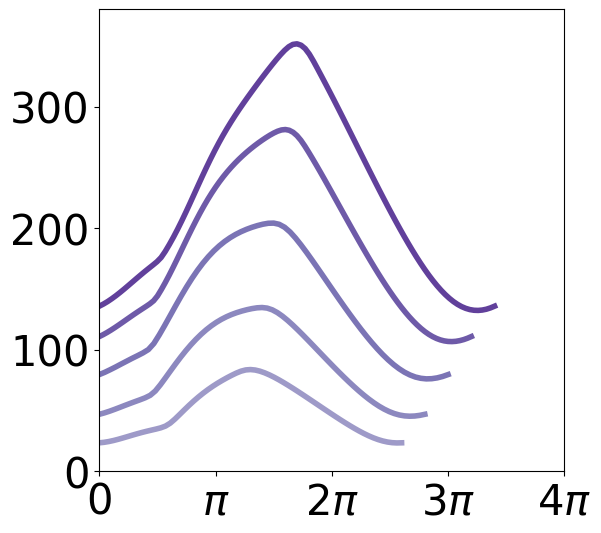

In [ ]:
colors = get_colours_list('Purples', 5, min_col=0.5, max_col=0.8)


plt.figure(figsize=(6,6))
plot_state_Lx_Nz_W(base_flow_20_64, shift='auto', Lx=2.6*np.pi, Nx=64, W=20, suffix_end='localised', log_scale=False, color=colors[0])
plot_state_Lx_Nz_W(base_flow_20_64, shift='auto', Lx=2.8*np.pi, Nx=64, W=20, suffix_end='localised', log_scale=False, color=colors[1])
plot_state_Lx_Nz_W(base_flow_20_64, shift='auto', Lx=3*np.pi, Nx=64, W=20, suffix_end='localised', log_scale=False, color=colors[2])
plot_state_Lx_Nz_W(base_flow_20_96, shift='auto',  Lx=3.2*np.pi, Nx=96, W=20, suffix_end='localised', log_scale=False, color=colors[3])
plot_state_Lx_Nz_W(base_flow_20_96, shift='auto',Lx=3.4*np.pi, Nx=96, W=20, suffix_end='localised', log_scale=False, color=colors[4])

# plt.xlabel('x', fontsize=30)
# plt.ylabel(r'$ \Sigma_{L2}$', fontsize=30)
plt.xticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi, 6*np.pi, 8*np.pi, -2*np.pi, -4*np.pi, -6*np.pi, -8*np.pi,], ['0', r'$\pi$',r'$2\pi$',r'$3\pi$', r'$4\pi$', r'$6\pi$', r'$8\pi$', r'$-2\pi$', r'$-4\pi$', r'$-6\pi$', r'$-8\pi$'], fontsize=15)

plt.tick_params(axis='both', which='major', labelsize=30)
plt.xlim(0,4*np.pi)
plt.ylim(0,380)

2025-05-25 09:44:57,193 post 0/1 INFO :: Merging files from /home/tal43/../../nfs/st01/hpc-fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_8,1681_Lz_18,85_ndim_3_N_64-64-96_recent-localised/
2025-05-25 09:44:57,281 post 0/1 INFO :: Merging files from /home/tal43/../../nfs/st01/hpc-fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_8,7965_Lz_18,85_ndim_3_N_64-64-96_recent-localised/
2025-05-25 09:44:57,370 post 0/1 INFO :: Merging files from /home/tal43/../../nfs/st01/hpc-fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_18,85_ndim_3_N_64-64-96_recent-localised/


/tmp/ipykernel_17882/2682053415.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap(cmap)


2025-05-25 09:44:57,455 post 0/1 INFO :: Merging files from /home/tal43/../../nfs/st01/hpc-fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_10,053_Lz_18,85_ndim_3_N_96-64-96_recent-localised/
2025-05-25 09:44:57,540 post 0/1 INFO :: Merging files from /home/tal43/../../nfs/st01/hpc-fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_10,681_Lz_18,85_ndim_3_N_96-64-96_recent-localised/


(0.0, 9.42477796076938)

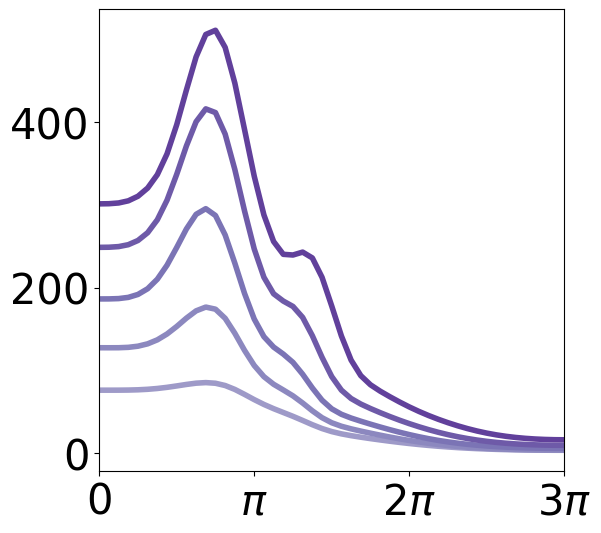

In [ ]:
colors = get_colours_list('Purples', 5, min_col=0.5, max_col=0.8)


plt.figure(figsize=(6,6))
plot_span_activity_state_Lx_Nz_W(base_flow_20_64, shift='auto', Lx=2.6*np.pi, Nx=64, W=20, suffix_end='localised', log_scale=False, color=colors[0])
plot_span_activity_state_Lx_Nz_W(base_flow_20_64, shift='auto', Lx=2.8*np.pi, Nx=64, W=20, suffix_end='localised', log_scale=False, color=colors[1])
plot_span_activity_state_Lx_Nz_W(base_flow_20_64, shift='auto', Lx=3*np.pi, Nx=64, W=20, suffix_end='localised', log_scale=False, color=colors[2])
plot_span_activity_state_Lx_Nz_W(base_flow_20_96, shift='auto',  Lx=3.2*np.pi, Nx=96, W=20, suffix_end='localised', log_scale=False, color=colors[3])
plot_span_activity_state_Lx_Nz_W(base_flow_20_96, shift='auto',Lx=3.4*np.pi, Nx=96, W=20, suffix_end='localised', log_scale=False, color=colors[4])

# plt.xlabel('x', fontsize=30)
# plt.ylabel(r'$ \Sigma_{L2}$', fontsize=30)
plt.xticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi, 6*np.pi, 8*np.pi, -2*np.pi, -4*np.pi, -6*np.pi, -8*np.pi,], ['0', r'$\pi$',r'$2\pi$',r'$3\pi$', r'$4\pi$', r'$6\pi$', r'$8\pi$', r'$-2\pi$', r'$-4\pi$', r'$-6\pi$', r'$-8\pi$'], fontsize=15)

plt.tick_params(axis='both', which='major', labelsize=30)
plt.xlim(0,3*np.pi)

# Windowing and Localised Plot

In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy
import sys
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid

from tools.misc_tools import get_h5_data
from matplotlib.colors import Normalize, LightSource
from mpl_toolkits.mplot3d import Axes3D
from skimage.measure import marching_cubes
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from dedalus.tools import post


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:

from tools.misc_tools import get_fpath_sim
from tools.plotter import plot_from_array
from tools.kolmogorov import TimeStepper3D
import copy 

material_params = {'W': 20, 'beta': 0.9, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
system_params = {'Lx': 3*np.pi,  'Lz': np.pi, 'ndim': 3, 'n':1}
solver_params = {'Nx': 64, 'Ny': 64, 'Nz': 32}

system_params_temp = copy.deepcopy(system_params)
system_params_temp['ndim'] = 2
timestepper = TimeStepper3D(material_params=material_params, solver_params=solver_params, system_params=system_params_temp)
base_flow = timestepper.base_flow_full

data_fields, _ = get_h5_data(material_params, system_params, solver_params, suffix='recent-periodic-yz', subdir='arrowhead_3D', s=-1)

x, y, z = data_fields['x'], data_fields['y'], data_fields['z']

fields = ['p', 'c11', 'c12', 'c22', 'u', 'v']

p = data_fields['p'][-1,:,:,:] - base_flow['p'][[0], None, :]
c11 = data_fields['c11'][-1,:,:,:] - base_flow['c11'][[0], None, :]
c12 = data_fields['c12'][-1,:,:,:] - base_flow['c12'][[0], None, :]
c22 = data_fields['c22'][-1,:,:,:] - base_flow['c22'][[0], None, :]
c33 = data_fields['c33'][-1,:,:,:] - base_flow['c33'][[0], None, :]
u = data_fields['u'][-1,:,:,:] - base_flow['u'][[0], None, :]
v = data_fields['v'][-1,:,:,:] - base_flow['v'][[0], None, :]
trace = c11 + c22 + c33

Lx = system_params['Lx']
Nx = solver_params['Nx']
Ny = solver_params['Ny']
Nz = solver_params['Nz']

from cfd_tools.cartesian_systems.misc_tools import shift_reflect

mean_c22_y = np.mean(c22, axis=(0,1))

Ny = mean_c22_y.shape[0]
if mean_c22_y[0] > mean_c22_y[Ny//2]:
    u = shift_reflect(u, parity='odd')
    v = shift_reflect(v, parity='even')
    p = shift_reflect(p, parity='even')
    trace = shift_reflect(trace, parity='even')
    c22 = shift_reflect(c22, parity='even')


2025-05-15 11:20:36,482 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 2.9e+01/s
2025-05-15 11:20:37,291 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 3.0e+01/s
2025-05-15 11:20:37,497 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 2.4e+01/s
2025-05-15 11:20:37,667 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 2.3e+01/s
2025-05-15 11:20:37,830 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 2.3e+01/s
2025-05-15 11:20:37,839 cfd_tools.cartesian_systems.cartesian_system_base 0/1 INFO :: Baseflow converged!...
2025-05-15 11:20:38,038 pencil 0/1 INFO :: Building pencil matrix 1/32 (~3%) Elapsed: 0s, Remaining: 1s, Rate: 3.1e+01/s
2025-05-15 11:20:38,135 pencil 0/1 INFO :: Building pencil matrix 4/32 (~12%) Elapsed: 0s, Remaining: 1s, Rate: 3.1e+01/s
2025-05-15 11:20:38,260 pencil 0/1 INF

In [ ]:
def draw_surface(array1, x, y, z, ax=None, level_mult=0.7, color='tab:blue', zorder=1, level_val=None):

    if level_val is None:
        level_val = (np.max(array1) - np.min(array1)) * level_mult + np.min(array1)

    try:
        verts, faces, _, _ = marching_cubes(array1, level=level_val, step_size=1, spacing=(x[1]-x[0], y[1]-y[0], z[1]-z[0]))
        
        verts[:, 0] += x[0]
        verts[:, 1] += y[0]
        verts[:, 2] += z[0]

        # Fancy indexing: `verts[faces]` to generate a collection of triangles
        ls = LightSource(azdeg=0.0, altdeg=-65.0)
        mesh = Poly3DCollection(verts[faces], shade=True, lightsource=ls, facecolors=color, zorder=zorder)

        ax.add_collection3d(mesh)
    except:
        pass

    return verts, level_val

In [ ]:

def plot_3D_surface(array1, x, y, z, ax=None, level_mult=0.7, level_val=None, zorder=1):
    if not np.all(np.isclose(np.diff(x, n=2), 0)) or not np.all(np.isclose(np.diff(y, n=2), 0)) or not np.all(np.isclose(np.diff(z, n=2), 0)):
        raise Exception("Grids not equally spaced. Marching Cube Algorithm will be weird...")
    x, y, z = x, z, y

    if ax is None:
        fig = plt.figure(figsize=(20, 20))
        ax = fig.add_subplot(111, projection='3d')
        ax.set_xlabel("x", labelpad=50, fontsize=50)
        ax.set_ylabel("z", labelpad=80, fontsize=50)
        ax.set_zlabel("y",labelpad=50, fontsize=50)

        ax.view_init(elev=30, azim=25, roll=0)

    if isinstance(level_mult, float) or level_mult is None: 
        verts, level_val = draw_surface(array1, x, y, z, ax, level_mult, 'tab:blue', zorder, level_val)
    elif isinstance(level_mult, list):
        verts, level_val = draw_surface(array1, x, y, z, ax, level_mult[0], 'tab:red', zorder)
        verts, level_val = draw_surface(array1, x, y, z, ax, level_mult[1], 'tab:red', zorder)

    plt.tight_layout()

    return ax, verts, level_val

In [ ]:
def get_activity(field, x, y):
    field_2  = np.array(field) ** 2 
    field_2_x = trapezoid(field_2, x, axis=0) / (3*np.pi)
    field_2_xy = trapezoid(field_2_x, y, axis=-1) / (2*np.pi)
    field_xy = field_2_xy ** 0.5
    return field_xy

In [ ]:
# Tile the periodic solution...
roll_x = -26
roll_z = 0

trace_trans = np.roll(trace, shift=roll_x, axis=0)
trace_trans = np.roll(trace_trans, shift=roll_z, axis=1)
trace_tiled = np.tile(trace_trans, (1, 5, 1))
trace_tiled = trace_tiled[:, Nz//2:-Nz//2, :]

p_trans = np.roll(p, shift=roll_x, axis=0)
p_trans = np.roll(p_trans, shift=roll_z, axis=1)
p_tiled = np.tile(p_trans, (1, 5, 1))
p_tiled = p_tiled[:, Nz//2:-Nz//2, :]

u_trans = np.roll(u, shift=roll_x, axis=0)
u_trans = np.roll(u_trans, shift=roll_z, axis=1)
u_tiled = np.tile(u_trans, (1, 5, 1))
u_tiled = u_tiled[:, Nz//2:-Nz//2, :]

v_trans = np.roll(v, shift=roll_x, axis=0)
v_trans = np.roll(v_trans, shift=roll_z, axis=1)
v_tiled = np.tile(v_trans, (1, 5, 1))
v_tiled = v_tiled[:, Nz//2:-Nz//2, :]

x_tiled = x
y_tiled = y
z_tiled = np.concatenate([z-2*np.pi, z-1*np.pi, z , z+1*np.pi, z+2*np.pi])[Nz//2:-Nz//2]

Nz_tiled = Nz * 4




/tmp/ipykernel_1601874/4156377547.py:151: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


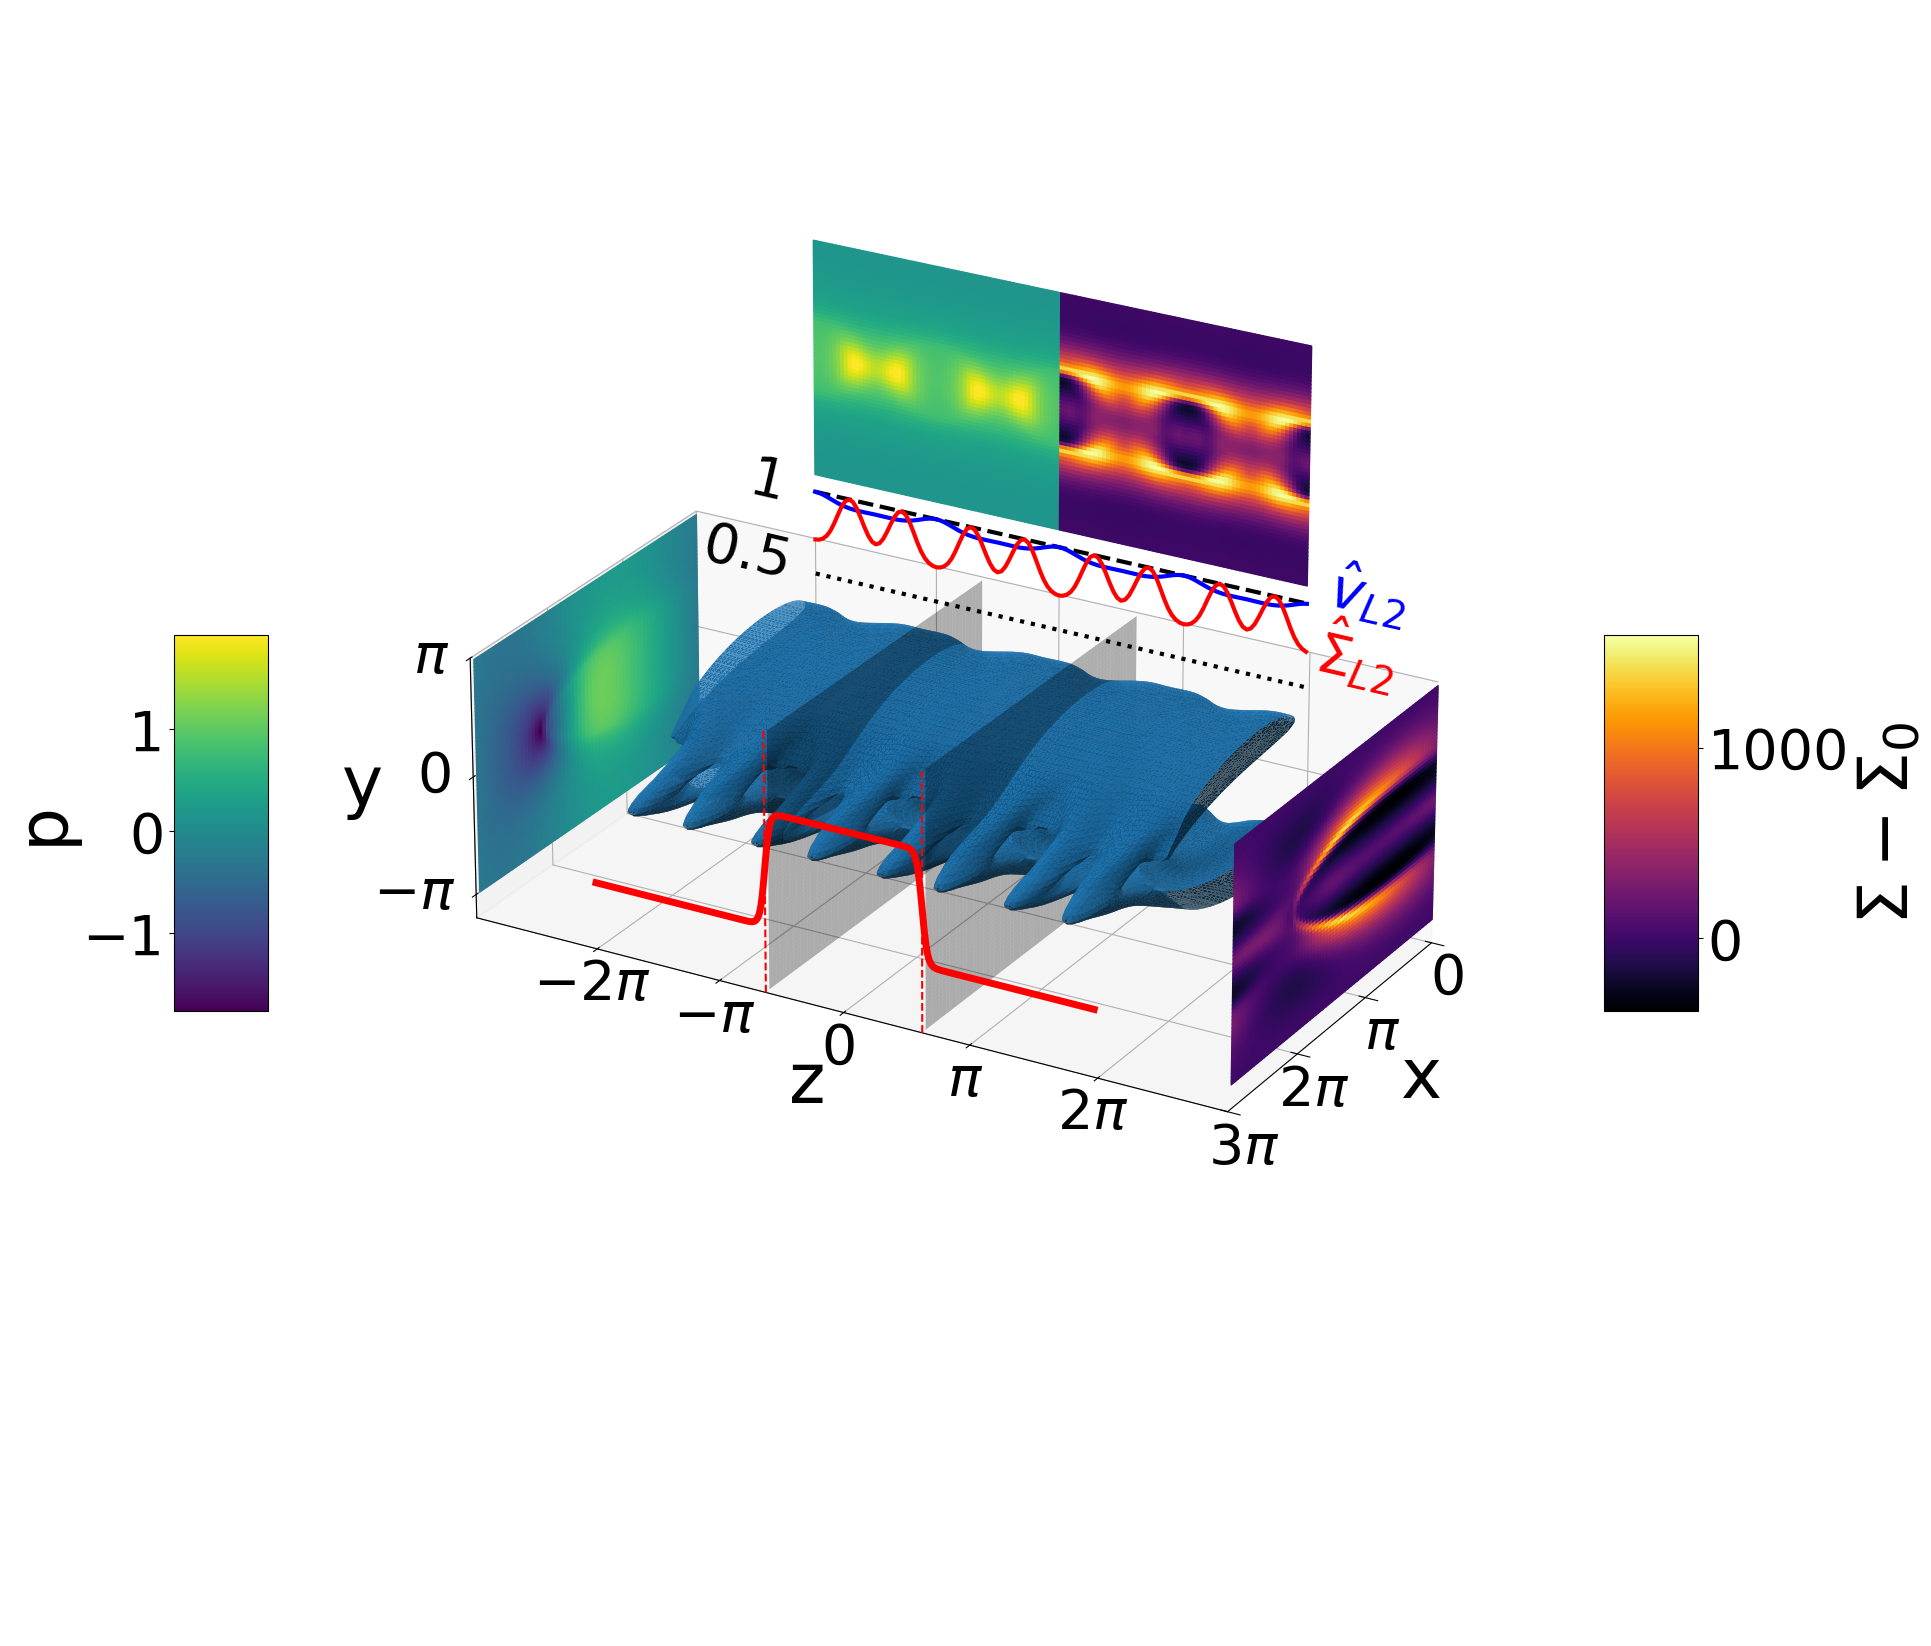

In [ ]:
a, b = np.pi/2, np.pi/4
plt.rcParams['font.size'] = 40

z_idx_ab = np.argmin(np.abs(z_tiled-a-0.5*b))
z_idx__ab = np.argmin(np.abs(z_tiled+a+0.5*b))

ax, verts, level_val = plot_3D_surface(trace_tiled[:,:z_idx__ab+1,:], x_tiled, y_tiled, z_tiled[:z_idx__ab+1], ax=None, zorder=0.2, level_val=450)
ax, verts, level_val = plot_3D_surface(trace_tiled[:,z_idx__ab:z_idx_ab+1,:], x_tiled, y_tiled, z_tiled[z_idx__ab:z_idx_ab+1], ax=ax, zorder=0.5, level_val=450)
ax, verts, level_val = plot_3D_surface(trace_tiled[:,z_idx_ab:,:], x_tiled, y_tiled, z_tiled[z_idx_ab:], ax=ax, zorder=0.6, level_val=450)
ax.computed_zorder = False

ax.view_init(elev=25, azim=30, roll=0)

ax.set_xticks([0, np.pi, 2*np.pi, 3*np.pi], ['0', r'$\pi$', r'$2\pi$', r'$3\pi$'], fontsize=40)
ax.set_zticks([-np.pi, 0, np.pi, ], [r'$-\pi$', '0', r'$\pi$'], fontsize=40, va='center', ha='right')
ax.set_yticks([0, 1*np.pi, 2*np.pi, -1*np.pi, -2*np.pi], ['0', r'$\pi$', r'$2\pi$', r'$-\pi$', r'$-2\pi$'], fontsize=40)

ax.tick_params(axis='x', pad=5)
ax.tick_params(axis='y', pad=5)
ax.tick_params(axis='z', pad=5)

ax.computed_zorder = False

ax.set_xlim(0, 3*np.pi)  
ax.set_ylim(-3*np.pi, 3*np.pi)  

ax.set_zlim((-1.2*np.pi, np.pi))

ax.set_box_aspect((3*np.pi, 6*np.pi, 2*np.pi), zoom=0.6)

#### Plot windowing function

z_plot = np.linspace(np.min(z_tiled), np.max(z_tiled), 300)
window = 1/4 * (1 + np.tanh(6 * (a - z_plot) / b + 3)) * (1 + np.tanh(6 * (a + z_plot) / b + 3))

color = 'red'
ax.plot(z_plot, (window*3-2), zs=Lx, zdir='x', color=color, zorder=10, linewidth=5)

ax.plot([-a-0.5*b, -a-0.5*b], [-1.2*np.pi, np.pi], zs=Lx, zdir='x', color=color, linestyle='--', zorder=10)
ax.plot([a+0.5*b, a+0.5*b], [-1.2*np.pi, np.pi], zs=Lx, zdir='x', color=color, linestyle='--', zorder=10)

#### Plot windowing planes
xgrid, ygrid = np.meshgrid(x_tiled, y_tiled, sparse=False, indexing='ij')
ygrid = 1.1*ygrid - 0.3

ax.plot_surface(xgrid, (a+0.5*b) * np.ones_like(xgrid), ygrid, rstride=1, cstride=1,
                            color='k', shade=False, zorder=0.55, alpha=0.3)

ax.plot_surface(xgrid, -(a+0.5*b) * np.ones_like(xgrid), ygrid, rstride=1, cstride=1,
                            color='k', shade=False, zorder=0.25, alpha=0.3)

#### Plot periodicity
v_metric = get_activity(v_tiled, x_tiled, y_tiled)
v_metric = v_metric / np.max(v_metric)

y_0 = 0
y_1 = np.pi * 1.4
ax.plot(z_tiled, v_metric*(y_1-y_0) + y_0 , zs=0, zdir='x', color='blue', zorder=0.05, linewidth=3)
trace_metric = get_activity(trace_tiled, x_tiled, y_tiled)
trace_metric = trace_metric / np.max(trace_metric)
ax.plot(z_tiled, trace_metric*(y_1-y_0) + y_0, zs=0, zdir='x', color='red', zorder=0.05, linewidth=3)
# ax.plot(z_tiled, y_0 * np.ones_like(z_tiled), zs=0, zdir='x', color='black', linestyle='--', zorder=0.01, linewidth=3)
ax.plot(z_tiled, y_1 * np.ones_like(z_tiled), zs=0, zdir='x', color='black', linestyle='--', zorder=0.01, linewidth=3)
ax.plot(z_tiled, (y_0 + y_1)/2 * np.ones_like(z_tiled), zs=0, zdir='x', color='black', linestyle=':', zorder=0.01, linewidth=3)


### Get key p, trace terms
min_p, max_p = np.min(p), np.max(p) * 0.9
min_tr, max_tr = np.min(trace), np.max(trace)

cmap_kind_p = 'viridis'
cmap_p = plt.get_cmap(cmap_kind_p)
cmap_kind_tr = 'inferno'
cmap_tr = plt.get_cmap(cmap_kind_tr)

norm_p = Normalize(vmin=min_p, vmax=max_p)
sm_p = plt.cm.ScalarMappable(cmap=cmap_kind_p, norm=norm_p)
norm_tr = Normalize(vmin=min_tr, vmax=max_tr)
sm_tr = plt.cm.ScalarMappable(cmap=cmap_kind_tr, norm=norm_tr)

### Get x-z plane

# xgrid, zgrid = np.meshgrid(x_tiled, z_tiled, sparse=False, indexing='ij')

# p_plane = p_tiled[:,:,Ny//2]
# tr_plane = trace_tiled[:,:,Ny//2]

# p_plane, xgrid_p, zgrid_p = p_plane[:,:Nz_tiled//2+1], xgrid[:, :Nz_tiled//2+1], zgrid[:,:Nz_tiled//2+1]
# facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))
# tr_plane, xgrid_tr, zgrid_tr = tr_plane[:,Nz_tiled//2:], xgrid[:, Nz_tiled//2:], zgrid[:, Nz_tiled//2:]
# facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

# ax.plot_surface(xgrid_p, zgrid_p, -1.2*np.pi * np.ones_like(xgrid_p), rstride=1, cstride=1,
#                             facecolors=facecolors_p, shade=False, zorder=0.1)
# ax.plot_surface(xgrid_tr, zgrid_tr, -1.2*np.pi * np.ones_like(xgrid_tr), rstride=1, cstride=1,
#                             facecolors=facecolors_tr, shade=False, zorder=0.1)

### Get x-y plane

xgrid, ygrid = np.meshgrid(x_tiled, y_tiled, sparse=False, indexing='ij')

p_plane = p_tiled[:,Nz_tiled//2,:]
tr_plane = trace_tiled[:,Nz_tiled//2,:]

p_plane, xgrid_p, ygrid_p = p_plane, xgrid, ygrid
facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))
tr_plane, xgrid_tr, ygrid_tr = tr_plane, xgrid, ygrid
facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

ax.plot_surface(xgrid_p, -3*np.pi * np.ones_like(xgrid_p), ygrid_p, rstride=1, cstride=1,
                            facecolors=facecolors_p, shade=False, zorder=0.1)
ax.plot_surface(xgrid_tr, 3*np.pi * np.ones_like(xgrid_tr), ygrid_tr, rstride=1, cstride=1,
                            facecolors=facecolors_tr, shade=False, zorder=5)


## Get y-z plane

zgrid, ygrid = np.meshgrid(z_tiled, y_tiled, sparse=False, indexing='ij')

p_plane = p_tiled[Nx//2,:,:]
tr_plane = trace_tiled[Nx//2,:,:]

p_plane, zgrid_p, ygrid_p = p_plane[:Nz_tiled//2+1,:], zgrid[:Nz_tiled//2+1,:], ygrid[:Nz_tiled//2+1,:]
facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))

tr_plane, zgrid_tr, ygrid_tr = tr_plane[Nz_tiled//2:,:], zgrid[Nz_tiled//2:,:], ygrid[Nz_tiled//2:,:]
facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

ax.plot_surface(np.zeros_like(zgrid_p), zgrid_p, ygrid_p+8, rstride=1, cstride=1,
                            facecolors=facecolors_p, shade=False, zorder=0.01)
ax.plot_surface(np.zeros_like(zgrid_tr), zgrid_tr, ygrid_tr+8, rstride=1, cstride=1,
                            facecolors=facecolors_tr, shade=False, zorder=0.01)

ax.text(0,2.1*np.pi, 4, r'$\hat v_{L2}$', 'y', color='blue', fontsize=40)
ax.text(0,2.0*np.pi, 2.2, r'$\hat \Sigma_{L2}$', 'y', color='red', fontsize=40)
ax.text(0,-3*np.pi, 0.43 *np.pi, r'$0.5$','y',  color='black', fontsize=40)
ax.text(0,-2.6*np.pi, 1.2*np.pi, r'$1$', 'y', color='black', fontsize=40)

sm_p.set_array([])  # Necessary for ScalarMappable to work with colorbar
cbar = plt.colorbar(sm_p, ax=ax, shrink=0.2, aspect=4, location='left', pad=-0.08)
cbar.set_label(label='p', size=50)
cbar.ax.tick_params(labelsize=40)

sm_tr.set_array([])  # Necessary for ScalarMappable to work with colorbar
cbar = plt.colorbar(sm_tr, ax=ax, shrink=0.2, aspect=4, location='right', pad=-0.08)
cbar.set_label(label=r'$\Sigma - \Sigma_0$', size=50)
cbar.ax.tick_params(labelsize=40)


plt.tight_layout()

In [ ]:
material_params = {'W': 20, 'beta': 0.9, 'Re': 0.5, 'L':np.infty, 'eps': 1e-3}
system_params = {'Lx': 3*np.pi,  'Lz': 4*np.pi, 'ndim': 3, 'n':1}
solver_params = {'Nx': 64, 'Ny': 64, 'Nz': 64}

Nz, Nx = solver_params['Nz'], solver_params['Nx']
system_params_temp = copy.deepcopy(system_params)
system_params_temp['ndim'] = 2
timestepper = TimeStepper3D(material_params=material_params, solver_params=solver_params, system_params=system_params_temp)
base_flow = timestepper.base_flow_full

suffix_end = f'recent-a-{np.pi/2:.4g}-b-{np.pi/4:.4g}-Lz-orig-3,14'


fpath = get_fpath_sim(material_params, system_params, solver_params, suffix=suffix_end, subdir='arrowhead_3D')
post.merge_process_files(fpath, cleanup=True)

data_fields, _ = get_h5_data(material_params, system_params, solver_params, suffix=suffix_end, subdir='arrowhead_3D', s=-1)

x, y, z = data_fields['x'], data_fields['y'], data_fields['z']


2025-05-15 11:12:24,470 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 2.9e+01/s
2025-05-15 11:12:25,267 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 3.1e+01/s
2025-05-15 11:12:25,475 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 2.4e+01/s
2025-05-15 11:12:25,638 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 2.4e+01/s
2025-05-15 11:12:25,804 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 2.3e+01/s
2025-05-15 11:12:25,813 cfd_tools.cartesian_systems.cartesian_system_base 0/1 INFO :: Baseflow converged!...
2025-05-15 11:12:26,010 pencil 0/1 INFO :: Building pencil matrix 1/32 (~3%) Elapsed: 0s, Remaining: 1s, Rate: 3.2e+01/s
2025-05-15 11:12:26,106 pencil 0/1 INFO :: Building pencil matrix 4/32 (~12%) Elapsed: 0s, Remaining: 1s, Rate: 3.1e+01/s
2025-05-15 11:12:26,233 pencil 0/1 INF

In [ ]:
p = data_fields['p'][-1,:,:,:]
c22 = data_fields['c22'][-1,:,:,:]
c11 = data_fields['c11'][-1,:,:,:]
u = data_fields['u'][-1,:,:,:]
v = data_fields['v'][-1,:,:,:]
c33 = data_fields['c33'][-1,:,:,:]
tr = c11 + c22 + c33

Tr = base_flow['c11'] + base_flow['c22'] + base_flow['c33']
U = base_flow['u']

mean_c22_y = np.mean(c22, axis=(0,1))

Ny = mean_c22_y.shape[0]
if mean_c22_y[0] > mean_c22_y[Ny//2]:
    u = shift_reflect(u, parity='odd')
    v = shift_reflect(v, parity='even')
    p = shift_reflect(p, parity='even')
    c22 = shift_reflect(c22, parity='even')
    c33 = shift_reflect(c33, parity='even')
    c11 = shift_reflect(c11, parity='even')

roll_x = 4
u = np.roll(u, axis=0, shift=roll_x)
v = np.roll(v, axis=0, shift=roll_x)
p = np.roll(p, axis=0, shift=roll_x)
c22 = np.roll(c22, axis=0, shift=roll_x)
c33 = np.roll(c33, axis=0, shift=roll_x)
c11 = np.roll(c11, axis=0, shift=roll_x)

u_full = data_fields['u'][-1,:,:,:]

p = p - base_flow['p'][:, None, :]
u = u - base_flow['u'][:, None, :]
v = v - base_flow['v'][:, None, :]
c22 = c22  - base_flow['c22'][:, None, :]
c11 = c11  - base_flow['c11'][:, None, :]
c33 = c33  - base_flow['c33'][:, None, :]
trace = c11 + c22 + c33



Text(0, -9.42477796076938, '$0.5$')

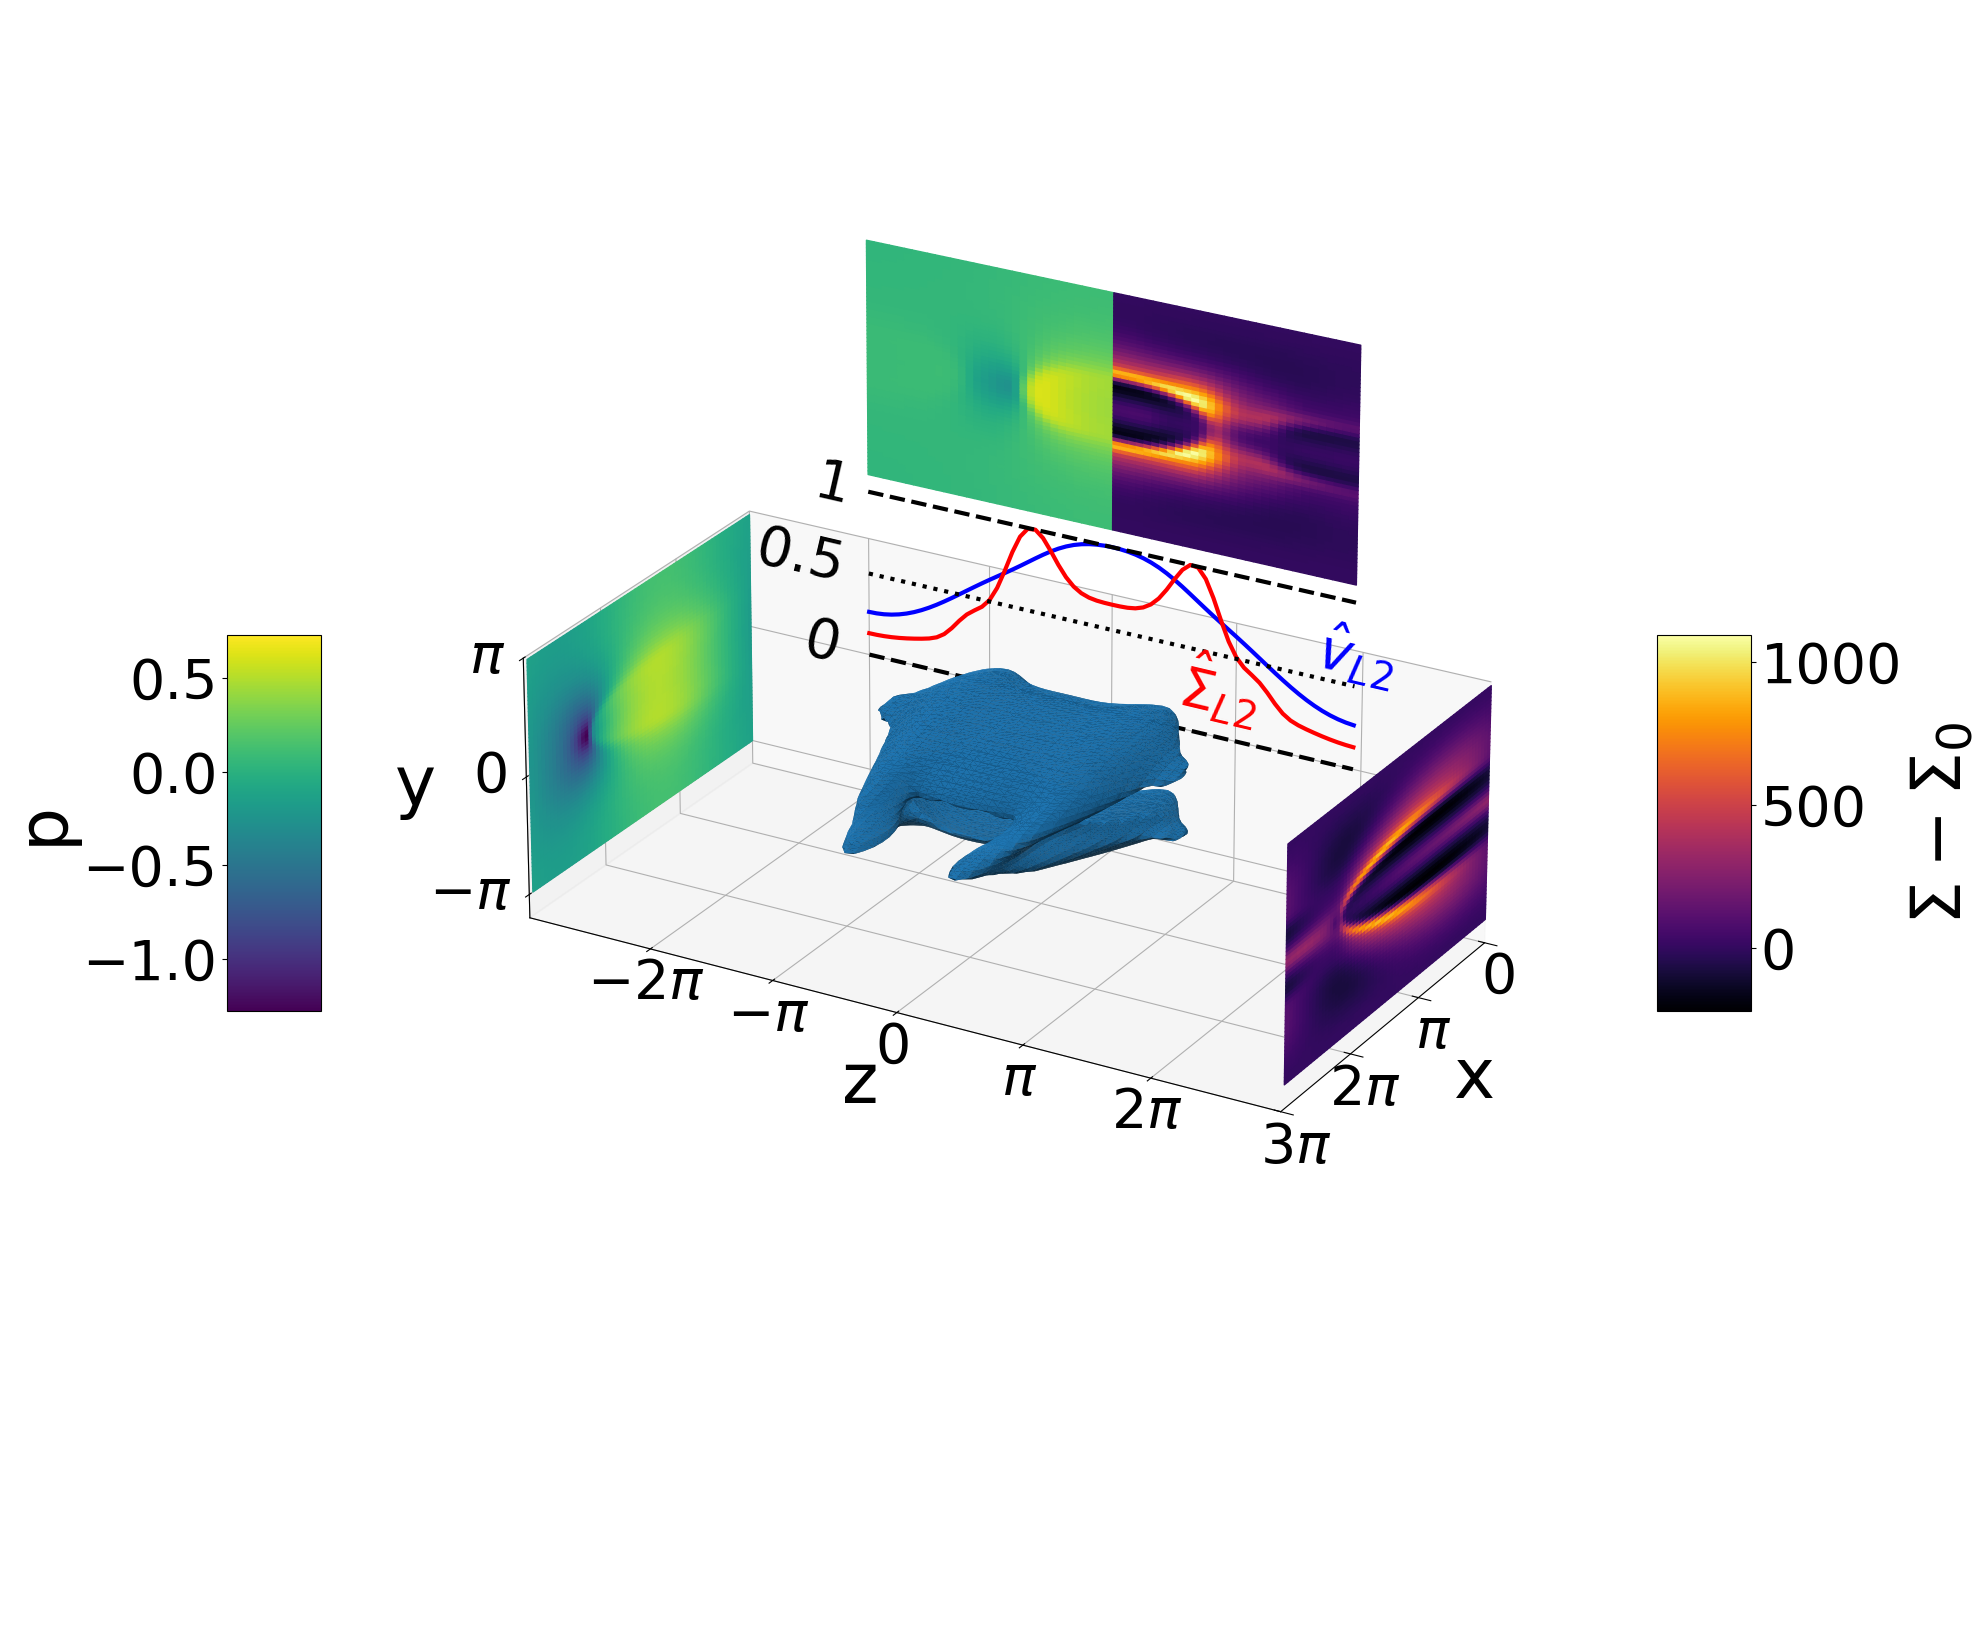

In [ ]:
plt.rcParams['font.size'] = 40

ax, verts, level_val = plot_3D_surface(trace, x, y, z, ax=None, level_mult=0.41, zorder=0.2, level_val=450)
# ax, verts, level_val = plot_3D_surface(p, x, y, z, ax=ax, level_mult=[0.9,0.1], zorder=0.2)

ax.view_init(elev=25, azim=30, roll=0)

ax.computed_zorder = False

ax.set_xlim(0, 3*np.pi)  
ax.set_ylim(-3*np.pi, 3*np.pi)  

ax.set_zlim((-1.2*np.pi, np.pi))


ax.set_box_aspect((3*np.pi, 6*np.pi, 2*np.pi), zoom=0.6)

ax.set_xticks([0, np.pi, 2*np.pi, 3*np.pi], ['0', r'$\pi$', r'$2\pi$', r'$3\pi$'], fontsize=40)
ax.set_zticks([-np.pi, 0, np.pi, ], [r'$-\pi$', '0', r'$\pi$'], fontsize=40, va='center', ha='right')
ax.set_yticks([0, 1*np.pi, 2*np.pi, -1*np.pi, -2*np.pi], ['0', r'$\pi$', r'$2\pi$', r'$-\pi$', r'$-2\pi$'], fontsize=40)
    
### Get key p, trace terms
min_p, max_p = np.min(p), np.max(p) * 0.6
min_tr, max_tr = np.min(trace), np.max(trace)

cmap_kind_p = 'viridis'
cmap_p = plt.get_cmap(cmap_kind_p)
cmap_kind_tr = 'inferno'
cmap_tr = plt.get_cmap(cmap_kind_tr)

norm_p = Normalize(vmin=min_p, vmax=max_p)
sm_p = plt.cm.ScalarMappable(cmap=cmap_kind_p, norm=norm_p)
norm_tr = Normalize(vmin=min_tr, vmax=max_tr)
sm_tr = plt.cm.ScalarMappable(cmap=cmap_kind_tr, norm=norm_tr)

### Get x-z plane

# xgrid, zgrid = np.meshgrid(x, z, sparse=False, indexing='ij')

# p_plane = p[:,:,Ny//2]
# tr_plane = trace[:,:,Ny//2]

# p_plane, xgrid_p, zgrid_p = p_plane[:,:Nz//2+1], xgrid[:, :Nz//2+1], zgrid[:,:Nz//2+1]
# facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))
# tr_plane, xgrid_tr, zgrid_tr = tr_plane[:,Nz//2:], xgrid[:, Nz//2:], zgrid[:,Nz//2:]
# facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

# ax.plot_surface(xgrid_p, zgrid_p, -1.2*np.pi * np.ones_like(xgrid_p), rstride=1, cstride=1,
#                             facecolors=facecolors_p, shade=False, zorder=0.1)
# ax.plot_surface(xgrid_tr, zgrid_tr, -1.2*np.pi * np.ones_like(xgrid_tr), rstride=1, cstride=1,
#                             facecolors=facecolors_tr, shade=False, zorder=0.1)

### Get x-y plane

xgrid, ygrid = np.meshgrid(x, y, sparse=False, indexing='ij')

p_plane = p[:,Nz//2,:]
tr_plane = trace[:,Nz//2,:]

p_plane, xgrid_p, ygrid_p = p_plane, xgrid, ygrid
facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))
tr_plane, xgrid_tr, ygrid_tr = tr_plane, xgrid, ygrid
facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

ax.plot_surface(xgrid_p, -3*np.pi * np.ones_like(xgrid_p), ygrid_p, rstride=1, cstride=1,
                            facecolors=facecolors_p, shade=False, zorder=0.1)
ax.plot_surface(xgrid_tr, 3*np.pi * np.ones_like(xgrid_tr), ygrid_tr, rstride=1, cstride=1,
                            facecolors=facecolors_tr, shade=False, zorder=0.1)


### Get y-z plane

zgrid, ygrid = np.meshgrid(z, y, sparse=False, indexing='ij')

p_plane = p[Nx//2,:,:]
tr_plane = trace[Nx//2,:,:]

p_plane, zgrid_p, ygrid_p = p_plane[:Nz//2+1,:], zgrid[:Nz//2+1,:], ygrid[:Nz//2+1,:]
facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))

tr_plane, zgrid_tr, ygrid_tr = tr_plane[Nz//2:,:], zgrid[Nz//2:,:], ygrid[Nz//2:,:]
facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

ax.plot_surface(np.zeros_like(zgrid_p), zgrid_p, ygrid_p+8, rstride=1, cstride=1,
                            facecolors=facecolors_p, shade=False, zorder=0.01)
ax.plot_surface(np.zeros_like(zgrid_tr), zgrid_tr, ygrid_tr +8, rstride=1, cstride=1,
                            facecolors=facecolors_tr, shade=False, zorder=0.01)


sm_p.set_array([])  # Necessary for ScalarMappable to work with colorbar
cbar = plt.colorbar(sm_p, ax=ax, shrink=0.2, aspect=4, location='left', pad=-0.08, ticks=[-1, -0.5, 0, 0.5])
cbar.set_label(label='p', size=50)
cbar.ax.tick_params(labelsize=40)

sm_tr.set_array([])  # Necessary for ScalarMappable to work with colorbar
cbar = plt.colorbar(sm_tr, ax=ax, shrink=0.2, aspect=4, location='right', pad=-0.08)
cbar.set_label(label=r'$\Sigma - \Sigma_0$', size=50)
cbar.ax.tick_params(labelsize=40)

### Showing max trace, u over z
color = 'red'


y_0 = 0
y_1 = np.pi * 1.4

v_metric = get_activity(v, x, y)
v_metric = v_metric / np.max(v_metric)
ax.plot(z, v_metric*(y_1-y_0) + y_0, zs=0, zdir='x', color='blue', zorder=0.01, linewidth=3)
trace_metric = get_activity(trace, x, y)
trace_metric = trace_metric / np.max(trace_metric)
ax.plot(z, trace_metric*(y_1-y_0) + y_0, zs=0, zdir='x', color='red', zorder=0.01, linewidth=3)
ax.plot(z, y_0 * np.ones_like(z), zs=0, zdir='x', color='black', linestyle='--', zorder=0.01, linewidth=3)
ax.plot(z, (y_0+y_1)/2 * np.ones_like(z), zs=0, zdir='x', color='black', linestyle=':', zorder=0.01, linewidth=3)
ax.plot(z, y_1 * np.ones_like(z), zs=0, zdir='x', color='black', linestyle='--', zorder=0.01, linewidth=3)

ax.text(0,1.6*np.pi, 2, r'$\hat v_{L2}$', 'y', color='blue', fontsize=40)
ax.text(0,0.5*np.pi, 0.1, r'$\hat \Sigma_{L2}$', 'y', color='red', fontsize=40)
ax.text(0,-2.6*np.pi, -0.2*np.pi, r'$0$','y',  color='black', fontsize=40)
ax.text(0,-2.5*np.pi, 1.2*np.pi, r'$1$', 'y', color='black', fontsize=40)
ax.text(0,-3*np.pi, 0.4*np.pi, r'$0.5$', 'y', color='black', fontsize=40)


# Drifting Arrowheads

In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy
import sys
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid

from tools.misc_tools import get_h5_data
from matplotlib.colors import Normalize, LightSource
from mpl_toolkits.mplot3d import Axes3D
from skimage.measure import marching_cubes
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from dedalus.tools import post
from cfd_tools.cartesian_systems.misc_tools import shift_reflect



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:

from tools.misc_tools import get_fpath_sim
from tools.plotter import plot_from_array
from tools.kolmogorov import TimeStepper3D
import copy 

material_params = {'W': 20, 'beta': 0.9, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
system_params = {'Lx': 3*np.pi,  'Lz': 4*np.pi, 'ndim': 3, 'n':1}
solver_params = {'Nx': 64, 'Ny': 64, 'Nz': 64}

system_params_temp = copy.deepcopy(system_params)
system_params_temp['ndim'] = 2
timestepper = TimeStepper3D(material_params=material_params, solver_params=solver_params, system_params=system_params_temp)
base_flow = timestepper.base_flow_full


fpath = get_fpath_sim(material_params, system_params, solver_params, suffix='recent-test-drift-pert-0,1-method-2', subdir='arrowhead_3D')
post.merge_process_files(fpath, cleanup=True)

data_fields, _ = get_h5_data(material_params, system_params, solver_params, suffix='recent-test-drift-pert-0,1-method-2', subdir='arrowhead_3D', s=-1)


2025-05-06 09:08:22,453 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 3.1e+01/s
2025-05-06 09:08:23,231 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 3.3e+01/s
2025-05-06 09:08:23,463 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 2.5e+01/s
2025-05-06 09:08:23,613 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 2.5e+01/s
2025-05-06 09:08:23,764 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 2.6e+01/s
2025-05-06 09:08:23,771 cfd_tools.cartesian_systems.cartesian_system_base 0/1 INFO :: Baseflow converged!...
2025-05-06 09:08:23,952 pencil 0/1 INFO :: Building pencil matrix 1/32 (~3%) Elapsed: 0s, Remaining: 1s, Rate: 3.2e+01/s
2025-05-06 09:08:24,044 pencil 0/1 INFO :: Building pencil matrix 4/32 (~12%) Elapsed: 0s, Remaining: 1s, Rate: 3.3e+01/s
2025-05-06 09:08:24,170 pencil 0/1 INF

In [ ]:
# np.mean(w)

In [ ]:
def draw_surface(array1, x, y, z, ax=None, level_mult=0.7, color='tab:blue', zorder=1, level_val=None):

    if level_val is None:
        level_val = (np.max(array1) - np.min(array1)) * level_mult + np.min(array1)

    try:
        verts, faces, _, _ = marching_cubes(array1, level=level_val, step_size=1, spacing=(x[1]-x[0], y[1]-y[0], z[1]-z[0]))
        
        verts[:, 0] += x[0]
        verts[:, 1] += y[0]
        verts[:, 2] += z[0]

        # Fancy indexing: `verts[faces]` to generate a collection of triangles
        ls = LightSource(azdeg=0.0, altdeg=-65.0)
        mesh = Poly3DCollection(verts[faces], shade=True, lightsource=ls, facecolors=color, zorder=zorder)

        ax.add_collection3d(mesh)
    except:
        pass

    return verts, level_val

def plot_3D_surface(array1, x, y, z, ax=None, level_mult=0.7, level_val=None, zorder=1):
    if not np.all(np.isclose(np.diff(x, n=2), 0)) or not np.all(np.isclose(np.diff(y, n=2), 0)) or not np.all(np.isclose(np.diff(z, n=2), 0)):
        raise Exception("Grids not equally spaced. Marching Cube Algorithm will be weird...")
    x, y, z = x, z, y

    if ax is None:
        fig = plt.figure(figsize=(20, 20))
        ax = fig.add_subplot(111, projection='3d')
        ax.set_xlabel("x", labelpad=50, fontsize=50)
        ax.set_ylabel("z", labelpad=80, fontsize=50)
        ax.set_zlabel("y",labelpad=50, fontsize=50)

        ax.view_init(elev=30, azim=25, roll=0)

    if isinstance(level_mult, float) or level_mult is None: 
        verts, level_val = draw_surface(array1, x, y, z, ax, level_mult, 'tab:blue', zorder, level_val)
    elif isinstance(level_mult, list):
        verts, level_val = draw_surface(array1, x, y, z, ax, level_mult[0], 'tab:red', zorder)
        verts, level_val = draw_surface(array1, x, y, z, ax, level_mult[1], 'tab:red', zorder)

    plt.tight_layout()

    return ax, verts, level_val

def get_activity(field, x, y):
    field_2  = np.array(field) ** 2 
    field_2_x = trapezoid(field_2, x, axis=0) / (3*np.pi)
    field_2_xy = trapezoid(field_2_x, y, axis=-1) / (2*np.pi)
    field_xy = field_2_xy ** 0.5
    return field_xy

In [ ]:
x, y, z = data_fields['x'], data_fields['y'], data_fields['z']
Nx, Ny, Nz = solver_params['Nx'], solver_params['Ny'], solver_params['Nz']
Lz = system_params['Lz']

p = data_fields['p'][-1,:,:,:]
c22 = data_fields['c22'][-1,:,:,:]
c11 = data_fields['c11'][-1,:,:,:]
u = data_fields['u'][-1,:,:,:]
v = data_fields['v'][-1,:,:,:]
w = data_fields['w'][-1,:,:,:]
c33 = data_fields['c33'][-1,:,:,:]
tr = c11 + c22 + c33

Tr = base_flow['c11'] + base_flow['c22'] + base_flow['c33']
U = base_flow['u']

mean_c22_y = np.mean(c22, axis=(0,1))

Ny = mean_c22_y.shape[0]
if mean_c22_y[0] > mean_c22_y[Ny//2]:
    u = shift_reflect(u, parity='odd')
    v = shift_reflect(v, parity='even')
    w = shift_reflect(w, parity='even')
    p = shift_reflect(p, parity='even')
    c22 = shift_reflect(c22, parity='even')
    c33 = shift_reflect(c33, parity='even')
    c11 = shift_reflect(c11, parity='even')

roll_x = -20
u = np.roll(u, axis=0, shift=roll_x)
v = np.roll(v, axis=0, shift=roll_x)
w = np.roll(w, axis=0, shift=roll_x)
p = np.roll(p, axis=0, shift=roll_x)
c22 = np.roll(c22, axis=0, shift=roll_x)
c33 = np.roll(c33, axis=0, shift=roll_x)
c11 = np.roll(c11, axis=0, shift=roll_x)


roll_z = 30
u = np.roll(u, axis=1, shift=roll_z)
v = np.roll(v, axis=1, shift=roll_z)
w = np.roll(w, axis=1, shift=roll_z)
p = np.roll(p, axis=1, shift=roll_z)
c22 = np.roll(c22, axis=1, shift=roll_z)
c33 = np.roll(c33, axis=1, shift=roll_z)
c11 = np.roll(c11, axis=1, shift=roll_z)

p = p - base_flow['p'][:, None, :]
u = u - base_flow['u'][:, None, :]
w = w - base_flow['w'][:, None, :]
c22 = c22  - base_flow['c22'][:, None, :]
c11 = c11  - base_flow['c11'][:, None, :]
c33 = c33  - base_flow['c33'][:, None, :]
trace = c11 + c22 + c33

# trace = np.concatenate((trace,trace), axis=1)
# p = np.concatenate((p,p), axis=1)
# u = np.concatenate((u,u), axis=1)

# z = np.concatenate((z - Lz/2, z + Lz/2 ))
# Nz *= 2



In [ ]:
# plt.rcParams['font.size'] = 40

# ax, verts, level_val = plot_3D_surface(trace, x, y, z, ax=None, level_mult=0.41, zorder=0.2, level_val=450)
# # ax, verts, level_val = plot_3D_surface(p, x, y, z, ax=ax, level_mult=[0.9,0.1], zorder=0.2)

# ax.view_init(elev=25, azim=30, roll=0)

# ax.computed_zorder = False

# ax.set_xlim(0, 3.1*np.pi)  
# ax.set_ylim(-3*np.pi, 3*np.pi)  

# ax.set_zlim((-1.2*np.pi, np.pi))


# ax.set_box_aspect((3*np.pi, 6*np.pi, 2*np.pi), zoom=0.6)

# ax.set_xticks([0, np.pi, 2*np.pi, 3*np.pi], ['0', r'$\pi$', r'$2\pi$', r'$3\pi$'], fontsize=40, va='center', ha='left')
# ax.set_zticks([-np.pi, 0, np.pi, ], [r'$-\pi$', '0', r'$\pi$'], fontsize=40, va='center', ha='right')
# ax.set_yticks([0, 2*np.pi, -2*np.pi], ['0', r'$2\pi$',r'$-2\pi$'], fontsize=40)
    
# # ax.tick_params(axis='x', pad=5)
# # ax.tick_params(axis='y', pad=5)
# # ax.tick_params(axis='z', pad=5)

# ### Get key p, trace terms
# min_p, max_p = np.min(p), np.max(p) * 0.6
# min_tr, max_tr = np.min(trace), np.max(trace)

# cmap_kind_p = 'viridis'
# cmap_p = plt.get_cmap(cmap_kind_p)
# cmap_kind_tr = 'inferno'
# cmap_tr = plt.get_cmap(cmap_kind_tr)

# norm_p = Normalize(vmin=min_p, vmax=max_p)
# sm_p = plt.cm.ScalarMappable(cmap=cmap_kind_p, norm=norm_p)
# norm_tr = Normalize(vmin=min_tr, vmax=max_tr)
# sm_tr = plt.cm.ScalarMappable(cmap=cmap_kind_tr, norm=norm_tr)

# ### Get x-z plane

# xgrid, zgrid = np.meshgrid(x, z, sparse=False, indexing='ij')

# p_plane = p[:,:,Ny//2]
# tr_plane = trace[:,:,Ny//2]

# p_plane, xgrid_p, zgrid_p = p_plane, xgrid, zgrid
# facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))
# tr_plane, xgrid_tr, zgrid_tr = tr_plane, xgrid, zgrid
# facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

# ax.plot_surface(xgrid_p, zgrid_p, -1.2*np.pi * np.ones_like(xgrid_p), rstride=1, cstride=1,
#                             facecolors=facecolors_p, shade=False, zorder=0.1)
# # ax.plot_surface(xgrid_tr, zgrid_tr, -1.2*np.pi * np.ones_like(xgrid_tr), rstride=1, cstride=1,
# #                             facecolors=facecolors_tr, shade=False, zorder=0.1)

# ### Get x-y plane

# xgrid, ygrid = np.meshgrid(x, y, sparse=False, indexing='ij')

# p_plane = p[:,Nz//2,:]
# tr_plane = trace[:,Nz//2,:]

# p_plane, xgrid_p, ygrid_p = p_plane, xgrid, ygrid
# facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))
# tr_plane, xgrid_tr, ygrid_tr = tr_plane, xgrid, ygrid
# facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

# ax.plot_surface(xgrid_p, -3*np.pi * np.ones_like(xgrid_p), ygrid_p, rstride=1, cstride=1,
#                             facecolors=facecolors_p, shade=False, zorder=0.1)
# # ax.plot_surface(xgrid_tr, 4*np.pi * np.ones_like(xgrid_tr), ygrid_tr, rstride=1, cstride=1,
# #                             facecolors=facecolors_tr, shade=False, zorder=0.1)


# ### Get y-z plane

# zgrid, ygrid = np.meshgrid(z, y, sparse=False, indexing='ij')

# p_plane = p[Nx//2,:,:]
# # tr_plane = trace[Nx//2,:,:]

# p_plane, zgrid_p, ygrid_p = p_plane, zgrid, ygrid
# facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))

# # tr_plane, zgrid_tr, ygrid_tr = tr_plane, zgrid, ygrid
# # facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

# ax.plot_surface(np.zeros_like(zgrid_p), zgrid_p, ygrid_p+8, rstride=1, cstride=1,
#                             facecolors=facecolors_p, shade=False, zorder=0.01)
# # ax.plot_surface(np.zeros_like(zgrid_tr), zgrid_tr, ygrid_tr + 8, rstride=1, cstride=1,
# #                             facecolors=facecolors_tr, shade=False, zorder=0.01)


# sm_p.set_array([])  # Necessary for ScalarMappable to work with colorbar
# cbar = plt.colorbar(sm_p, ax=ax, shrink=0.2, aspect=4, location='left', pad=-0.08, ticks=[-1, -0.5, 0, 0.5])
# cbar.set_label(label='p', size=50)
# cbar.ax.tick_params(labelsize=40)

# # sm_tr.set_array([])  # Necessary for ScalarMappable to work with colorbar
# # cbar = plt.colorbar(sm_tr, ax=ax, shrink=0.2, aspect=4, location='right', pad=-0.08, ticks=[-300, 0, 300, 600, 900])
# # cbar.set_label(label=r'$\Sigma - \Sigma_0$', size=50)
# # cbar.ax.tick_params(labelsize=40)

# ### Showing max trace, u over z
# color = 'red'


# y_0 = 0
# y_1 = np.pi * 1.4
# u_metric = get_activity(u, x, y)
# u_metric = u_metric / np.max(u_metric)
# ax.plot(z, u_metric*(y_1-y_0) + y_0, zs=0, zdir='x', color='blue', zorder=0.01, linewidth=3)
# trace_metric = get_activity(trace, x, y)
# trace_metric = trace_metric / np.max(trace_metric)
# ax.plot(z, trace_metric*(y_1-y_0) + y_0, zs=0, zdir='x', color='red', zorder=0.01, linewidth=3)
# ax.plot(z, y_0 * np.ones_like(z), zs=0, zdir='x', color='black', linestyle='--', zorder=0.01, linewidth=3)
# ax.plot(z, (y_1+y_0)/2 * np.ones_like(z), zs=0, zdir='x', color='black', linestyle=':', zorder=0.01, linewidth=3)
# ax.plot(z, y_1 * np.ones_like(z), zs=0, zdir='x', color='black', linestyle='--', zorder=0.01, linewidth=3)

# ax.text(0,1.05*np.pi, 2.5, r'$\hat u_{L2}$', 'y', color='blue', fontsize=38)
# ax.text(0, 0.2*np.pi, 0, r'$\hat \Sigma_{L2}$', 'y', color='red', fontsize=38)
# ax.text(0,-2.4*np.pi, -0.2 *np.pi, r'$0$','y',  color='black', fontsize=40)
# ax.text(0,-2.4*np.pi, 1.2*np.pi, r'$1$', 'y', color='black', fontsize=40)
# ax.text(0,-2.8*np.pi, 0.4*np.pi, r'$0.5$', 'y', color='black', fontsize=40)


Text(0, -8.79645943005142, '$0.5$')

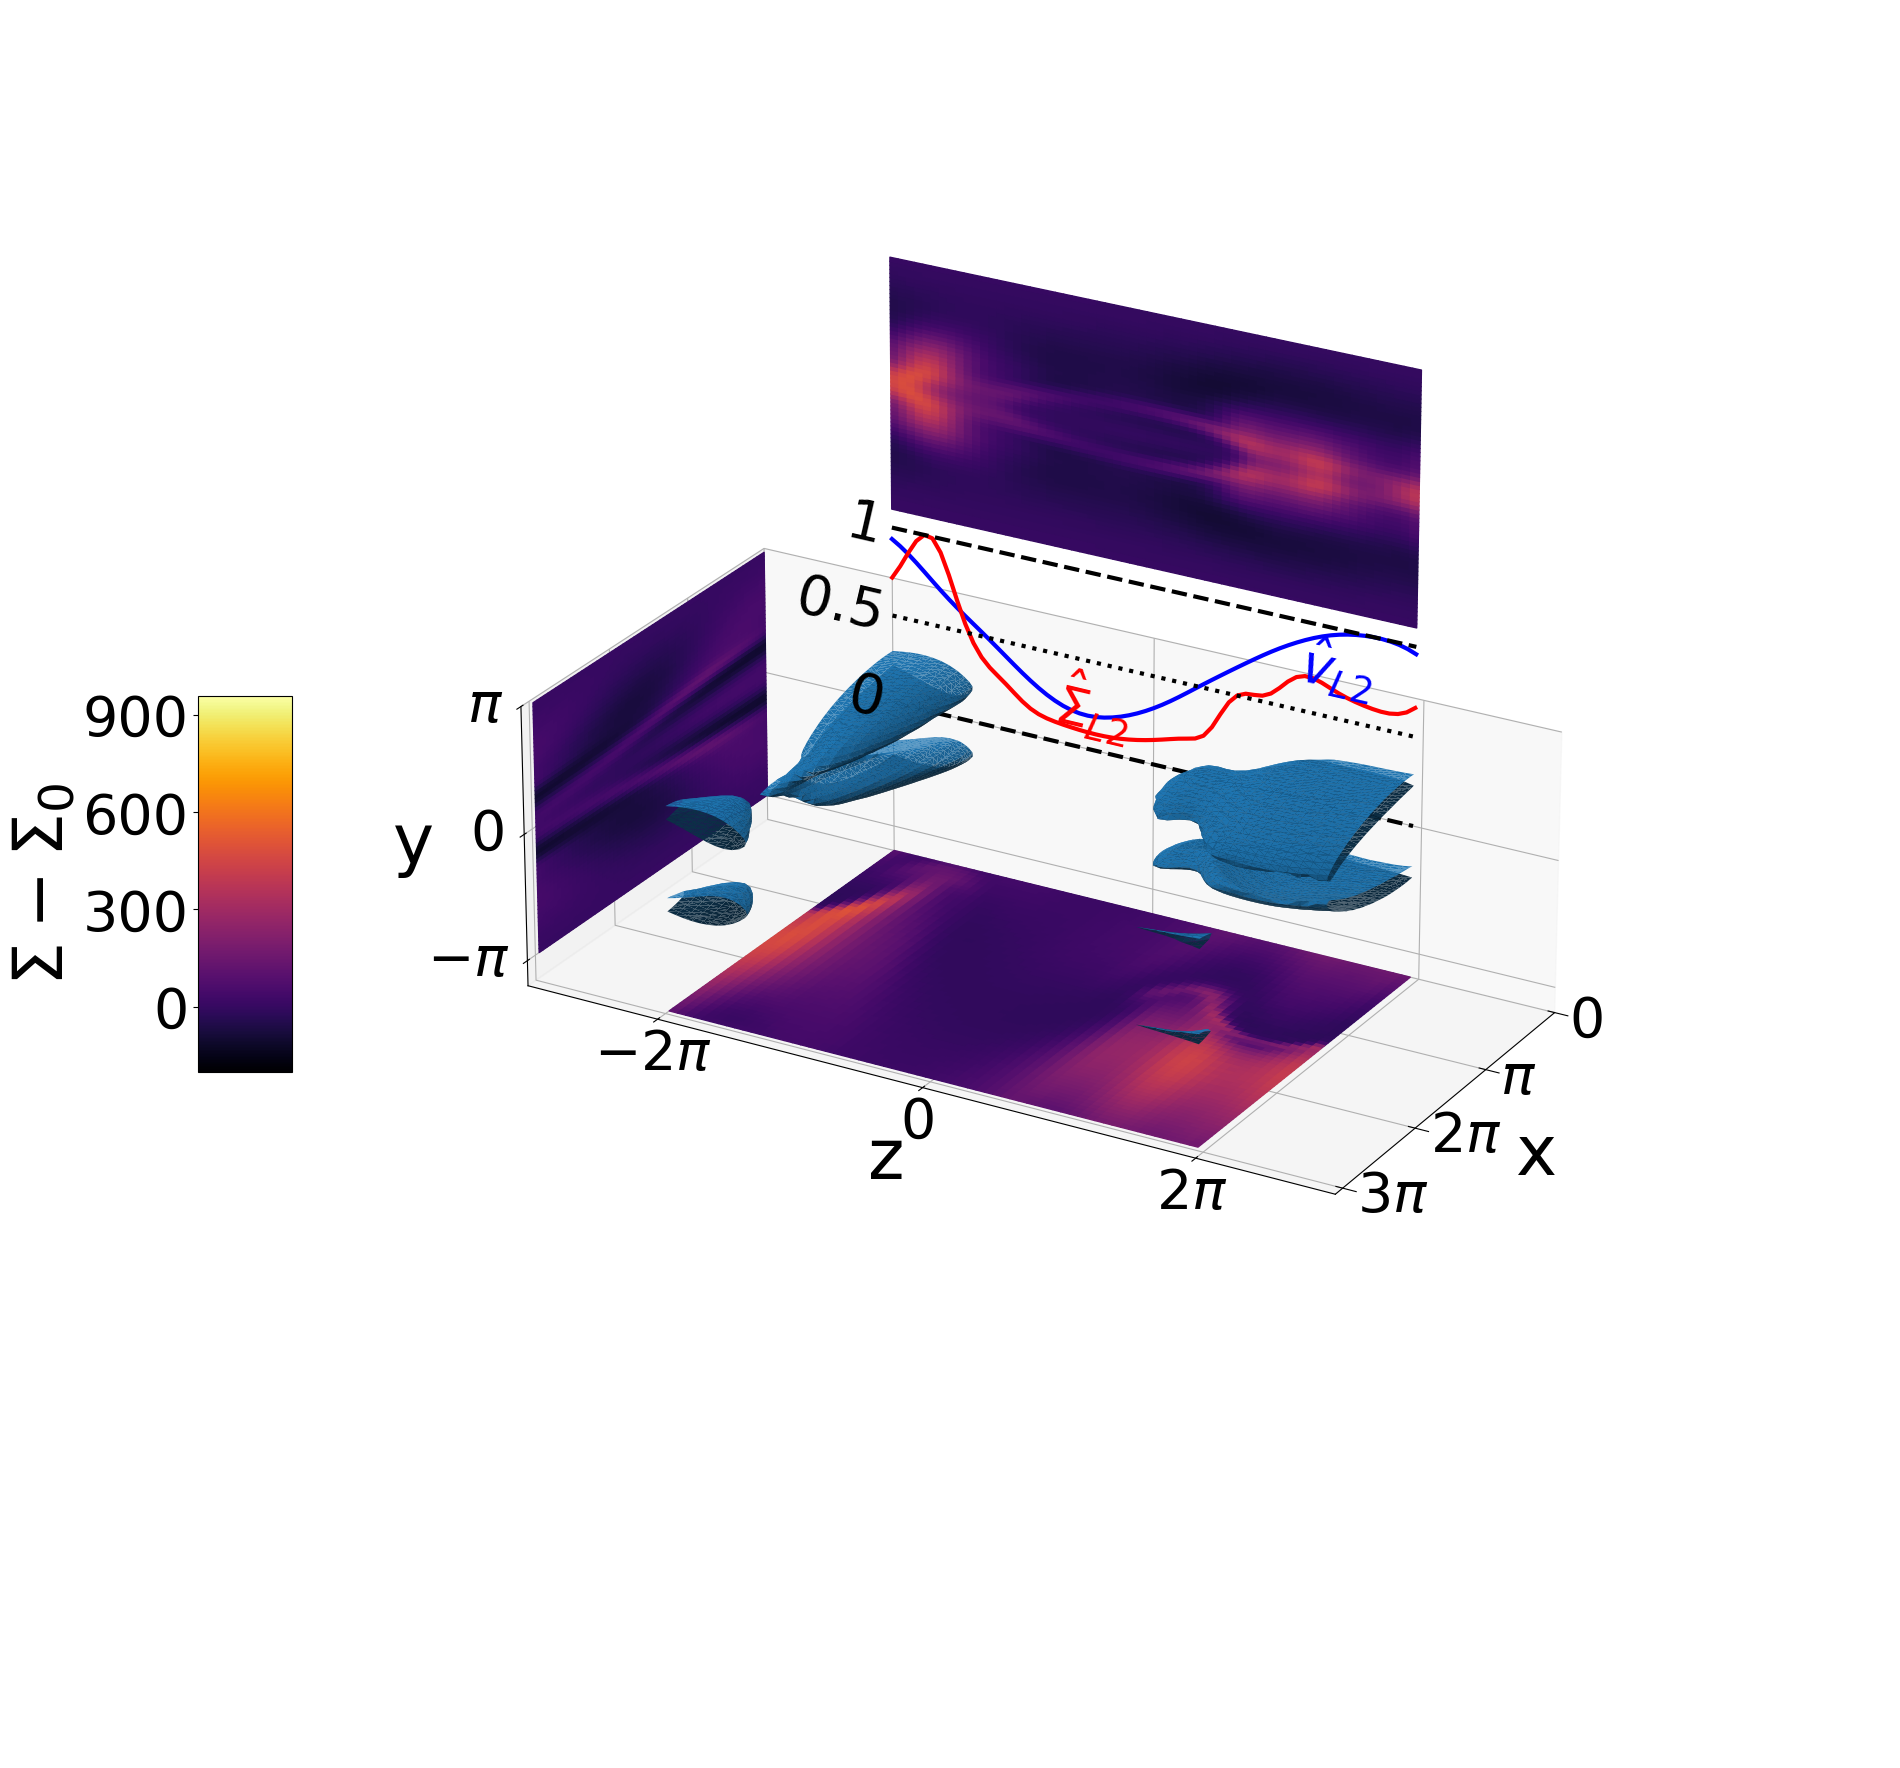

In [ ]:
plt.rcParams['font.size'] = 40

ax, verts, level_val = plot_3D_surface(trace, x, y, z, ax=None, level_mult=0.41, zorder=0.2, level_val=450)
# ax, verts, level_val = plot_3D_surface(p, x, y, z, ax=ax, level_mult=[0.9,0.1], zorder=0.2)

ax.view_init(elev=25, azim=30, roll=0)

ax.computed_zorder = False

ax.set_xlim(0, 3.1*np.pi)  
ax.set_ylim(-3*np.pi, 3*np.pi)  

ax.set_zlim((-1.2*np.pi, np.pi))


ax.set_box_aspect((3*np.pi, 6*np.pi, 2*np.pi), zoom=0.6)

ax.set_xticks([0, np.pi, 2*np.pi, 3*np.pi], ['0', r'$\pi$', r'$2\pi$', r'$3\pi$'], fontsize=40, va='center', ha='left')
ax.set_zticks([-np.pi, 0, np.pi, ], [r'$-\pi$', '0', r'$\pi$'], fontsize=40, va='center', ha='right')
ax.set_yticks([0, 2*np.pi, -2*np.pi], ['0', r'$2\pi$',r'$-2\pi$'], fontsize=40)
    
# ax.tick_params(axis='x', pad=5)
# ax.tick_params(axis='y', pad=5)
# ax.tick_params(axis='z', pad=5)

### Get key p, trace terms
min_p, max_p = np.min(p), np.max(p) * 0.6
min_tr, max_tr = np.min(trace), np.max(trace)

cmap_kind_p = 'viridis'
cmap_p = plt.get_cmap(cmap_kind_p)
cmap_kind_tr = 'inferno'
cmap_tr = plt.get_cmap(cmap_kind_tr)

norm_p = Normalize(vmin=min_p, vmax=max_p)
sm_p = plt.cm.ScalarMappable(cmap=cmap_kind_p, norm=norm_p)
norm_tr = Normalize(vmin=min_tr, vmax=max_tr)
sm_tr = plt.cm.ScalarMappable(cmap=cmap_kind_tr, norm=norm_tr)

### Get x-z plane

xgrid, zgrid = np.meshgrid(x, z, sparse=False, indexing='ij')

p_plane = p[:,:,Ny//2]
tr_plane = trace[:,:,Ny//2]

p_plane, xgrid_p, zgrid_p = p_plane, xgrid, zgrid
facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))
tr_plane, xgrid_tr, zgrid_tr = tr_plane, xgrid, zgrid
facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

# ax.plot_surface(xgrid_p, zgrid_p, -1.2*np.pi * np.ones_like(xgrid_p), rstride=1, cstride=1,
                            # facecolors=facecolors_p, shade=False, zorder=0.1)
ax.plot_surface(xgrid_tr, zgrid_tr, -1.2*np.pi * np.ones_like(xgrid_tr), rstride=1, cstride=1,
                            facecolors=facecolors_tr, shade=False, zorder=0.1)

### Get x-y plane

xgrid, ygrid = np.meshgrid(x, y, sparse=False, indexing='ij')

p_plane = p[:,Nz//2,:]
tr_plane = trace[:,Nz//2,:]

p_plane, xgrid_p, ygrid_p = p_plane, xgrid, ygrid
facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))
tr_plane, xgrid_tr, ygrid_tr = tr_plane, xgrid, ygrid
facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

# ax.plot_surface(xgrid_p, -3*np.pi * np.ones_like(xgrid_p), ygrid_p, rstride=1, cstride=1,
                            # facecolors=facecolors_p, shade=False, zorder=0.1)
ax.plot_surface(xgrid_tr, -3*np.pi * np.ones_like(xgrid_tr), ygrid_tr, rstride=1, cstride=1,
                            facecolors=facecolors_tr, shade=False, zorder=0.1)


### Get y-z plane

zgrid, ygrid = np.meshgrid(z, y, sparse=False, indexing='ij')

# p_plane = p[Nx//2,:,:]
tr_plane = trace[Nx//2,:,:]

# p_plane, zgrid_p, ygrid_p = p_plane, zgrid, ygrid
# facecolors_p = cmap_p((p_plane - min_p) / (max_p - min_p))

tr_plane, zgrid_tr, ygrid_tr = tr_plane, zgrid, ygrid
facecolors_tr = cmap_tr((tr_plane - min_tr) / (max_tr - min_tr))

# ax.plot_surface(np.zeros_like(zgrid_p), zgrid_p, ygrid_p+8, rstride=1, cstride=1,
                            # facecolors=facecolors_p, shade=False, zorder=0.01)
ax.plot_surface(np.zeros_like(zgrid_tr), zgrid_tr, ygrid_tr + 8, rstride=1, cstride=1,
                            facecolors=facecolors_tr, shade=False, zorder=0.01)


# sm_p.set_array([])  # Necessary for ScalarMappable to work with colorbar
# cbar = plt.colorbar(sm_p, ax=ax, shrink=0.2, aspect=4, location='left', pad=-0.08, ticks=[-1, -0.5, 0, 0.5])
# cbar.set_label(label='p', size=50)
# cbar.ax.tick_params(labelsize=40)

sm_tr.set_array([])  # Necessary for ScalarMappable to work with colorbar
cbar = plt.colorbar(sm_tr, ax=ax, shrink=0.2, aspect=4, location='left', pad=-0.08, ticks=[-300, 0, 300, 600, 900])
cbar.set_label(label=r'$\Sigma - \Sigma_0$', size=50)
cbar.ax.tick_params(labelsize=40)

### Showing max trace, u over z
color = 'red'


y_0 = 0
y_1 = np.pi * 1.4
v_metric = get_activity(v, x, y)
v_metric = v_metric / np.max(v_metric)
ax.plot(z, v_metric*(y_1-y_0) + y_0, zs=0, zdir='x', color='blue', zorder=0.01, linewidth=3)
trace_metric = get_activity(trace, x, y)
trace_metric = trace_metric / np.max(trace_metric)
ax.plot(z, trace_metric*(y_1-y_0) + y_0, zs=0, zdir='x', color='red', zorder=0.01, linewidth=3)
ax.plot(z, y_0 * np.ones_like(z), zs=0, zdir='x', color='black', linestyle='--', zorder=0.01, linewidth=3)
ax.plot(z, (y_1+y_0)/2 * np.ones_like(z), zs=0, zdir='x', color='black', linestyle=':', zorder=0.01, linewidth=3)
ax.plot(z, y_1 * np.ones_like(z), zs=0, zdir='x', color='black', linestyle='--', zorder=0.01, linewidth=3)

ax.text(0,1.05*np.pi, 2.5, r'$\hat v_{L2}$', 'y', color='blue', fontsize=38)
ax.text(0, -0.8*np.pi, 0, r'$\hat \Sigma_{L2}$', 'y', color='red', fontsize=38)
ax.text(0,-2.4*np.pi, -0.2 *np.pi, r'$0$','y',  color='black', fontsize=40)
ax.text(0,-2.4*np.pi, 1.2*np.pi, r'$1$', 'y', color='black', fontsize=40)
ax.text(0,-2.8*np.pi, 0.4*np.pi, r'$0.5$', 'y', color='black', fontsize=40)


In [ ]:
np.mean(u)


0.007952859062761547

In [ ]:
from tools.misc_tools import get_metric_from_params

def get_metric_at_Lz_Nz_W(Lz, Nz, W, metric_plot, Lz_plot, suffix_end='localised', type='trace'):
    material_params = {'W': W, 'beta': 0.9, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
    solver_params = {'Nx': 64, 'Ny': 64, 'Nz': Nz}
    system_params = {'Lx': 3*np.pi, 'ndim': 3, 'n': 1, 'Lz': Lz}

    t_all, metric_all = get_metric_from_params(material_params, system_params, solver_params, suffix=f'recent-{suffix_end}', subdir='arrowhead_3D', metric=type, deviation=True, merge=True)
    metric_plot.append(metric_all[-1])
    Lz_plot.append(Lz)
    return metric_plot, Lz_plot

import copy
from tools.kolmogorov import TimeStepper3D
from tools.misc_tools import get_h5_data, get_fpath_sim
from dedalus.tools import post

def plot_state_Lz_Nz_W(base_flow, Lz, Nz, W, suffix_end='localised', shift_z=True, tile=False, log_scale=False, **kwargs):
    material_params = {'W': W, 'beta': 0.9, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
    solver_params = {'Nx': 64, 'Ny': 64, 'Nz': Nz}
    system_params = {'Lx': 3*np.pi, 'ndim': 3, 'n': 1, 'Lz': Lz}

    fpath = get_fpath_sim(material_params, system_params, solver_params, suffix=f'recent-{suffix_end}', subdir='arrowhead_3D')
    post.merge_process_files(fpath, cleanup=True)
    data_fields, _ = get_h5_data(material_params, system_params, solver_params, suffix=f'recent-{suffix_end}', subdir='arrowhead_3D', s=-1)

    x, y, z = data_fields['x'], data_fields['y'], data_fields['z']
    c11 = data_fields['c11'][-1,:,:,:] - base_flow['c11'][[0], None, :]
    c22 = data_fields['c22'][-1,:,:,:] - base_flow['c22'][[0], None, :]
    c33 = data_fields['c33'][-1,:,:,:] - base_flow['c33'][[0], None, :]
    trace_dev = c11 + c22 + c33
    activity = get_activity(trace_dev, x, y)


    if shift_z:
        star_idx = np.argmax(activity)
        activity = np.roll(activity, shift=Nz//2-star_idx+shift_z)
        
    if tile:
        z, activity = tile_activity(z, activity, Lz, tile_num=tile)
        z = np.concatenate((z, [z[0] + tile*Lz]))

        activity = np.concatenate((activity, [activity[0]]))
    else:
        z = np.concatenate((z, [z[0] + Lz]))
        activity = np.concatenate((activity, [activity[0]]))


    plt.plot(z, activity, **kwargs)

    if log_scale: plt.yscale('log')

def get_activity(field, x, y):
    field_2  = np.array(field) ** 2 
    field_2_x = trapezoid(field_2, x, axis=-3) / (3*np.pi)
    field_2_xy = trapezoid(field_2_x, y, axis=-1) / (2*np.pi)
    field_xy = field_2_xy ** 0.5
    return field_xy

def get_base_flow(W):
    material_params = {'W': W, 'beta': 0.9, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
    solver_params = {'Nx': 64, 'Ny': 64}
    system_params = {'Lx': 3*np.pi, 'ndim': 2, 'n': 1}

    timestepper = TimeStepper3D(material_params=material_params, solver_params=solver_params, system_params=system_params)
    base_flow = timestepper.base_flow_full
    return base_flow

def tile_activity(z, activity, Lz, tile_num=2):
    Nz = z.shape[0]

    if tile_num == 2:
        z_tiled = np.concatenate((z - Lz, z, z + Lz))[Nz//2: -Nz//2]
    elif tile_num == 4:
        z_tiled = np.concatenate((z - 2 * Lz, z - Lz , z, z + Lz, z+2*Lz))[Nz//2: -Nz//2]
    else:
        raise Exception
    
    activity_tiled = np.concatenate([activity]*tile_num)
    
    activity_tiled = np.roll(activity_tiled, shift=Nz//2)
    return z_tiled, activity_tiled

In [ ]:
metric = 'trace'

perts = [0.01, 0.02, 0.03]

metric_plot, Lz_plot = [], []


metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(4*np.pi, 64, 20, metric_plot, Lz_plot, suffix_end=f'localised', type=metric)
for pert in perts:
    print(pert)
    metric_plot, Lz_plot = get_metric_at_Lz_Nz_W(4*np.pi, 64, 20, metric_plot, Lz_plot, suffix_end=f'test-drift-pert-{pert}-method-2', type=metric)

perts = np.concatenate(([0], perts))
plt.plot(perts, metric_plot, color='black', linewidth=3)
plt.scatter(perts, metric_plot, color='black', linewidth=3)

# plt.scatter(perts[-1], metric_plot[-1], color='black', marker='x', linewidth=3, s=300, zorder=10)
plt.scatter(perts[0], metric_plot[0], color='black', marker='x', linewidth=5, s=600, zorder=10)
perts2 = [0.04, 0.06, 0.08, 0.1, 0.15]


metric_plot2, Lz_plot2 = [], []


for pert in perts2:
    print(pert)
    metric_plot2, Lz_plot2 = get_metric_at_Lz_Nz_W(4*np.pi, 64, 20, metric_plot2, Lz_plot2, suffix_end=f'test-drift-pert-{pert}-method-2', type=metric)

plt.plot(perts2, metric_plot2, color='black', linewidth=3)
plt.scatter(perts2, metric_plot2, color='black', linewidth=3)

plt.scatter(perts2[-2], metric_plot2[-2], color='black', marker='x', linewidth=5,s=600, zorder=10)

plt.plot([perts[-1], perts2[0]], [metric_plot[-1], metric_plot2[0]], color='black', linestyle=':' ,linewidth=2)

plt.xlabel('A', fontsize=60)
plt.ylabel(r'$(\bar\Sigma-\bar\Sigma_0)/\bar\Sigma_0$', fontsize=60)
plt.xticks([0,0.1, 0.15],[0,0.1, 0.15], fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=40)
# plt.xlim(0, 8.1*np.pi)
plt.ylim(0.15, 0.2)




NameError: name 'get_metric_at_Lz_Nz_W' is not defined

(-0.03, 0.24)

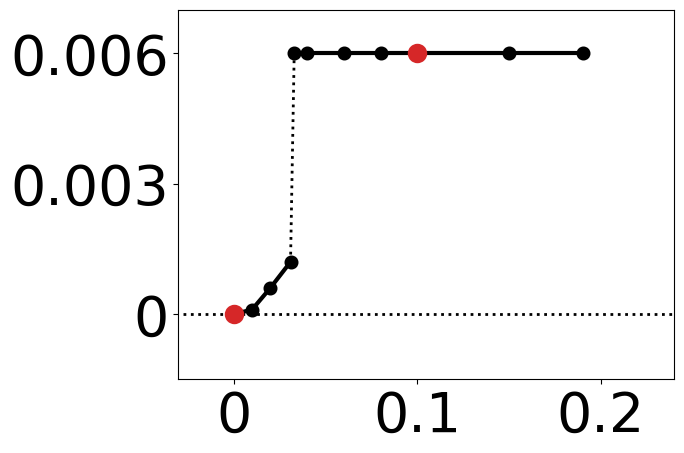

In [ ]:
import matplotlib.pyplot as plt

perts_cz = [
    (0, 0),
    (0.01, 1e-4),
    (0.02, 6e-4),
    # (0.03, 1.1e-3),
    (0.031,1.2e-3),
    # (0.032,1.4e-3),
    (0.033,6.0e-3),
    # (0.035,6.0e-3),
    (0.04, 6.0e-3),
    (0.06, 6.0e-3),
    (0.08, 6.0e-3),
    (0.1, 6.0e-3),
    (0.15,6.0e-3),
    (0.19,6.0e-3),
]

perts, czs = [], []

for pert_cz in perts_cz:
    pert, cz = pert_cz
    perts.append(pert)
    czs.append(cz)

perts = np.array(perts)
czs = np.array(czs)


perts1 = [pert for pert in perts if pert != 0 and pert != 0.1]
czs1 = [cz for i, cz in enumerate(czs) if perts[i] != 0 and perts[i] != 0.1]

plt.scatter(perts1, czs1, color='black', marker='o', s=50, linewidth=3)
# plt.scatter(perts, czs, color='black', linewidth=3)

plt.scatter(perts[0], czs[0], color='tab:red', marker='o', linewidth=4,s=100, zorder=10)

idx = np.where(perts == 0.1)[0][0]
plt.scatter(perts[idx], czs[idx], color='tab:red', marker='o', linewidth=4,s=100, zorder=10)

break_idx = np.where(czs > 0.005)[0][0]
plt.plot(perts[:break_idx], czs[:break_idx], color='black', linestyle='-' ,linewidth=3)
plt.plot(perts[break_idx:], czs[break_idx:], color='black', linestyle='-' ,linewidth=3)

plt.plot([perts[break_idx-1], perts[break_idx]], [czs[break_idx-1], czs[break_idx]], color='black', linestyle=':' ,linewidth=2)

plt.hlines(y=0, xmin=-1, xmax=0.3, color='black', linestyle=':' ,linewidth=2)

# plt.xlabel('A', fontsize=60)
# plt.ylabel(r'$c_z$', fontsize=60, labelpad=10)
plt.xticks([0, 0.1, 0.2],[0, 0.1, 0.2], fontsize=60)
plt.yticks([0, 0.003, 0.006],[0,0.003,0.006], fontsize=60)
plt.tick_params(axis='both', which='major', labelsize=40)

plt.ylim(-0.0015, 0.007)
plt.xlim(-0.03, 0.24)
# plt.yscale('log')



In [ ]:
material_params = {'W': 20, 'beta': 0.9, 'Re': 0.5, 'L':np.inf, 'eps': 1e-3}
solver_params = {'Nx': 64, 'Ny': 64}
system_params = {'Lx': 3*np.pi, 'ndim': 2, 'n': 1}

timestepper = TimeStepper3D(material_params=material_params, solver_params=solver_params, system_params=system_params)
base_flow_20 = timestepper.base_flow_full

2025-05-02 13:08:50,713 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 3.0e+01/s
2025-05-02 13:08:51,633 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 3.1e+01/s
2025-05-02 13:08:51,851 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 2.4e+01/s
2025-05-02 13:08:52,010 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 2.4e+01/s
2025-05-02 13:08:52,181 pencil 0/1 INFO :: Building pencil matrix 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 2.1e+01/s
2025-05-02 13:08:52,189 cfd_tools.cartesian_systems.cartesian_system_base 0/1 INFO :: Baseflow converged!...
2025-05-02 13:08:52,400 pencil 0/1 INFO :: Building pencil matrix 1/32 (~3%) Elapsed: 0s, Remaining: 1s, Rate: 2.9e+01/s
2025-05-02 13:08:52,498 pencil 0/1 INFO :: Building pencil matrix 4/32 (~12%) Elapsed: 0s, Remaining: 1s, Rate: 3.0e+01/s
2025-05-02 13:08:52,625 pencil 0/1 INF

2025-05-02 13:08:53,534 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_12,566_ndim_3_N_64-64-64_recent-test-drift-pert-0,035-method-2/
2025-05-02 13:08:53,591 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_12,566_ndim_3_N_64-64-64_recent-test-drift-pert-0,1-method-2/
2025-05-02 13:08:53,620 post 0/1 INFO :: Merging files from /cephfs/home/tal43/../../../../cephfs/store/fluids-rrk26/tal43/vKolmogorov3D/simulations/arrowhead_3D/sim_W_20_Re_0,5_beta_0,9_eps_0,001_L_inf_Lx_9,4248_Lz_12,566_ndim_3_N_64-64-64_recent-localised/


([<matplotlib.axis.XTick at 0x7f484aec6900>,
 [Text(0.0, 0, '0'),
  Text(3.141592653589793, 0, '$\\pi$'),
  Text(6.283185307179586, 0, '$2\\pi$'),
  Text(-3.141592653589793, 0, '$-\\pi$'),
  Text(-6.283185307179586, 0, '$-2\\pi$')])

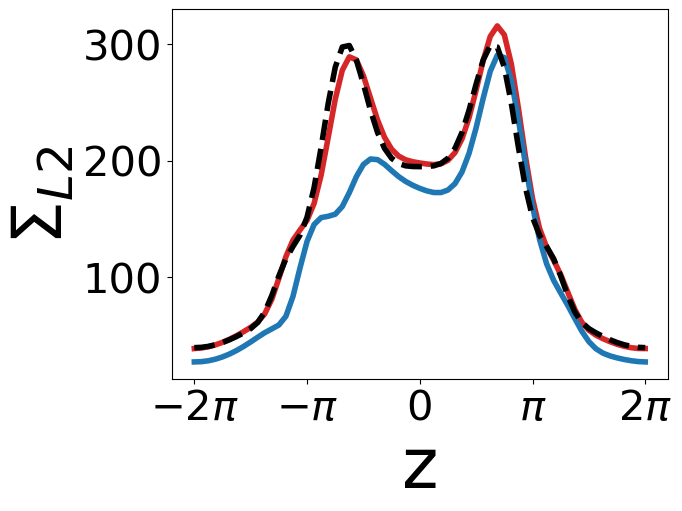

In [ ]:

metric_plot, Lz_plot = [], []

plot_state_Lz_Nz_W(base_flow_20, Lz=4*np.pi, Nz=64, W=20, suffix_end=f'test-drift-pert-{0.035}-method-2', shift_z=11, log_scale=False, color='tab:red', linewidth=4)

plot_state_Lz_Nz_W(base_flow_20, Lz=4*np.pi, Nz=64, W=20, suffix_end=f'test-drift-pert-{0.1}-method-2', shift_z=11, log_scale=False, color='tab:blue', linewidth=4)
plot_state_Lz_Nz_W(base_flow_20, Lz=4*np.pi, Nz=64, W=20, suffix_end=f'localised', shift_z=False, log_scale=False, color='black', linewidth=4, linestyle='--')


plt.xlabel('z', fontsize=50)
plt.ylabel(r'$ \Sigma_{L2}$', fontsize=50)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.xticks([0, np.pi ,2*np.pi, -np.pi, -2*np.pi], ['0', r'$\pi$', r'$2\pi$', r'$-\pi$', r'$-2\pi$'], fontsize=30)
# plt.yticks([60, 100,200, 400],[60, 100,200, 400] , fontsize=30)
